In [ ]:
import pandas as pd
import string
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Membaca data dari Google Drive. Note: Disesuaikan dengan direktori yang digunakan
dataset = pd.read_csv('/content/drive/My Drive/hasil_corrections_spellingfinalFIX_3Juli2024.csv')

In [ ]:
len (dataset)

137253

In [ ]:
# Mengubah nilai-nilai kosong menjadi nilai null
dataset['after_spelling_correction'].replace('', pd.NA, inplace=True)

# Menampilkan jumlah data yang berisi nilai null atau kosong di kolom 'after_spelling_correction'
print("Jumlah data yang berisi nilai null atau kosong sebelum penghapusan:")
print(dataset['after_spelling_correction'].isnull().sum())

Jumlah data yang berisi nilai null atau kosong sebelum penghapusan:
695


In [ ]:
# Menghapus baris yang berisi nilai null dari DataFrame
dataset.dropna(subset=['after_spelling_correction'], inplace=True)

# Menampilkan hasil setelah penghapusan
len(dataset)

136558

#Remove Punctuation

In [ ]:
# initializing punctuations string
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~’'''

# Removing punctuations in string
# Using loop + punctuation string
dataset['after_removepunctuation2'] = dataset['after_spelling_correction']
for ele in punc:
    dataset['after_removepunctuation2'] = dataset['after_removepunctuation2'].str.replace(ele, "", regex=False)

In [ ]:
display (dataset)

reviewId            userName  \
0       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
1       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
2       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
3       7ac5889c-3447-48ed-8189-61027d055827      Corey Menscher   
4       7ac5889c-3447-48ed-8189-61027d055827      Corey Menscher   
...                                      ...                 ...   
137248  3924e0bd-74c8-4e62-965b-5cdaf3708812         Bahati Juma   
137249  15a0a0de-24aa-413f-bba1-40c5ef6eb632       Rongopai Kira   
137250  9578fb55-d1c2-4c6e-ad33-9b923702a197        Rajesh Kumar   
137251  5f558d73-0c1c-4f65-bd5e-adfb543e9aea       Supriya Medda   
137252  07254231-02e5-4d9e-8077-e89500605e31  Shailesh kumar Nag   

                                                  content  score  \
0       amazing and unbelievably functional,,, I just ...      4   
1       amazing and unbelievably functional,,, I just ...      4   
2       amazing and unbelievably functional,,, I just ...      4   
3       The app's widget functionality is a little bro...      4   
4       The app's widget functionality is a little bro...      4   
...                                                   ...    ...   
137248                                            awesome      5   
137249                                            Awesome      5   
137250                                          Excellent      5   
137251                                            Awesome      5   
137252                                               nice      5   

        thumbsUpCount reviewCreatedVersion                at  appVersion  \
0                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
1                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
2                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
3                  10           1.2024.131   5/15/2024 22:51  1.2024.131   
4                  10           1.2024.131   5/15/2024 22:51  1.2024.131   
...               ...                  ...               ...         ...   
137248              0           1.2023.341  12/25/2023 18:40  1.2023.341   
137249              0           1.2023.341   12/16/2023 8:06  1.2023.341   
137250              0           1.2023.341  12/20/2023 17:04  1.2023.341   
137251              0           1.2023.341  12/18/2023 12:38  1.2023.341   
137252              0           1.2023.341   12/26/2023 9:22  1.2023.341   

                                        after_casefolding  \
0       amazing and unbelievably functional,,, i just ...   
1       amazing and unbelievably functional,,, i just ...   
2       amazing and unbelievably functional,,, i just ...   
3       the app's widget functionality is a little bro...   
4       the app's widget functionality is a little bro...   
...                                                   ...   
137248                                            awesome   
137249                                            awesome   
137250                                          excellent   
137251                                            awesome   
137252                                               nice   

                                      after_splitsentence  \
0       amazing and unbelievably functional,,, i just ...   
1       also, i was really hoping that with this new r...   
2       considering i have zero idea what all extra fu...   
3       the app's widget functionality is a little bro...   
4                            the camera and file buttons,   
...                                                   ...   
137248                                            awesome   
137249                                            awesome   
137250                                          excellent   
137251                                            awesome   
137252                                               nice   

                       

In [ ]:
# Mengubah nilai-nilai kosong menjadi nilai null
dataset['after_removepunctuation2'].replace('', pd.NA, inplace=True)

# Menampilkan jumlah data yang berisi nilai null atau kosong di kolom 'after_removepunctuation2'
print("Jumlah data yang berisi nilai null atau kosong sebelum penghapusan:")
print(dataset['after_removepunctuation2'].isnull().sum())

Jumlah data yang berisi nilai null atau kosong sebelum penghapusan:
0


In [ ]:
# Menghapus baris yang berisi nilai null dari DataFrame
dataset.dropna(subset=['after_removepunctuation2'], inplace=True)

# Menampilkan hasil setelah penghapusan
len(dataset)

136558

#Stopword Removal

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download koleksi stopwords untuk bahasa Inggris (jika belum diunduh)
nltk.download('stopwords')

# Inisialisasi stopwords untuk bahasa Inggris
stopwords_list = set(stopwords.words('english'))

# Fungsi untuk menghapus stopwords tanpa mengubah casing
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords_list]
    clean_text = ' '.join(filtered_words)
    return clean_text

# Fungsi untuk mengganti kata-kata tertentu tanpa mengubah casing
def replace_words(text):
    replacements = {
        'app': 'application',
        'apps': 'application',
        'application': 'application'
    }
    words = text.split()
    replaced_words = [replacements[word] if word in replacements else word for word in words]
    replaced_text = ' '.join(replaced_words)
    return replaced_text

# Menghapus stopwords
dataset['after_stopwordremoval'] = dataset['after_removepunctuation2'].apply(remove_stopwords)

# Mengganti kata-kata tertentu
dataset['after_stopwordremoval'] = dataset['after_stopwordremoval'].apply(replace_words)

# Menampilkan dataset hasil
display(dataset)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


reviewId            userName  \
0       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
1       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
2       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
3       7ac5889c-3447-48ed-8189-61027d055827      Corey Menscher   
4       7ac5889c-3447-48ed-8189-61027d055827      Corey Menscher   
...                                      ...                 ...   
137248  3924e0bd-74c8-4e62-965b-5cdaf3708812         Bahati Juma   
137249  15a0a0de-24aa-413f-bba1-40c5ef6eb632       Rongopai Kira   
137250  9578fb55-d1c2-4c6e-ad33-9b923702a197        Rajesh Kumar   
137251  5f558d73-0c1c-4f65-bd5e-adfb543e9aea       Supriya Medda   
137252  07254231-02e5-4d9e-8077-e89500605e31  Shailesh kumar Nag   

                                                  content  score  \
0       amazing and unbelievably functional,,, I just ...      4   
1       amazing and unbelievably functional,,, I just ...      4   
2       amazing and unbelievably functional,,, I just ...      4   
3       The app's widget functionality is a little bro...      4   
4       The app's widget functionality is a little bro...      4   
...                                                   ...    ...   
137248                                            awesome      5   
137249                                            Awesome      5   
137250                                          Excellent      5   
137251                                            Awesome      5   
137252                                               nice      5   

        thumbsUpCount reviewCreatedVersion                at  appVersion  \
0                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
1                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
2                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
3                  10           1.2024.131   5/15/2024 22:51  1.2024.131   
4                  10           1.2024.131   5/15/2024 22:51  1.2024.131   
...               ...                  ...               ...         ...   
137248              0           1.2023.341  12/25/2023 18:40  1.2023.341   
137249              0           1.2023.341   12/16/2023 8:06  1.2023.341   
137250              0           1.2023.341  12/20/2023 17:04  1.2023.341   
137251              0           1.2023.341  12/18/2023 12:38  1.2023.341   
137252              0           1.2023.341   12/26/2023 9:22  1.2023.341   

                                        after_casefolding  \
0       amazing and unbelievably functional,,, i just ...   
1       amazing and unbelievably functional,,, i just ...   
2       amazing and unbelievably functional,,, i just ...   
3       the app's widget functionality is a little bro...   
4       the app's widget functionality is a little bro...   
...                                                   ...   
137248                                            awesome   
137249                                            awesome   
137250                                          excellent   
137251                                            awesome   
137252                                               nice   

                                      after_splitsentence  \
0       amazing and unbelievably functional,,, i just ...   
1       also, i was really hoping that with this new r...   
2       considering i have zero idea what all extra fu...   
3       the app's widget functionality is a little bro...   
4                            the camera and file buttons,   
...                                                   ...   
137248                                            awesome   
137249                                            awesome   
137250                                          excellent   
137251                                            awesome   
137252                                               nice   

                       

In [ ]:
display (dataset)

reviewId            userName  \
0       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
1       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
2       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
3       7ac5889c-3447-48ed-8189-61027d055827      Corey Menscher   
4       7ac5889c-3447-48ed-8189-61027d055827      Corey Menscher   
...                                      ...                 ...   
137248  3924e0bd-74c8-4e62-965b-5cdaf3708812         Bahati Juma   
137249  15a0a0de-24aa-413f-bba1-40c5ef6eb632       Rongopai Kira   
137250  9578fb55-d1c2-4c6e-ad33-9b923702a197        Rajesh Kumar   
137251  5f558d73-0c1c-4f65-bd5e-adfb543e9aea       Supriya Medda   
137252  07254231-02e5-4d9e-8077-e89500605e31  Shailesh kumar Nag   

                                                  content  score  \
0       amazing and unbelievably functional,,, I just ...      4   
1       amazing and unbelievably functional,,, I just ...      4   
2       amazing and unbelievably functional,,, I just ...      4   
3       The app's widget functionality is a little bro...      4   
4       The app's widget functionality is a little bro...      4   
...                                                   ...    ...   
137248                                            awesome      5   
137249                                            Awesome      5   
137250                                          Excellent      5   
137251                                            Awesome      5   
137252                                               nice      5   

        thumbsUpCount reviewCreatedVersion                at  appVersion  \
0                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
1                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
2                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
3                  10           1.2024.131   5/15/2024 22:51  1.2024.131   
4                  10           1.2024.131   5/15/2024 22:51  1.2024.131   
...               ...                  ...               ...         ...   
137248              0           1.2023.341  12/25/2023 18:40  1.2023.341   
137249              0           1.2023.341   12/16/2023 8:06  1.2023.341   
137250              0           1.2023.341  12/20/2023 17:04  1.2023.341   
137251              0           1.2023.341  12/18/2023 12:38  1.2023.341   
137252              0           1.2023.341   12/26/2023 9:22  1.2023.341   

                                        after_casefolding  \
0       amazing and unbelievably functional,,, i just ...   
1       amazing and unbelievably functional,,, i just ...   
2       amazing and unbelievably functional,,, i just ...   
3       the app's widget functionality is a little bro...   
4       the app's widget functionality is a little bro...   
...                                                   ...   
137248                                            awesome   
137249                                            awesome   
137250                                          excellent   
137251                                            awesome   
137252                                               nice   

                                      after_splitsentence  \
0       amazing and unbelievably functional,,, i just ...   
1       also, i was really hoping that with this new r...   
2       considering i have zero idea what all extra fu...   
3       the app's widget functionality is a little bro...   
4                            the camera and file buttons,   
...                                                   ...   
137248                                            awesome   
137249                                            awesome   
137250                                          excellent   
137251                                            awesome   
137252                                               nice   

                       

In [ ]:
# Mengubah nilai-nilai kosong menjadi nilai null
dataset['after_stopwordremoval'].replace('', pd.NA, inplace=True)

# Menampilkan jumlah data yang berisi nilai null atau kosong di kolom 'after_stopwordremoval'
print("Jumlah data yang berisi nilai null atau kosong sebelum penghapusan:")
print(dataset['after_stopwordremoval'].isnull().sum())

Jumlah data yang berisi nilai null atau kosong sebelum penghapusan:
825


In [ ]:
# Menghapus baris yang berisi nilai null dari DataFrame
dataset.dropna(subset=['after_stopwordremoval'], inplace=True)

# Menampilkan hasil setelah penghapusan
len(dataset)

135733

#Lemmatization

In [ ]:
import pandas as pd
import spacy

# Download model bahasa Inggris 'en_core_web_sm' dari spaCy
!python -m spacy download en_core_web_sm

# Inisialisasi spaCy dengan model bahasa Inggris
nlp = spacy.load('en_core_web_sm')


# Fungsi untuk lemmatisasi menggunakan spaCy dengan logging perubahan
def lemmatization_spacy_with_log(text, change_log):
    doc = nlp(text)
    lemmatized_words = []
    for token in doc:
        lemma = token.lemma_
        if token.text.lower() != lemma:
            if token.text not in change_log:
                change_log[token.text] = {'lemmatized': lemma, 'count': 0}
            change_log[token.text]['count'] += 1
        lemmatized_words.append(lemma)
    return ' '.join(lemmatized_words)

# Inisialisasi change_log untuk melacak perubahan lemmatisasi
change_log = {}

# Applying the lemmatization function to the 'after_stopwordremoval' column
dataset['lemmatized_result'] = dataset['after_stopwordremoval'].apply(lambda x: lemmatization_spacy_with_log(x, change_log))

# Displaying the DataFrame with lemmatization results
print("DataFrame after lemmatization:")
display(dataset)

# Displaying the log of lemmatized words and their counts, showing only the top 10
print("\nTop 10 words lemmatized and their counts:")
sorted_change_log = sorted(change_log.items(), key=lambda x: x[1]['count'], reverse=True)[:10]
for word, info in sorted_change_log:
    print(f"{word} -> {info['lemmatized']}: {info['count']} times")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
DataFrame after lemmatization:


reviewId            userName  \
0       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
1       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
2       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
3       7ac5889c-3447-48ed-8189-61027d055827      Corey Menscher   
4       7ac5889c-3447-48ed-8189-61027d055827      Corey Menscher   
...                                      ...                 ...   
137248  3924e0bd-74c8-4e62-965b-5cdaf3708812         Bahati Juma   
137249  15a0a0de-24aa-413f-bba1-40c5ef6eb632       Rongopai Kira   
137250  9578fb55-d1c2-4c6e-ad33-9b923702a197        Rajesh Kumar   
137251  5f558d73-0c1c-4f65-bd5e-adfb543e9aea       Supriya Medda   
137252  07254231-02e5-4d9e-8077-e89500605e31  Shailesh kumar Nag   

                                                  content  score  \
0       amazing and unbelievably functional,,, I just ...      4   
1       amazing and unbelievably functional,,, I just ...      4   
2       amazing and unbelievably functional,,, I just ...      4   
3       The app's widget functionality is a little bro...      4   
4       The app's widget functionality is a little bro...      4   
...                                                   ...    ...   
137248                                            awesome      5   
137249                                            Awesome      5   
137250                                          Excellent      5   
137251                                            Awesome      5   
137252                                               nice      5   

        thumbsUpCount reviewCreatedVersion                at  appVersion  \
0                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
1                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
2                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
3                  10           1.2024.131   5/15/2024 22:51  1.2024.131   
4                  10           1.2024.131   5/15/2024 22:51  1.2024.131   
...               ...                  ...               ...         ...   
137248              0           1.2023.341  12/25/2023 18:40  1.2023.341   
137249              0           1.2023.341   12/16/2023 8:06  1.2023.341   
137250              0           1.2023.341  12/20/2023 17:04  1.2023.341   
137251              0           1.2023.341  12/18/2023 12:38  1.2023.341   
137252              0           1.2023.341   12/26/2023 9:22  1.2023.341   

                                        after_casefolding  \
0       amazing and unbelievably functional,,, i just ...   
1       amazing and unbelievably functional,,, i just ...   
2       amazing and unbelievably functional,,, i just ...   
3       the app's widget functionality is a little bro...   
4       the app's widget functionality is a little bro...   
...                                                   ...   
137248                                            awesome   
137249                                            awesome   
137250                                          excellent   
137251                                            awesome   
137252                                               nice   

                                      after_splitsentence  \
0       amazing and unbelievably functional,,, i just ...   
1       also, i was really hoping that with this new r...   
2       considering i have zero idea what all extra fu...   
3       the app's widget functionality is a little bro...   
4                            the camera and file buttons,   
...                                                   ...   
137248                                            awesome   
137249                                            awesome   
137250                                          excellent   
137251                                            awesome   
137252                                               nice   

                       


Top 10 words lemmatized and their counts:
best -> good: 9997 times
nt -> not: 7739 times
answers -> answer: 2587 times
ca -> can: 2501 times
questions -> question: 2339 times
better -> well: 2265 times
helps -> help: 2185 times
using -> use: 1833 times
thanks -> thank: 1612 times
does -> do: 1563 times


In [ ]:
len (dataset)

135733

In [ ]:
# Mengubah nilai-nilai kosong menjadi nilai null
dataset['lemmatized_result'].replace('', pd.NA, inplace=True)

# Menampilkan jumlah data yang berisi nilai null atau kosong di kolom 'lemmatized_result'
print("Jumlah data yang berisi nilai null atau kosong sebelum penghapusan:")
print(dataset['lemmatized_result'].isnull().sum())

Jumlah data yang berisi nilai null atau kosong sebelum penghapusan:
0


In [ ]:
display(dataset)

reviewId            userName  \
0       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
1       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
2       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
3       7ac5889c-3447-48ed-8189-61027d055827      Corey Menscher   
4       7ac5889c-3447-48ed-8189-61027d055827      Corey Menscher   
...                                      ...                 ...   
137248  3924e0bd-74c8-4e62-965b-5cdaf3708812         Bahati Juma   
137249  15a0a0de-24aa-413f-bba1-40c5ef6eb632       Rongopai Kira   
137250  9578fb55-d1c2-4c6e-ad33-9b923702a197        Rajesh Kumar   
137251  5f558d73-0c1c-4f65-bd5e-adfb543e9aea       Supriya Medda   
137252  07254231-02e5-4d9e-8077-e89500605e31  Shailesh kumar Nag   

                                                  content  score  \
0       amazing and unbelievably functional,,, I just ...      4   
1       amazing and unbelievably functional,,, I just ...      4   
2       amazing and unbelievably functional,,, I just ...      4   
3       The app's widget functionality is a little bro...      4   
4       The app's widget functionality is a little bro...      4   
...                                                   ...    ...   
137248                                            awesome      5   
137249                                            Awesome      5   
137250                                          Excellent      5   
137251                                            Awesome      5   
137252                                               nice      5   

        thumbsUpCount reviewCreatedVersion                at  appVersion  \
0                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
1                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
2                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
3                  10           1.2024.131   5/15/2024 22:51  1.2024.131   
4                  10           1.2024.131   5/15/2024 22:51  1.2024.131   
...               ...                  ...               ...         ...   
137248              0           1.2023.341  12/25/2023 18:40  1.2023.341   
137249              0           1.2023.341   12/16/2023 8:06  1.2023.341   
137250              0           1.2023.341  12/20/2023 17:04  1.2023.341   
137251              0           1.2023.341  12/18/2023 12:38  1.2023.341   
137252              0           1.2023.341   12/26/2023 9:22  1.2023.341   

                                        after_casefolding  \
0       amazing and unbelievably functional,,, i just ...   
1       amazing and unbelievably functional,,, i just ...   
2       amazing and unbelievably functional,,, i just ...   
3       the app's widget functionality is a little bro...   
4       the app's widget functionality is a little bro...   
...                                                   ...   
137248                                            awesome   
137249                                            awesome   
137250                                          excellent   
137251                                            awesome   
137252                                               nice   

                                      after_splitsentence  \
0       amazing and unbelievably functional,,, i just ...   
1       also, i was really hoping that with this new r...   
2       considering i have zero idea what all extra fu...   
3       the app's widget functionality is a little bro...   
4                            the camera and file buttons,   
...                                                   ...   
137248                                            awesome   
137249                                            awesome   
137250                                          excellent   
137251                                            awesome   
137252                                               nice   

                       

#Tokenization

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download punkt tokenizer jika belum terinstal
nltk.download('punkt')

# Tokenisasi kolom review
dataset['tokens_lemmatized'] = dataset['lemmatized_result'].apply(word_tokenize)

# Menampilkan hasil tokenisasi
print(dataset['tokens_lemmatized'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0         [amazing, unbelievably, functional, wish, free...
1         [also, really, hope, new, fallout, go, option,...
2         [consider, zero, idea, extra, function, applic...
3         [application, widget, functionality, little, b...
4                                    [camera, file, button]
                                ...                        
137248                                            [awesome]
137249                                            [awesome]
137250                                          [excellent]
137251                                            [awesome]
137252                                               [nice]
Name: tokens_lemmatized, Length: 135733, dtype: object


In [ ]:
display (dataset)

reviewId            userName  \
0       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
1       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
2       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
3       7ac5889c-3447-48ed-8189-61027d055827      Corey Menscher   
4       7ac5889c-3447-48ed-8189-61027d055827      Corey Menscher   
...                                      ...                 ...   
137248  3924e0bd-74c8-4e62-965b-5cdaf3708812         Bahati Juma   
137249  15a0a0de-24aa-413f-bba1-40c5ef6eb632       Rongopai Kira   
137250  9578fb55-d1c2-4c6e-ad33-9b923702a197        Rajesh Kumar   
137251  5f558d73-0c1c-4f65-bd5e-adfb543e9aea       Supriya Medda   
137252  07254231-02e5-4d9e-8077-e89500605e31  Shailesh kumar Nag   

                                                  content  score  \
0       amazing and unbelievably functional,,, I just ...      4   
1       amazing and unbelievably functional,,, I just ...      4   
2       amazing and unbelievably functional,,, I just ...      4   
3       The app's widget functionality is a little bro...      4   
4       The app's widget functionality is a little bro...      4   
...                                                   ...    ...   
137248                                            awesome      5   
137249                                            Awesome      5   
137250                                          Excellent      5   
137251                                            Awesome      5   
137252                                               nice      5   

        thumbsUpCount reviewCreatedVersion                at  appVersion  \
0                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
1                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
2                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
3                  10           1.2024.131   5/15/2024 22:51  1.2024.131   
4                  10           1.2024.131   5/15/2024 22:51  1.2024.131   
...               ...                  ...               ...         ...   
137248              0           1.2023.341  12/25/2023 18:40  1.2023.341   
137249              0           1.2023.341   12/16/2023 8:06  1.2023.341   
137250              0           1.2023.341  12/20/2023 17:04  1.2023.341   
137251              0           1.2023.341  12/18/2023 12:38  1.2023.341   
137252              0           1.2023.341   12/26/2023 9:22  1.2023.341   

                                        after_casefolding  \
0       amazing and unbelievably functional,,, i just ...   
1       amazing and unbelievably functional,,, i just ...   
2       amazing and unbelievably functional,,, i just ...   
3       the app's widget functionality is a little bro...   
4       the app's widget functionality is a little bro...   
...                                                   ...   
137248                                            awesome   
137249                                            awesome   
137250                                          excellent   
137251                                            awesome   
137252                                               nice   

                                      after_splitsentence  \
0       amazing and unbelievably functional,,, i just ...   
1       also, i was really hoping that with this new r...   
2       considering i have zero idea what all extra fu...   
3       the app's widget functionality is a little bro...   
4                            the camera and file buttons,   
...                                                   ...   
137248                                            awesome   
137249                                            awesome   
137250                                          excellent   
137251                                            awesome   
137252                                               nice   

                       

In [ ]:
len(dataset)

135733

In [ ]:
dataset.to_csv('chatgpt_hasiltoken11JuliV2.csv', index = False)

#LDA

In [ ]:
pip install pandas scikit-learn gensim

In [ ]:
import pandas as pd

# Menyimpan data asli dengan kata-kata yang ingin dihapus

words_to_remove = {
    "best", "nice", "excellent", "amaze", "love", "great", "awesome", "cool", "ever", "like", "thanks", "wow",
    "super", "fantastic", "absolutely","wonderful", "perfect", "superb", "incredible", "impressive", "outstanding",
    "brilliant","thank","good","not","do","can"
}


# Fungsi untuk menghapus kata-kata tertentu dari token
def remove_specific_words(tokens):
    return [token for token in tokens if token not in words_to_remove]

# Menghapus kata-kata tertentu dari token dan menyimpan hasil di kolom baru
dataset['cleaned_data'] = dataset['tokens_lemmatized'].apply(remove_specific_words)

# Menampilkan DataFrame yang telah diubah
print("DataFrame setelah menghapus kata-kata tertentu:")
display(dataset)

# Menghitung jumlah baris yang kosong dalam kolom 'cleaned_data'
empty_rows_count = dataset['cleaned_data'].apply(lambda x: len(x) == 0).sum()
print(f"Jumlah baris yang kosong: {empty_rows_count}")

# Menghapus baris yang kosong
dataset_cleaned = dataset[dataset['cleaned_data'].apply(lambda x: len(x) != 0)].reset_index(drop=True)

# Menampilkan DataFrame setelah menghapus baris yang kosong
print("DataFrame setelah menghapus baris yang kosong:")
display(dataset_cleaned)


NameError: name 'dataset' is not defined

In [ ]:
len (dataset_cleaned)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


115697

In [ ]:
pip install pandas scikit-learn gensim matplotlib pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.ldamulticore import LdaMulticore
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


# Create dictionary from tokens
texts = dataset_cleaned['cleaned_data']
dictionary = Dictionary(texts)

# Transform documents into Bag of Words (BoW)
corpus = [dictionary.doc2bow(text) for text in texts]

# Define the number of iterations and workers
iterations = 100
workers = 4  # Adjust according to the available CPU cores

# Function to compute coherence values for different number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics,
                             iterations=iterations, workers=workers, random_state=100)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

# Range of topics to evaluate
start = 1
limit = 10
step = 1

# Compute coherence values
model_list, coherence_values = compute_coherence_values(dictionary, corpus, texts, limit, start, step)

# Plot coherence score for each model
x = range(start, limit, step)
plt.plot(x, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Different Number of Topics")
plt.show()

# Display the number of topics with the highest coherence
optimal_num_topics = x[coherence_values.index(max(coherence_values))]
print(f"Optimal number of topics: {optimal_num_topics}")

# Display coherence score for each number of topics
for num_topics, coherence_score in zip(x, coherence_values):
    print(f"Number of Topics: {num_topics}, Coherence Score: {coherence_score}")

# Build LDA model with optimal number of topics
optimal_model = model_list[coherence_values.index(max(coherence_values))]

# Visualization using PyLDAvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(optimal_model, corpus, dictionary)
pyLDAvis.display(vis)

ModuleNotFoundError: No module named 'pyLDAvis'

In [ ]:
# Melihat topik-topik yang dihasilkan dari model terbaik
num_topics = optimal_model.num_topics
topics = optimal_model.print_topics(num_words=30)  # Ganti num_words dengan jumlah kata-kata yang ingin Anda lihat per topik
for idx, topic in topics:
    print(f"Topic #{idx}: {topic}")

# Menilai model terbaik dengan koherensi
coherencemodel = CoherenceModel(model=optimal_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherencemodel.get_coherence()
print(f"\nCoherence Score: {coherence_score}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic #0: 0.021*"work" + 0.012*"ai" + 0.011*"voice" + 0.011*"chat" + 0.011*"say" + 0.009*"well" + 0.009*"application" + 0.009*"much" + 0.008*"add" + 0.007*"star" + 0.007*"open" + 0.007*"feature" + 0.007*"would" + 0.006*"time" + 0.006*"get" + 0.006*"new" + 0.006*"use" + 0.006*"log" + 0.005*"give" + 0.005*"login" + 0.005*"conversation" + 0.005*"far" + 0.005*"image" + 0.005*"text" + 0.005*"code" + 0.005*"gpt" + 0.005*"account" + 0.005*"know" + 0.004*"answer" + 0.004*"keep"
Topic #1: 0.053*"amazing" + 0.051*"chatgpt" + 0.042*"application" + 0.042*"use" + 0.040*"ai" + 0.013*"tool" + 0.012*"experience" + 0.012*"response" + 0.010*"helpful" + 0.009*"easy" + 0.009*"information" + 0.009*"provide" + 0.008*"give" + 0.008*"recommend" + 0.006*"make" + 0.006*"android" + 0.006*"answer" + 0.005*"user" + 0.005*"version" + 0.005*"really" + 0.005*"language" + 0.005*"lot" + 0.004*"learn" + 0.004*"one" + 0.004*"highly" + 0.004*"review" + 0.004*"accurate" + 0.004*"question" + 0.004*"voice" + 0.004*"find"
Top

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
import pandas as pd

# Misalkan ini adalah hasil LDA Anda
# lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=iterations, random_state=100)

# Ekstrak kata kunci untuk setiap topik
def show_topkey(lda_model, jumlah_kata=10):
    topkey = []
    for i in range(lda_model.num_topics):
        kata_kunci = lda_model.show_topic(i, jumlah_kata)
        topkey.append([kata for kata, _ in kata_kunci])
    return topkey

topkey = show_topkey(lda_model)

# Menampilkan kata kunci untuk setiap topik
for idx, kata_kunci in enumerate(topkey):
    print(f"Topik {idx+1}: {kata_kunci}")

# Setelah melihat kata kunci, berikan label untuk setiap topik secara manual
label_topik = [
    "Jawaban",
    "Fitur",
    "Kemudahan"
]

# Menampilkan label yang telah diberikan
for idx, label in enumerate(label_topik):
    print(f"Topik {idx+1} dilabeli sebagai: {label}")

# Misalkan ini adalah DataFrame Anda
# df = pd.DataFrame({'text': ["Saya suka kualitas kamera dari ponsel ini", "Baterainya cepat habis"], 'sentimen': [1, -1]})



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'lda_model' is not defined

In [ ]:
import pandas as pd
import string
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Membaca data dari Google Drive. Note: Disesuaikan dengan direktori yang digunakan
dataset = pd.read_csv('/content/drive/My Drive/chatgpt_hasiltoken11JuliV2.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download punkt tokenizer jika belum terinstal
nltk.download('punkt')

# Tokenisasi kolom review
dataset['tokens_lemmatized'] = dataset['lemmatized_result'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
display(dataset)

reviewId            userName  \
0       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
1       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
2       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
3       7ac5889c-3447-48ed-8189-61027d055827      Corey Menscher   
4       7ac5889c-3447-48ed-8189-61027d055827      Corey Menscher   
...                                      ...                 ...   
135728  3924e0bd-74c8-4e62-965b-5cdaf3708812         Bahati Juma   
135729  15a0a0de-24aa-413f-bba1-40c5ef6eb632       Rongopai Kira   
135730  9578fb55-d1c2-4c6e-ad33-9b923702a197        Rajesh Kumar   
135731  5f558d73-0c1c-4f65-bd5e-adfb543e9aea       Supriya Medda   
135732  07254231-02e5-4d9e-8077-e89500605e31  Shailesh kumar Nag   

                                                  content  score  \
0       amazing and unbelievably functional,,, I just ...      4   
1       amazing and unbelievably functional,,, I just ...      4   
2       amazing and unbelievably functional,,, I just ...      4   
3       The app's widget functionality is a little bro...      4   
4       The app's widget functionality is a little bro...      4   
...                                                   ...    ...   
135728                                            awesome      5   
135729                                            Awesome      5   
135730                                          Excellent      5   
135731                                            Awesome      5   
135732                                               nice      5   

        thumbsUpCount reviewCreatedVersion                at  appVersion  \
0                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
1                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
2                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
3                  10           1.2024.131   5/15/2024 22:51  1.2024.131   
4                  10           1.2024.131   5/15/2024 22:51  1.2024.131   
...               ...                  ...               ...         ...   
135728              0           1.2023.341  12/25/2023 18:40  1.2023.341   
135729              0           1.2023.341   12/16/2023 8:06  1.2023.341   
135730              0           1.2023.341  12/20/2023 17:04  1.2023.341   
135731              0           1.2023.341  12/18/2023 12:38  1.2023.341   
135732              0           1.2023.341   12/26/2023 9:22  1.2023.341   

                                        after_casefolding  \
0       amazing and unbelievably functional,,, i just ...   
1       amazing and unbelievably functional,,, i just ...   
2       amazing and unbelievably functional,,, i just ...   
3       the app's widget functionality is a little bro...   
4       the app's widget functionality is a little bro...   
...                                                   ...   
135728                                            awesome   
135729                                            awesome   
135730                                          excellent   
135731                                            awesome   
135732                                               nice   

                                      after_splitsentence  \
0       amazing and unbelievably functional,,, i just ...   
1       also, i was really hoping that with this new r...   
2       considering i have zero idea what all extra fu...   
3       the app's widget functionality is a little bro...   
4                            the camera and file buttons,   
...                                                   ...   
135728                                            awesome   
135729                                            awesome   
135730                                          excellent   
135731                                            awesome   
135732                                               nice   

                       

#ABSA

#Aspect Clasification

In [ ]:
import nltk
nltk.download('vader_lexicon')
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Inisialisasi sentiment analyzer dari VADER
sid = SentimentIntensityAnalyzer()

# Fungsi untuk menentukan sentimen menggunakan VADER (tanpa netral)
def determine_sentiment_vader(text):
    ss = sid.polarity_scores(text)
    if ss['compound'] >= 0.05:  # threshold untuk sentimen positif
        return 'Positive'
    elif ss['compound'] <= -0.05:  # threshold untuk sentimen negatif
        return 'Negative'
    else:
        return None  # mengembalikan None untuk sentimen netral

# Terapkan fungsi determine_sentiment_vader untuk menambahkan kolom sentimen
dataset['sentimen_keseluruhan'] = dataset['lemmatized_result'].apply(determine_sentiment_vader)

# Filter hanya sentimen positif dan negatif, hapus yang netral
dataset_filtered = dataset.dropna(subset=['sentimen_keseluruhan'])  # menghapus baris dengan nilai None (sentimen netral)

# Inisialisasi variabel untuk menyimpan data positif, negatif, dan netral yang dihapus
positif_samples = []
negatif_samples = []
netral_samples = []

# Proses mengumpulkan 5 data positif, negatif, dan netral yang dihapus untuk masing-masing topik
for label, group in dataset.groupby(dataset.index):
    pos = group[group['sentimen_keseluruhan'] == 'Positive'].head(5)
    neg = group[group['sentimen_keseluruhan'] == 'Negative'].head(5)
    neu = group[group['sentimen_keseluruhan'].isnull()].head(5)

    positif_samples.extend(pos['lemmatized_result'].tolist())
    negatif_samples.extend(neg['lemmatized_result'].tolist())
    netral_samples.extend(neu['lemmatized_result'].tolist())

# Tampilkan hasil
print("Data Positif:")
for idx, data in enumerate(positif_samples[:5]):
    print(f"{idx+1}. {data}")

print("\nData Negatif:")
for idx, data in enumerate(negatif_samples[:5]):
    print(f"{idx+1}. {data}")

print("\nData Netral yang Dihapus:")
for idx, data in enumerate(netral_samples[:5]):
    print(f"{idx+1}. {data}")

# Jumlah sentimen positif, negatif, dan netral yang dihapus
jumlah_positif = sum(dataset['sentimen_keseluruhan'] == 'Positive')
jumlah_negatif = sum(dataset['sentimen_keseluruhan'] == 'Negative')
jumlah_netral_dihapus = len(dataset) - len(dataset_filtered)

print(f"\nJumlah Sentimen Positif: {jumlah_positif}")
print(f"Jumlah Sentimen Negatif: {jumlah_negatif}")
print(f"Jumlah Sentimen Netral yang Dihapus: {jumlah_netral_dihapus}")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Data Positif:
1. amazing unbelievably functional wish free version want limited number upload usage camera function
2. also really hope new fallout go option get free trial plus day go ahead pay
3. consider zero idea extra function application include pay version mention would even like know
4. however take respective mode
5. do not seem way submit feedback like anywhere application support site

Data Negatif:
1. miss star time late info
2. do not strong opinion stuff
3. recently phone tic sort phone try search stuff search bar nothing appear usually sort freeze prompt chatgpt stop respond appear screen leave application
4. dance cry
5. really make hard focus

Data Netral yang Dihapus:
1. application widget functionality little brokenthe audio mode button bring directly audio mode instead open application
2. camera file button
3. suggestionsrequest custom instruction split input mode
4. can not get info need try specific redundantpersistent need
5. get use long session learn sort thing

#Aspect Extraction

<ipython-input-49-e3d30849b2d0>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtered[f'{category}_contains'] = dataset_filtered['lemmatized_result'].apply(lambda x: contains_topkey(x, keywords))
<ipython-input-49-e3d30849b2d0>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtered[f'{category}_contains'] = dataset_filtered['lemmatized_result'].apply(lambda x: contains_topkey(x, keywords))
<ipython-input-49-e3d30849b2d0>:35: SettingWithCopyWarning: 
A value is trying to be set on a 

Number of Data for Each Aspect
Functionality: 24130
User Interface: 8333
User Experience: 25426
Usability: 25030

Contoh data 'Functionality':
1. also really hope new fallout go option get free trial plus day go ahead pay
2. want interact differently audio mode vs text input do not let screen turn audio mode lose visual state feedback break flow caption ai voice would helpful case pronunciation get weird get garble latencyrubberbande thank
3. till eventually give something find ask least range help
4. really make hard focus
5. give key part solution save ton time look forum

Contoh data 'User Interface':
1. want interact differently audio mode vs text input do not let screen turn audio mode lose visual state feedback break flow caption ai voice would helpful case pronunciation get weird get garble latencyrubberbande thank
2. beyond application easy use voice feature pretty cool
3. like late night conversation friend know pretty much everything
4. integration dale allow produce image wi

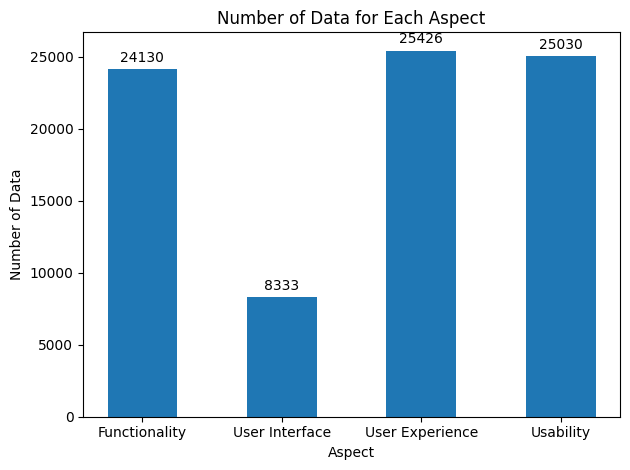

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Data dari hasil topic modeling
topic_keywords = {
    0: ["help","give","answer", "need", "make", "get", "question", "update", "ask","information","work","homework"],
    1: ["voice", "chat", "feature", "log", "login", "text","conversation", "image", "code", "account", "open", "add"],
    2: ["amazing", "use", "tool","experience", "response", "helpful", "easy", "information", "recommend", "language","review","accurate"],
    3: ["helpful", "useful", "well", "work", "help", "solve", "time"]
}

label_topik = {
    0: "Functionality",
    1: "User Interface",
    2: "User Experience",
    3: "Usability"
}

# Fungsi untuk menghitung apakah suatu teks mengandung setidaknya satu kata kunci dari sebuah topik
def contains_topkey(text, keywords):
    if not isinstance(text, str):
        return False
    count_words = Counter(text.split())
    return any(word in count_words for word in keywords)

# Menghitung jumlah data yang mengandung setidaknya satu kata kunci dari setiap topik
jumlah_data_per_topik = {label: 0 for label in label_topik.values()}
contoh_data_per_topik = {label: [] for label in label_topik.values()}

for idx in topic_keywords.keys():
    keywords = topic_keywords[idx]
    category = label_topik[idx]
    dataset_filtered[f'{category}_contains'] = dataset_filtered['lemmatized_result'].apply(lambda x: contains_topkey(x, keywords))
    jumlah_data_per_topik[category] = dataset_filtered[f'{category}_contains'].sum()
    contoh_data_per_topik[category] = dataset_filtered[dataset_filtered[f'{category}_contains']].head(5)['lemmatized_result'].tolist()

# Menampilkan hasil jumlah data yang mengandung setidaknya satu kata kunci dari setiap topik
print("Number of Data for Each Aspect")
for label, count in jumlah_data_per_topik.items():
    print(f"{label}: {count}")

# Menampilkan beberapa contoh data yang mengandung setidaknya satu kata kunci dari setiap topik
for label, contoh in contoh_data_per_topik.items():
    print(f"\nContoh data '{label}':")
    for idx, text in enumerate(contoh, start=1):
        print(f"{idx}. {text}")

# Menampilkan bar chart
labels = list(jumlah_data_per_topik.keys())
counts = [jumlah_data_per_topik[label] for label in labels]

x = np.arange(len(labels))  # label locations
width = 0.5  # bar width

fig, ax = plt.subplots()
bars = ax.bar(x, counts, width)

# Menambahkan teks pada bar chart
ax.set_xlabel('Aspect')
ax.set_ylabel('Number of Data')
ax.set_title('Number of Data for Each Aspect')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Menampilkan nilai pada setiap bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars)

fig.tight_layout()
plt.show()


The amount of sentiment data containing topkeys for each topic:
Functionality - Positive: 20686, Negative: 3444
User Interface - Positive: 6735, Negative: 1598
User Experience - Positive: 23813, Negative: 1613
Usability - Positive: 23590, Negative: 1440


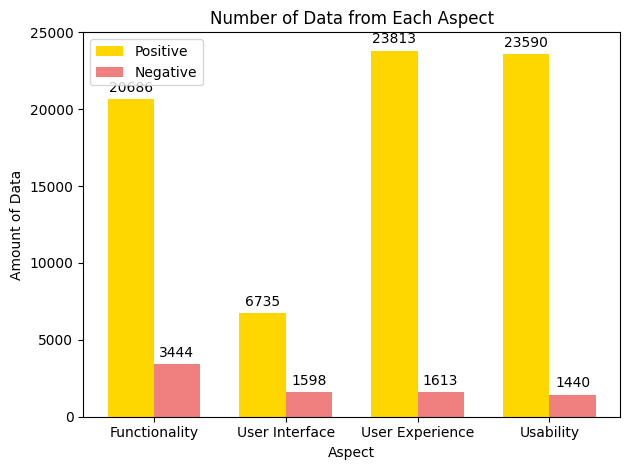

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Data dari hasil topic modeling (diganti dengan dataset sesuai kebutuhan)
topic_keywords = {
    0: ["help", "give", "answer", "need", "make", "get", "question", "update", "ask", "information", "work", "homework"],
    1: ["voice", "chat", "feature", "log", "login", "text", "conversation", "image", "code", "account", "open", "add"],
    2: ["amazing", "use", "tool", "experience", "response", "helpful", "easy", "information", "recommend", "language", "review", "accurate"],
    3: ["helpful", "useful", "well", "work", "help", "solve", "time"]
}

label_topik = {
    0: "Functionality",
    1: "User Interface",
    2: "User Experience",
    3: "Usability"
}

# Fungsi untuk menghitung apakah suatu teks mengandung setidaknya satu kata kunci dari sebuah topik
def contains_topkey(text, keywords):
    if not isinstance(text, str):
        return False
    count_words = Counter(text.split())
    return any(word in count_words for word in keywords)

# Fungsi untuk menentukan sentimen menggunakan VADER (tanpa netral)
def determine_sentiment_vader(text):
    ss = sid.polarity_scores(text)
    if ss['compound'] >= 0.05:  # threshold untuk sentimen positif
        return 'Positive'
    elif ss['compound'] <= -0.05:  # threshold untuk sentimen negatif
        return 'Negative'
    else:
        return None  # mengembalikan None untuk sentimen netral

# Menghitung jumlah data sentimen yang memunculkan topkey untuk setiap topik
jumlah_data_per_topik = {label: {'Positive': 0, 'Negative': 0} for label in label_topik.values()}
contoh_sentimen_per_topik = {label: {'Positive': [], 'Negative': []} for label in label_topik.values()}

for idx in topic_keywords.keys():
    keywords = topic_keywords[idx]
    category = label_topik[idx]
    dataset[f'{category}_contains'] = dataset['lemmatized_result'].apply(lambda x: contains_topkey(x, keywords))
    subset = dataset[dataset[f'{category}_contains']]
    for _, row in subset.iterrows():
        sentimen = determine_sentiment_vader(row['lemmatized_result'])
        if sentimen in ['Positive', 'Negative']:
            jumlah_data_per_topik[category][sentimen] += 1
            if len(contoh_sentimen_per_topik[category][sentimen]) < 5:
                contoh_sentimen_per_topik[category][sentimen].append(row['lemmatized_result'])

# Menampilkan hasil jumlah data sentimen yang memunculkan topkey untuk setiap topik
print("The amount of sentiment data containing topkeys for each topic:")
for label, sentimen in jumlah_data_per_topik.items():
    print(f"{label} - Positive: {sentimen['Positive']}, Negative: {sentimen['Negative']}")

# Menampilkan bar chart
labels = list(jumlah_data_per_topik.keys())
positif_counts = [jumlah_data_per_topik[label]['Positive'] for label in labels]
negatif_counts = [jumlah_data_per_topik[label]['Negative'] for label in labels]

x = np.arange(len(labels))  # posisi label
width = 0.35  # lebar bar

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, positif_counts, width, label='Positive', color='gold')
bars2 = ax.bar(x + width/2, negatif_counts, width, label='Negative', color='lightcoral')

# Menambahkan teks pada bar chart
ax.set_xlabel('Aspect')
ax.set_ylabel('Amount of Data')
ax.set_title('Number of Data from Each Aspect')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Menampilkan nilai pada setiap bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 poin offset vertikal
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

fig.tight_layout()
plt.show()


#Pie Chart Persentase Sentimen

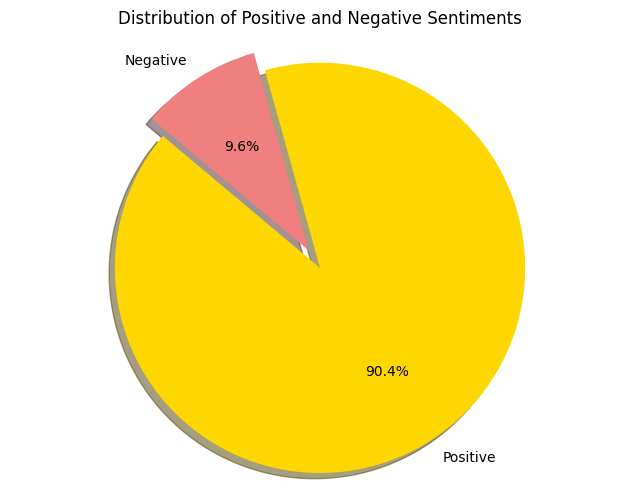

In [ ]:
# Menghitung jumlah sentimen positif, negatif, dan netral
jumlah_sentimen = dataset_filtered['sentimen_keseluruhan'].value_counts()

# Membuat pie chart
labels = jumlah_sentimen.index
sizes = jumlah_sentimen.values
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Positive and Negative Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#Jumlah Sentimen Per Aspek

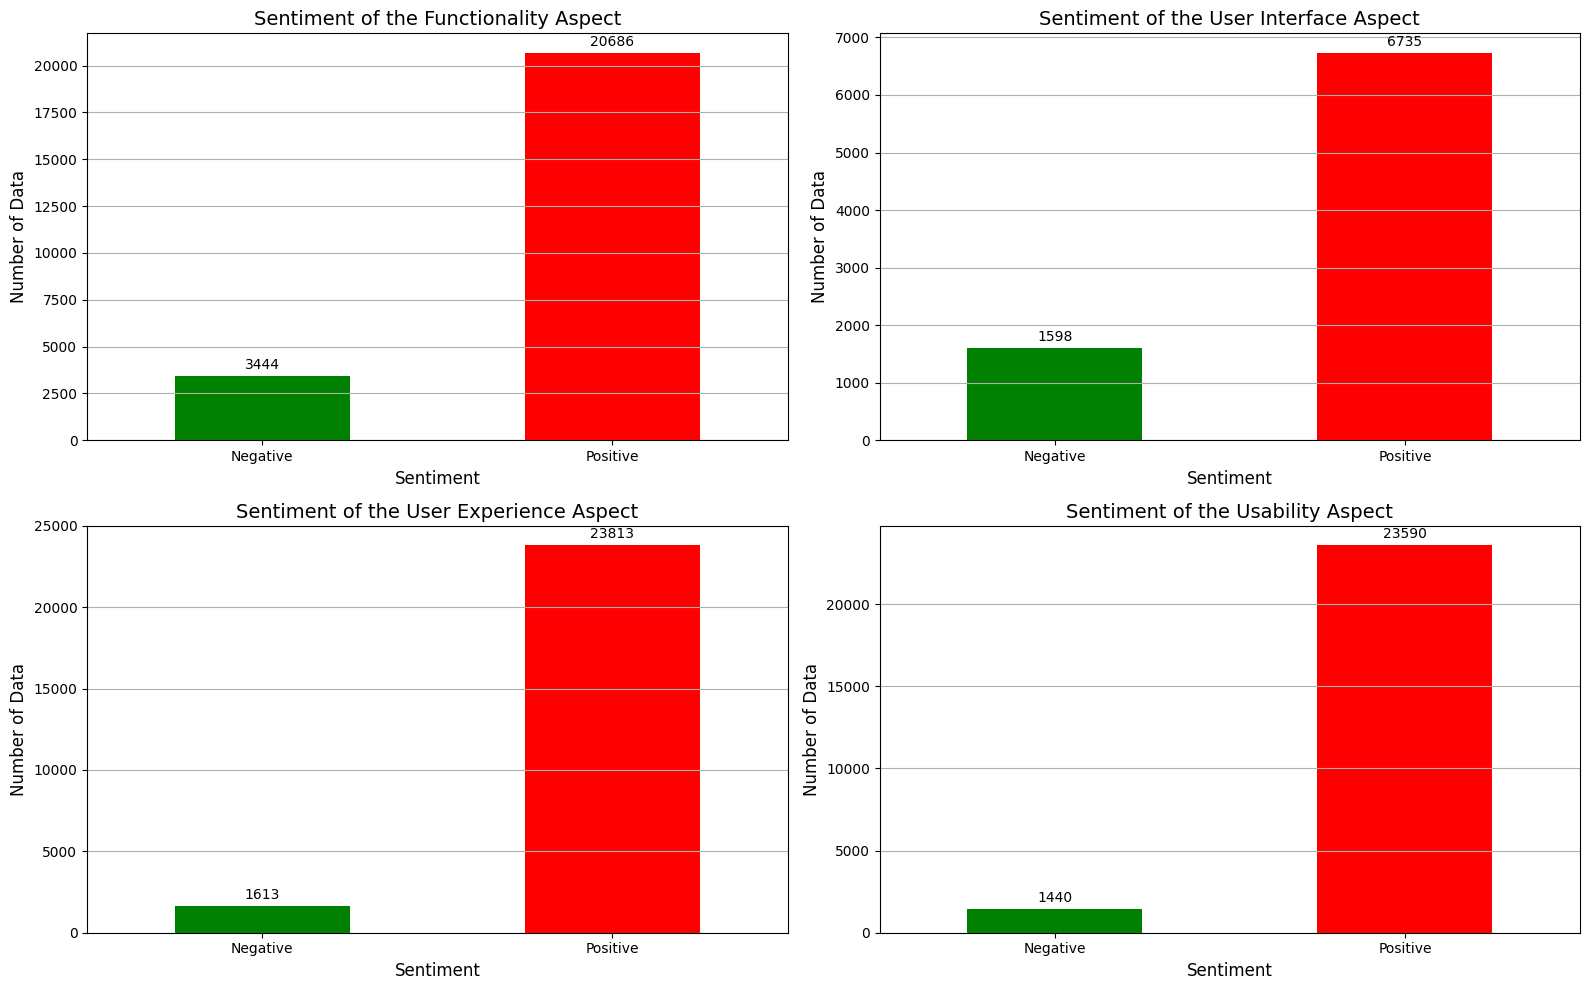

In [ ]:
# Menggabungkan jumlah sentimen untuk setiap kolom aspek
sentimen_functionality = dataset_filtered.groupby('sentimen_keseluruhan')['Functionality_contains'].sum()
sentimen_feature_accessibility = dataset_filtered.groupby('sentimen_keseluruhan')['User Interface_contains'].sum()
sentimen_user_experience = dataset_filtered.groupby('sentimen_keseluruhan')['User Experience_contains'].sum()
sentimen_education_tool = dataset_filtered.groupby('sentimen_keseluruhan')['Usability_contains'].sum()

# Mengatur ukuran gambar keseluruhan
plt.figure(figsize=(16, 10))

# Plot untuk Functionality_contains
plt.subplot(221)
bars = sentimen_functionality.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment of the Functionality Aspect', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Data', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')

# Plot untuk Feature & Accessibility_contains
plt.subplot(222)
bars = sentimen_feature_accessibility.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment of the User Interface Aspect', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Data', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')

# Plot untuk User Experience_contains
plt.subplot(223)
bars = sentimen_user_experience.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment of the User Experience Aspect', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Data', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')

# Plot untuk Education Tool_contains
plt.subplot(224)
bars = sentimen_education_tool.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment of the Usability Aspect', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Data', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')

# Mengatur layout keseluruhan
plt.tight_layout()

# Tampilkan plot
plt.show()

#Word Cloud

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk membuat wordcloud
def generate_wordcloud(text_list, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=42).generate(' '.join(text_list))

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Fungsi untuk menghitung jumlah kemunculan kata
def count_words(text_list):
    words = ' '.join(text_list).split()
    word_counts = Counter(words)
    return word_counts

# Mengumpulkan teks positif dan negatif untuk masing-masing aspek
Positive_functionality = dataset_filtered[(dataset_filtered['sentimen_keseluruhan'] == 'Positive') & (dataset_filtered['Functionality_contains'])]['lemmatized_result'].tolist()
Negative_functionality = dataset_filtered[(dataset_filtered['sentimen_keseluruhan'] == 'Negative') & (dataset_filtered['Functionality_contains'])]['lemmatized_result'].tolist()

Positive_feature = dataset_filtered[(dataset_filtered['sentimen_keseluruhan'] == 'Positive') & (dataset_filtered['User Interface_contains'])]['lemmatized_result'].tolist()
Negative_feature = dataset_filtered[(dataset_filtered['sentimen_keseluruhan'] == 'Negative') & (dataset_filtered['User Interface_contains'])]['lemmatized_result'].tolist()

Positive_experience = dataset_filtered[(dataset_filtered['sentimen_keseluruhan'] == 'Positive') & (dataset_filtered['User Experience_contains'])]['lemmatized_result'].tolist()
Negative_experience = dataset_filtered[(dataset_filtered['sentimen_keseluruhan'] == 'Negative') & (dataset_filtered['User Experience_contains'])]['lemmatized_result'].tolist()

Positive_education = dataset_filtered[(dataset_filtered['sentimen_keseluruhan'] == 'Positive') & (dataset_filtered['Usability_contains'])]['lemmatized_result'].tolist()
Negative_education = dataset_filtered[(dataset_filtered['sentimen_keseluruhan'] == 'Negative') & (dataset_filtered['Usability_contains'])]['lemmatized_result'].tolist()

# Membuat wordcloud untuk masing-masing aspek
generate_wordcloud(Positive_functionality, 'Wordcloud of Positive Sentiments - Functionality')
generate_wordcloud(Negative_functionality, 'Wordcloud of Negative Sentiments - Functionality')

generate_wordcloud(Positive_feature, 'Wordcloud of Positive Sentiments - User Interface')
generate_wordcloud(Negative_feature, 'Wordcloud of Negative Sentiments - User Interface')

generate_wordcloud(Positive_experience, 'Wordcloud of Positive Sentiments - User Experience')
generate_wordcloud(Negative_experience, 'Wordcloud of Negative Sentiments - User Experience')

generate_wordcloud(Positive_education, 'Wordcloud of Positive Sentiments - Usability')
generate_wordcloud(Negative_education, 'Wordcloud of Negative Sentiments - Usability')

# Menghitung jumlah kemunculan kata untuk sentimen Positive dan Negative pada masing-masing aspek
Positive_functionality_word_counts = count_words(Positive_functionality)
Negative_functionality_word_counts = count_words(Negative_functionality)

Positive_feature_word_counts = count_words(Positive_feature)
Negative_feature_word_counts = count_words(Negative_feature)

Positive_experience_word_counts = count_words(Positive_experience)
Negative_experience_word_counts = count_words(Negative_experience)

Positive_education_word_counts = count_words(Positive_education)
Negative_education_word_counts = count_words(Negative_education)

# Menampilkan 10 kata dengan jumlah kemunculan tertinggi untuk sentimen Positive dan Negative dari masing-masing aspek
print("10 Kata dengan Jumlah Kemunculan Tertinggi untuk Sentimen Positive dan Negative")

print("\nFunctionality:")
print("Positive:", Positive_functionality_word_counts.most_common(10))
print("Negative:", Negative_functionality_word_counts.most_common(10))

print("\nUser Interface:")
print("Positive:", Positive_feature_word_counts.most_common(10))
print("Negative:", Negative_feature_word_counts.most_common(10))

print("\nUser Experience:")
print("Positive:", Positive_experience_word_counts.most_common(10))
print("Negative:", Negative_experience_word_counts.most_common(10))

print("\nUsability:")
print("Positive:", Positive_education_word_counts.most_common(10))
print("Negative:", Negative_education_word_counts.most_common(10))


NameError: name 'dataset_filtered' is not defined

#Grafik Sentimen Per Bulan

<ipython-input-31-2ee396729bcd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtered['date'] = pd.to_datetime(dataset_filtered['at'], format='%m/%d/%Y %H:%M')


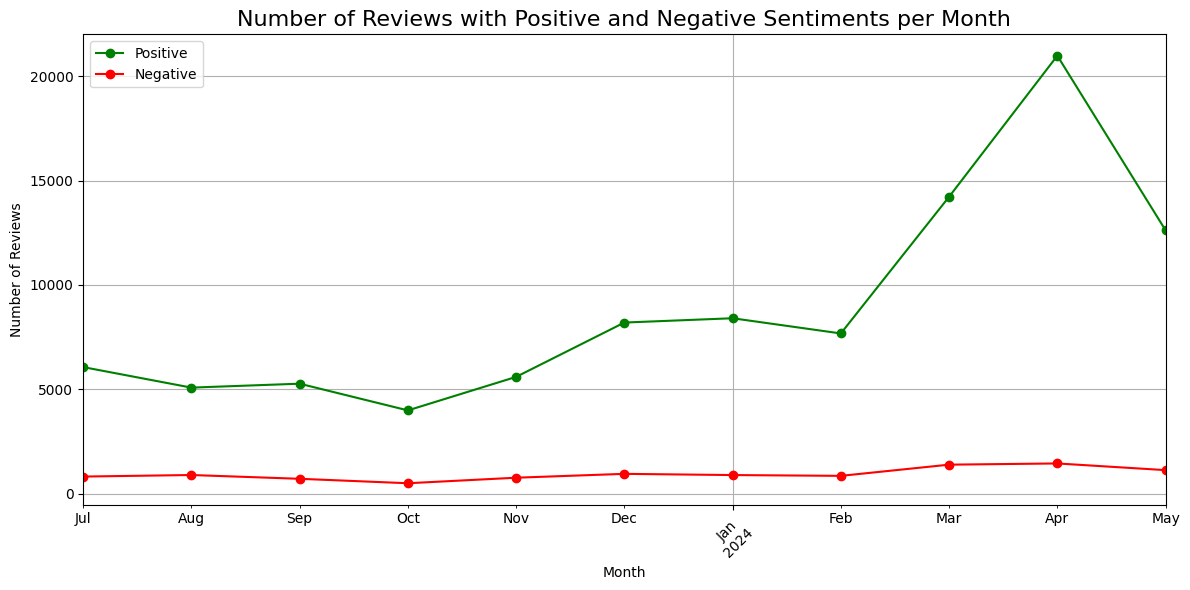

<ipython-input-31-2ee396729bcd>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtered['month_year'] = dataset_filtered['date'].dt.to_period('M')


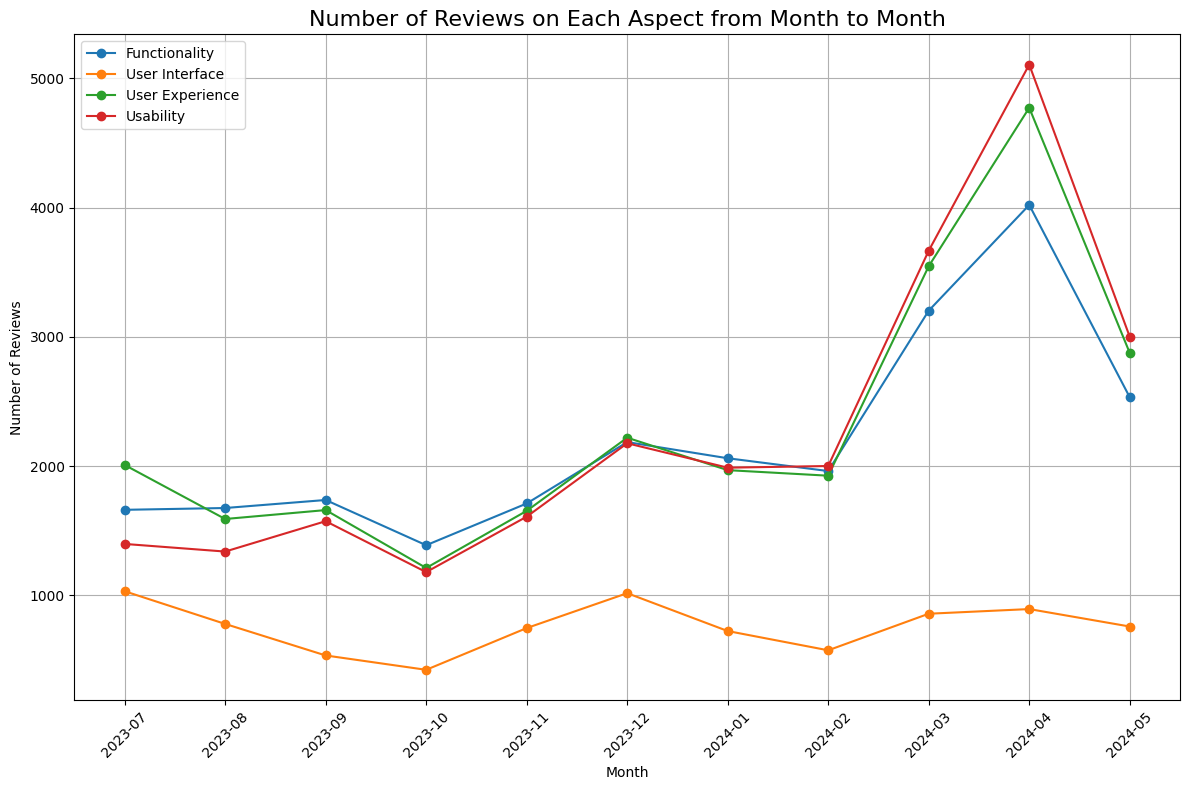

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Ubah format waktu ke dalam format datetime
dataset_filtered['date'] = pd.to_datetime(dataset_filtered['at'], format='%m/%d/%Y %H:%M')

# Filter dataset untuk sentimen Positive dan negatif
Positive_per_month = dataset_filtered[dataset_filtered['sentimen_keseluruhan'] == 'Positive'].groupby(dataset_filtered['date'].dt.to_period('M')).size()
Negative_per_month = dataset_filtered[dataset_filtered['sentimen_keseluruhan'] == 'Negative'].groupby(dataset_filtered['date'].dt.to_period('M')).size()

# Plot grafik jumlah sentimen Positive dan Negative per bulan
plt.figure(figsize=(12, 6))
Positive_per_month.plot(kind='line', marker='o', color='g', label='Positive')
Negative_per_month.plot(kind='line', marker='o', color='r', label='Negative')
plt.title('Number of Reviews with Positive and Negative Sentiments per Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('V17_Jumlah_Ulasan_Sentimen_Positive_Negative_per_Bulan.png')
plt.show()

# Grafik V.18: Jumlah Ulasan pada Setiap Aspek dari Bulan ke Bulan
# Buat kolom bulan dan tahun
dataset_filtered['month_year'] = dataset_filtered['date'].dt.to_period('M')

# Hitung jumlah ulasan pada setiap aspek untuk setiap bulan
review_counts_per_aspect_per_month = dataset_filtered.groupby(['month_year']).agg({
    'Functionality_contains': 'sum',
    'User Interface_contains': 'sum',
    'User Experience_contains': 'sum',
    'Usability_contains': 'sum'
})

# Plot grafik jumlah ulasan pada setiap aspek dari bulan ke bulan
plt.figure(figsize=(12, 8))

plt.plot(review_counts_per_aspect_per_month.index.astype(str), review_counts_per_aspect_per_month['Functionality_contains'], marker='o', label='Functionality')
plt.plot(review_counts_per_aspect_per_month.index.astype(str), review_counts_per_aspect_per_month['User Interface_contains'], marker='o', label='User Interface')
plt.plot(review_counts_per_aspect_per_month.index.astype(str), review_counts_per_aspect_per_month['User Experience_contains'], marker='o', label='User Experience')
plt.plot(review_counts_per_aspect_per_month.index.astype(str), review_counts_per_aspect_per_month['Usability_contains'], marker='o', label='Usability')

plt.title('Number of Reviews on Each Aspect from Month to Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('V18_Jumlah_Ulasan_Aspek_Bulan_ke_Bulan.png')
plt.show()

<ipython-input-32-44f028ae8fc4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtered['date'] = pd.to_datetime(dataset_filtered['at'], format='%m/%d/%Y %H:%M')


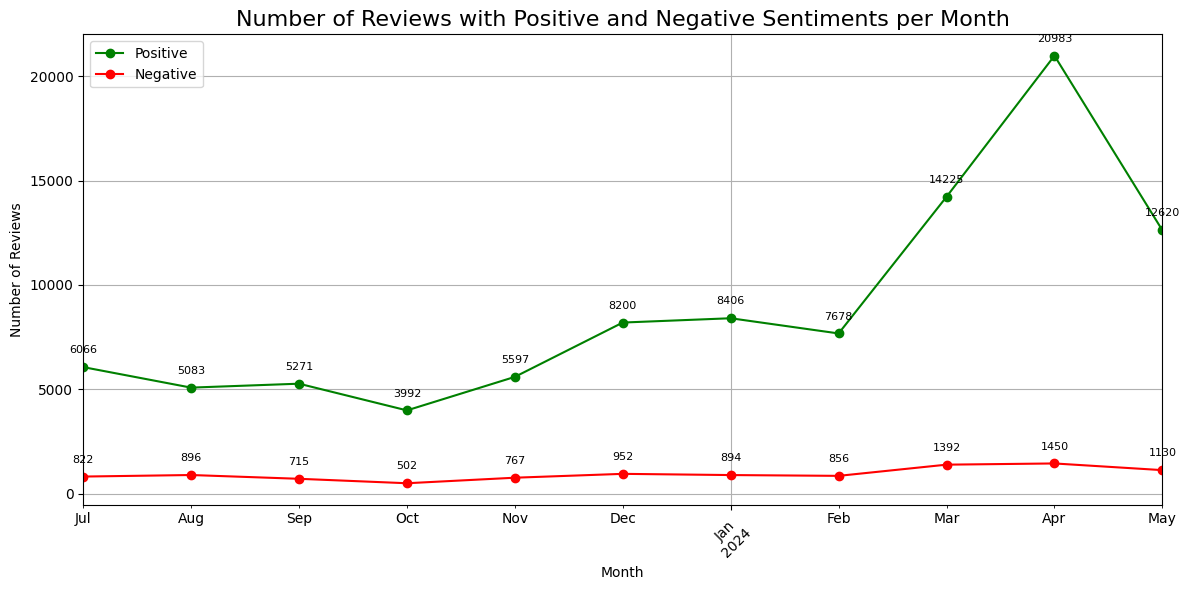

<ipython-input-32-44f028ae8fc4>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtered['month_year'] = dataset_filtered['date'].dt.to_period('M')


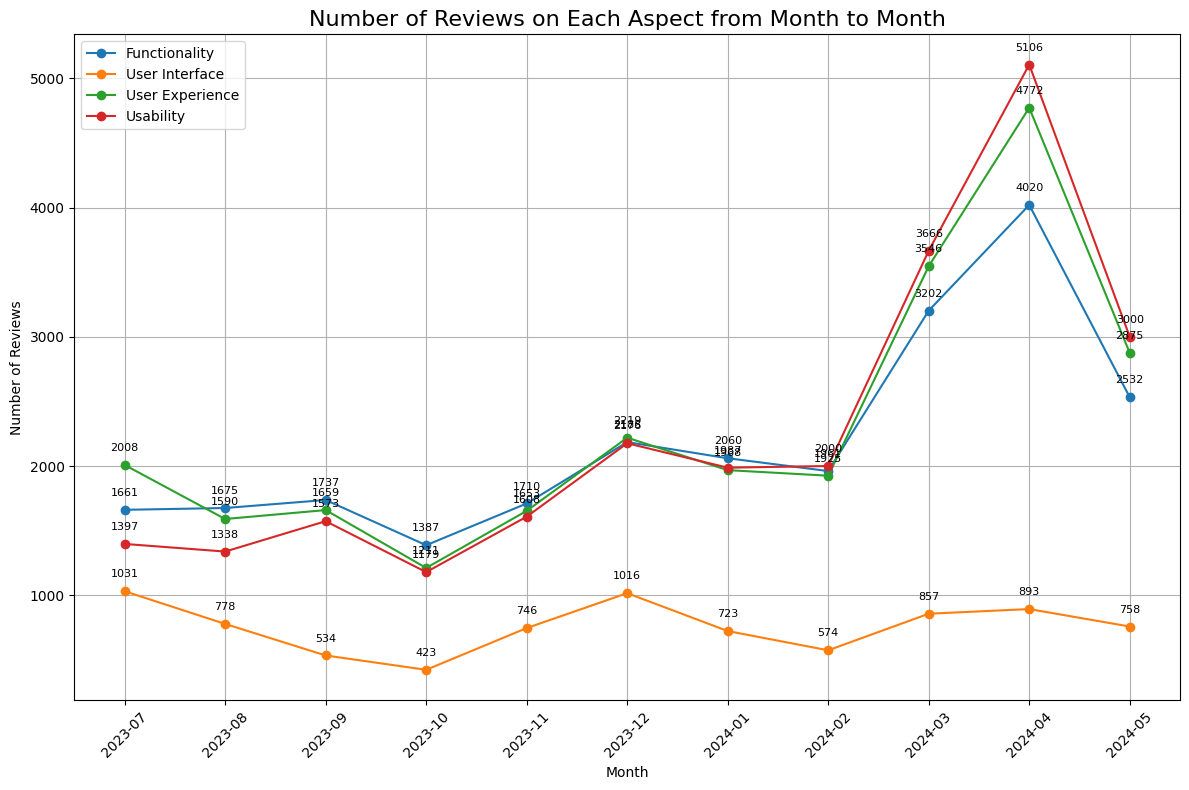

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ubah format waktu ke dalam format datetime
dataset_filtered['date'] = pd.to_datetime(dataset_filtered['at'], format='%m/%d/%Y %H:%M')

# Filter dataset untuk sentimen Positive dan Negative
Positive_per_month = dataset_filtered[dataset_filtered['sentimen_keseluruhan'] == 'Positive'].groupby(dataset_filtered['date'].dt.to_period('M')).size()
Negative_per_month = dataset_filtered[dataset_filtered['sentimen_keseluruhan'] == 'Negative'].groupby(dataset_filtered['date'].dt.to_period('M')).size()

# Plot grafik jumlah sentimen Positive dan Negative per bulan
plt.figure(figsize=(12, 6))
Positive_per_month.plot(kind='line', marker='o', color='g', label='Positive')
Negative_per_month.plot(kind='line', marker='o', color='r', label='Negative')
plt.title('Number of Reviews with Positive and Negative Sentiments per Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Anotasi teks untuk menampilkan jumlah data setiap bulannya pada grafik V17
for i, txt in enumerate(Positive_per_month):
    plt.annotate(txt, (Positive_per_month.index[i].strftime('%Y-%m'), Positive_per_month.values[i]), textcoords='offset points', xytext=(0,10), ha='center', fontsize=8)

for i, txt in enumerate(Negative_per_month):
    plt.annotate(txt, (Negative_per_month.index[i].strftime('%Y-%m'), Negative_per_month.values[i]), textcoords='offset points', xytext=(0,10), ha='center', fontsize=8)

plt.tight_layout()
plt.savefig('V17_Jumlah_Ulasan_Sentimen_Positive_Negative_per_Bulan.png')
plt.show()

# Grafik V.18: Jumlah Ulasan pada Setiap Aspek dari Bulan ke Bulan
# Buat kolom bulan dan tahun
dataset_filtered['month_year'] = dataset_filtered['date'].dt.to_period('M')

# Hitung jumlah ulasan pada setiap aspek untuk setiap bulan
review_counts_per_aspect_per_month = dataset_filtered.groupby(['month_year']).agg({
    'Functionality_contains': 'sum',
    'User Interface_contains': 'sum',
    'User Experience_contains': 'sum',
    'Usability_contains': 'sum'
})

# Plot grafik jumlah ulasan pada setiap aspek dari bulan ke bulan
plt.figure(figsize=(12, 8))

plt.plot(review_counts_per_aspect_per_month.index.astype(str), review_counts_per_aspect_per_month['Functionality_contains'], marker='o', label='Functionality')
plt.plot(review_counts_per_aspect_per_month.index.astype(str), review_counts_per_aspect_per_month['User Interface_contains'], marker='o', label='User Interface')
plt.plot(review_counts_per_aspect_per_month.index.astype(str), review_counts_per_aspect_per_month['User Experience_contains'], marker='o', label='User Experience')
plt.plot(review_counts_per_aspect_per_month.index.astype(str), review_counts_per_aspect_per_month['Usability_contains'], marker='o', label='Usability')

plt.title('Number of Reviews on Each Aspect from Month to Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Anotasi teks untuk menampilkan jumlah data setiap bulannya pada grafik V18
for i, col in enumerate(review_counts_per_aspect_per_month.columns):
    for j, value in enumerate(review_counts_per_aspect_per_month[col]):
        plt.annotate(value, (review_counts_per_aspect_per_month.index[j].strftime('%Y-%m'), value), textcoords='offset points', xytext=(0,10), ha='center', fontsize=8)

plt.tight_layout()
plt.savefig('V18_Jumlah_Ulasan_Aspek_Bulan_ke_Bulan.png')
plt.show()


#Bag of Word

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Contoh data teks dari dataset Anda (gunakan kolom yang sesuai dengan data Anda)
text_data = dataset_filtered['lemmatized_result'].tolist()

# Inisialisasi CountVectorizer dengan konfigurasi default atau sesuai kebutuhan
vectorizer = CountVectorizer()

# Fit dan transform teks menggunakan CountVectorizer
bow_representation = vectorizer.fit_transform(text_data)

# Konversi hasil BoW ke dalam DataFrame untuk tampilan tabel
df_bow = pd.DataFrame(bow_representation.toarray(), columns=vectorizer.get_feature_names_out())

# Tambahkan indeks D1, D2, D3, ... sebagai nama baris
df_bow.index = dataset_filtered.index


In [ ]:
# Contoh data teks dari dataset Anda (gunakan kolom yang sesuai dengan data Anda)
text_data = dataset_filtered['lemmatized_result']

# Inisialisasi CountVectorizer dengan konfigurasi default atau sesuai kebutuhan
vectorizer = CountVectorizer()

# Fit dan transform teks menggunakan CountVectorizer
bow_representation = vectorizer.fit_transform(text_data)

# Konversi hasil BoW ke dalam DataFrame untuk tampilan tabel
df_bow = pd.DataFrame(bow_representation.toarray(), columns=vectorizer.get_feature_names_out())

# Tambahkan indeks D1, D2, D3, ... sebagai nama baris
df_bow.index = dataset_filtered.index

# Pilih hanya kolom-kolom yang diinginkan
selected_columns = ['upload', 'pay', 'camera', 'fix', 'mode','free', 'version', 'application', 'useful', 'function']
df_selected = df_bow.loc[:, selected_columns]

# Tampilkan hasil dalam format tabel (lima baris pertama)
print("Hasil Bag of Words (BoW) untuk kolom-kolom tertentu:")
display(df_selected)


Hasil Bag of Words (BoW) untuk kolom-kolom tertentu:


upload  pay  camera  fix  mode  free  version  application  useful  \
0            1    0       1    0     0     1        1            0       0   
1            0    1       0    0     0     1        0            0       0   
2            0    1       0    0     0     0        1            1       0   
5            0    0       0    0     1     0        0            0       0   
6            0    0       0    0     0     0        0            1       0   
...        ...  ...     ...  ...   ...   ...      ...          ...     ...   
135728       0    0       0    0     0     0        0            0       0   
135729       0    0       0    0     0     0        0            0       0   
135730       0    0       0    0     0     0        0            0       0   
135731       0    0       0    0     0     0        0            0       0   
135732       0    0       0    0     0     0        0            0       0   

        function  
0              1  
1              0  
2              1  
5              0  
6              0  
...          ...  
135728         0  
135729         0  
135730         0  
135731         0  
135732         0  

[108497 rows x 10 columns]

In [ ]:
# Simpan indeks ke dalam file CSV
dataset_filtered.to_csv('indeks.csv', index=False)

#Jumlah Data

In [ ]:
print("Seluruh data", len(dataset_filtered))
print("Jumlah Seluruh:", jumlah_positif + jumlah_negatif)
print("Jumlah Positif:", jumlah_positif)
print("Jumlah Negatif:", jumlah_negatif)
print("")

# Menampilkan jumlah data dari keempat aspek
print("Jumlah data berdasarkan aspek : ")
for label, count in jumlah_data_per_topik.items():
    print(f"{label}: Positive - {count['Positive']}, Negative - {count['Negative']}")

# Menghitung total jumlah data untuk keempat topik
total_data = sum(count['Positive'] + count['Negative'] for count in jumlah_data_per_topik.values())

# Menampilkan total jumlah data untuk keempat topik
print(f"\nTotal jumlah data untuk keempat topik: {total_data}")


Seluruh data 108497
Jumlah Seluruh: 108497
Jumlah Positif: 98121
Jumlah Negatif: 10376

Jumlah data berdasarkan aspek : 
Functionality: Positive - 20686, Negative - 3444
User Interface: Positive - 6735, Negative - 1598
User Experience: Positive - 23813, Negative - 1613
Usability: Positive - 23590, Negative - 1440

Total jumlah data untuk keempat topik: 82919


In [ ]:
# Jumlah data yang berisi True untuk setiap aspek
jumlah_true_functionality = dataset_filtered['Functionality_contains'].sum()
jumlah_true_feature_accessibility = dataset_filtered['User Interface_contains'].sum()
jumlah_true_user_experience = dataset_filtered['User Experience_contains'].sum()
jumlah_true_education_tool = dataset_filtered['Usability_contains'].sum()

# Rasio split yang diinginkan
rasios = [0.75, 0.8, 0.9]
results = {}

for rasio in rasios:

    # Split data untuk setiap aspek
    train_functionality = dataset_filtered.sample(frac=rasio, random_state=1)
    test_functionality = dataset_filtered.drop(train_functionality.index)

    train_feature_accessibility = dataset_filtered.sample(frac=rasio, random_state=2)
    test_feature_accessibility = dataset_filtered.drop(train_feature_accessibility.index)

    train_user_experience = dataset_filtered.sample(frac=rasio, random_state=3)
    test_user_experience = dataset_filtered.drop(train_user_experience.index)

    train_education_tool = dataset_filtered.sample(frac=rasio, random_state=4)
    test_education_tool = dataset_filtered.drop(train_education_tool.index)

    # Jumlah data untuk Functionality_contains
    jumlah_train_functionality = int(jumlah_true_functionality * rasio)
    jumlah_test_functionality = jumlah_true_functionality - jumlah_train_functionality
    train_functionality = pd.Series([True]*jumlah_train_functionality + [False]*(len(dataset_filtered)-jumlah_train_functionality))
    test_functionality = pd.Series([True]*jumlah_test_functionality + [False]*(len(dataset_filtered)-jumlah_test_functionality))

    # Jumlah data untuk User Interface_contains
    jumlah_train_feature_accessibility = int(jumlah_true_feature_accessibility * rasio)
    jumlah_test_feature_accessibility = jumlah_true_feature_accessibility - jumlah_train_feature_accessibility
    train_feature_accessibility = pd.Series([True]*jumlah_train_feature_accessibility + [False]*(len(dataset_filtered)-jumlah_train_feature_accessibility))
    test_feature_accessibility = pd.Series([True]*jumlah_test_feature_accessibility + [False]*(len(dataset_filtered)-jumlah_test_feature_accessibility))

    # Jumlah data untuk User Experience_contains
    jumlah_train_user_experience = int(jumlah_true_user_experience * rasio)
    jumlah_test_user_experience = jumlah_true_user_experience - jumlah_train_user_experience
    train_user_experience = pd.Series([True]*jumlah_train_user_experience + [False]*(len(dataset_filtered)-jumlah_train_user_experience))
    test_user_experience = pd.Series([True]*jumlah_test_user_experience + [False]*(len(dataset_filtered)-jumlah_test_user_experience))

    # Jumlah data untuk Usability_contains
    jumlah_train_education_tool = int(jumlah_true_education_tool * rasio)
    jumlah_test_education_tool = jumlah_true_education_tool - jumlah_train_education_tool
    train_education_tool = pd.Series([True]*jumlah_train_education_tool + [False]*(len(dataset_filtered)-jumlah_train_education_tool))
    test_education_tool = pd.Series([True]*jumlah_test_education_tool + [False]*(len(dataset_filtered)-jumlah_test_education_tool))

    # Tampilkan hasil
    print(f"Rasio {int(rasio*100)}:{int((1-rasio)*100)}")
    print("Jumlah data yang berisi True setelah split (berdasarkan aspek):")
    print("-------------------------------------------------------------")
    print("Functionality_contains:")
    print(f"Jumlah data latih yang berisi True: {jumlah_train_functionality}")
    print(f"Jumlah data uji yang berisi True: {jumlah_test_functionality}")
    print()
    print("User Interface_contains:")
    print(f"Jumlah data latih yang berisi True: {jumlah_train_feature_accessibility}")
    print(f"Jumlah data uji yang berisi True: {jumlah_test_feature_accessibility}")
    print()
    print("User Experience_contains:")
    print(f"Jumlah data latih yang berisi True: {jumlah_train_user_experience}")
    print(f"Jumlah data uji yang berisi True: {jumlah_test_user_experience}")
    print()
    print("Usability_contains:")
    print(f"Jumlah data latih yang berisi True: {jumlah_train_education_tool}")
    print(f"Jumlah data uji yang berisi True: {jumlah_test_education_tool}")
    print()

Rasio 75:25
Jumlah data yang berisi True setelah split (berdasarkan aspek):
-------------------------------------------------------------
Functionality_contains:
Jumlah data latih yang berisi True: 18097
Jumlah data uji yang berisi True: 6033

User Interface_contains:
Jumlah data latih yang berisi True: 6249
Jumlah data uji yang berisi True: 2084

User Experience_contains:
Jumlah data latih yang berisi True: 19069
Jumlah data uji yang berisi True: 6357

Usability_contains:
Jumlah data latih yang berisi True: 18772
Jumlah data uji yang berisi True: 6258

Rasio 80:19
Jumlah data yang berisi True setelah split (berdasarkan aspek):
-------------------------------------------------------------
Functionality_contains:
Jumlah data latih yang berisi True: 19304
Jumlah data uji yang berisi True: 4826

User Interface_contains:
Jumlah data latih yang berisi True: 6666
Jumlah data uji yang berisi True: 1667

User Experience_contains:
Jumlah data latih yang berisi True: 20340
Jumlah data uji yang b

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score
# from tabulate import tabulate

# # Kode 2: Perhitungan jumlah True untuk setiap aspek dan split data berdasarkan rasio
# jumlah_true_functionality = dataset_filtered['Functionality_contains'].sum()
# jumlah_true_feature_accessibility = dataset_filtered['Feature & Accessibility_contains'].sum()
# jumlah_true_user_experience = dataset_filtered['User Experience_contains'].sum()
# jumlah_true_education_tool = dataset_filtered['Education Tool_contains'].sum()

# rasios = [0.7, 0.75, 0.8]
# results = []

# for rasio in rasios:
#     # Split data untuk setiap aspek
#     train_functionality = dataset_filtered.sample(frac=rasio, random_state=1)
#     test_functionality = dataset_filtered.drop(train_functionality.index)

#     train_feature_accessibility = dataset_filtered.sample(frac=rasio, random_state=2)
#     test_feature_accessibility = dataset_filtered.drop(train_feature_accessibility.index)

#     train_user_experience = dataset_filtered.sample(frac=rasio, random_state=3)
#     test_user_experience = dataset_filtered.drop(train_user_experience.index)

#     train_education_tool = dataset_filtered.sample(frac=rasio, random_state=4)
#     test_education_tool = dataset_filtered.drop(train_education_tool.index)

#     # Kode 3: Multinomial Naive Bayes untuk setiap aspek dan penghitungan hasil
#     def run_naive_bayes(X_train, y_train, X_test, y_test, vectorizer):
#         nb_model = MultinomialNB()
#         nb_model.fit(vectorizer.transform(X_train), y_train)
#         y_pred = nb_model.predict(vectorizer.transform(X_test))
#         accuracy = accuracy_score(y_test, y_pred) * 100
#         true_positive = sum(y_pred)
#         data_predicted = len(y_pred)
#         data_actual = len(y_test)
#         return accuracy, true_positive, data_predicted, data_actual

#     # Functionality_contains
#     X_train = train_functionality['lemmatized_result'].tolist()
#     y_train = train_functionality['Functionality_contains']
#     X_test = test_functionality['lemmatized_result'].tolist()
#     y_test = test_functionality['Functionality_contains']

#     train_accuracy, train_true_positive, train_data_predicted, train_data_actual = run_naive_bayes(X_train, y_train, X_train, y_train, vectorizer)
#     test_accuracy, test_true_positive, test_data_predicted, test_data_actual = run_naive_bayes(X_train, y_train, X_test, y_test, vectorizer)

#     results.append([
#         f"{int(rasio*100)}:{int((1-rasio)*100)}",
#         "Functionality",
#         train_true_positive,
#         train_data_predicted - train_true_positive,
#         test_data_predicted,
#         test_true_positive,
#         test_accuracy,
#         (test_true_positive / test_data_actual) * 100
#     ])

#     # Feature & Accessibility_contains
#     X_train = train_feature_accessibility['lemmatized_result'].tolist()
#     y_train = train_feature_accessibility['Feature & Accessibility_contains']
#     X_test = test_feature_accessibility['lemmatized_result'].tolist()
#     y_test = test_feature_accessibility['Feature & Accessibility_contains']

#     train_accuracy, train_true_positive, train_data_predicted, train_data_actual = run_naive_bayes(X_train, y_train, X_train, y_train, vectorizer)
#     test_accuracy, test_true_positive, test_data_predicted, test_data_actual = run_naive_bayes(X_train, y_train, X_test, y_test, vectorizer)

#     results.append([
#         f"{int(rasio*100)}:{int((1-rasio)*100)}",
#         "Feature & Accessibility",
#         train_true_positive,
#         train_data_predicted - train_true_positive,
#         test_data_predicted,
#         test_true_positive,
#         test_accuracy,
#         (test_true_positive / test_data_actual) * 100
#     ])

#     # User Experience_contains
#     X_train = train_user_experience['lemmatized_result'].tolist()
#     y_train = train_user_experience['User Experience_contains']
#     X_test = test_user_experience['lemmatized_result'].tolist()
#     y_test = test_user_experience['User Experience_contains']

#     train_accuracy, train_true_positive, train_data_predicted, train_data_actual = run_naive_bayes(X_train, y_train, X_train, y_train, vectorizer)
#     test_accuracy, test_true_positive, test_data_predicted, test_data_actual = run_naive_bayes(X_train, y_train, X_test, y_test, vectorizer)

#     results.append([
#         f"{int(rasio*100)}:{int((1-rasio)*100)}",
#         "User Experience",
#         train_true_positive,
#         train_data_predicted - train_true_positive,
#         test_data_predicted,
#         test_true_positive,
#         test_accuracy,
#         (test_true_positive / test_data_actual) * 100
#     ])

#     # Education Tool_contains
#     X_train = train_education_tool['lemmatized_result'].tolist()
#     y_train = train_education_tool['Education Tool_contains']
#     X_test = test_education_tool['lemmatized_result'].tolist()
#     y_test = test_education_tool['Education Tool_contains']

#     train_accuracy, train_true_positive, train_data_predicted, train_data_actual = run_naive_bayes(X_train, y_train, X_train, y_train, vectorizer)
#     test_accuracy, test_true_positive, test_data_predicted, test_data_actual = run_naive_bayes(X_train, y_train, X_test, y_test, vectorizer)

#     results.append([
#         f"{int(rasio*100)}:{int((1-rasio)*100)}",
#         "Education Tool",
#         train_true_positive,
#         train_data_predicted - train_true_positive,
#         test_data_predicted,
#         test_true_positive,
#         test_accuracy,
#         (test_true_positive / test_data_actual) * 100
#     ])

# # Menampilkan hasil sesuai format yang diminta
# print(tabulate(results, headers=["Rasio", "Split Data", "True Positif", "True Negatif", "Jumlah Data Prediksi", "Jumlah Aktual Data", "Akurasi", "Akurasi (%)"], tablefmt='grid'))


+---------+-------------------------+----------------+----------------+------------------------+----------------------+-----------+---------------+
| Rasio   | Split Data              |   True Positif |   True Negatif |   Jumlah Data Prediksi |   Jumlah Aktual Data |   Akurasi |   Akurasi (%) |
+=========+=========================+================+================+========================+======================+===========+===============+
| 70:30   | Functionality           |          12067 |          63881 |                  32549 |                 5360 |   98.4362 |      16.4675  |
+---------+-------------------------+----------------+----------------+------------------------+----------------------+-----------+---------------+
| 70:30   | Feature & Accessibility |           5337 |          70611 |                  32549 |                 2437 |   98.0767 |       7.48717 |
+---------+-------------------------+----------------+----------------+------------------------+----------------

Jumlah data dalam setiap sentimen:
+----+------------+---------------+
|    | Sentimen   |   Jumlah Data |
+====+============+===============+
|  0 | positif    |         98121 |
+----+------------+---------------+
|  1 | negatif    |         10376 |
+----+------------+---------------+

+---------+----------------+---------------+--------------+----------------+----------------+------------------------+-----------+---------------+
| Rasio   |   Jumlah Train |   Jumlah Test | Split Data   |   True Positif |   True Negatif |   Jumlah Data Prediksi |   Akurasi |   Akurasi (%) |
+=========+================+===============+==============+================+================+========================+===========+===============+
| 70:30   |          75948 |         32549 | Train        |          72611 |           3337 |                  75948 |   95.6062 |       95.6062 |
+---------+----------------+---------------+--------------+----------------+----------------+------------------------+------

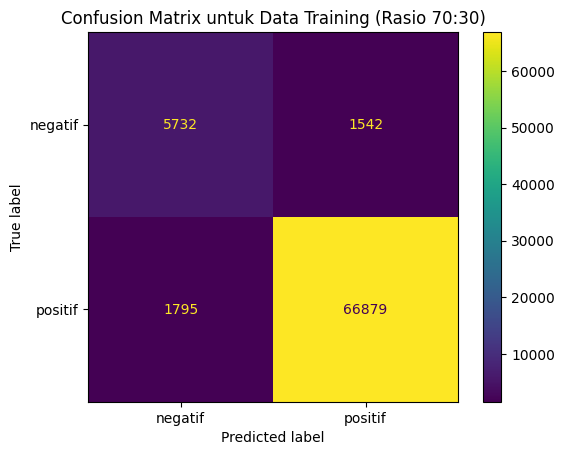

Confusion Matrix untuk Data Testing (Rasio 70:30):


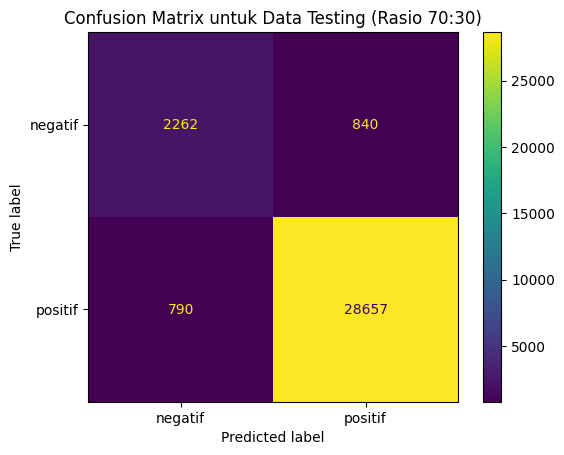

In [ ]:
# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# from tabulate import tabulate
# import matplotlib.pyplot as plt

# # Anggap dataset_filtered adalah DataFrame dengan kolom 'lemmatized_result' dan 'sentimen_keseluruhan'
# # Misalnya:
# # dataset_filtered = pd.read_csv('dataset.csv')

# # Menghitung jumlah data dalam setiap sentimen
# jumlah_data_sentimen = dataset_filtered['sentimen_keseluruhan'].value_counts()

# # Tabel jumlah data dalam setiap sentimen
# print("Jumlah data dalam setiap sentimen:")
# jumlah_data_sentimen_df = pd.DataFrame(jumlah_data_sentimen).reset_index()
# jumlah_data_sentimen_df.columns = ['Sentimen', 'Jumlah Data']
# print(tabulate(jumlah_data_sentimen_df, headers='keys', tablefmt='grid'))
# print()

# # Menghitung jumlah data True untuk setiap aspek dan split data berdasarkan rasio
# rasios = [0.7, 0.75, 0.8]
# results = []

# # Membuat vectorizer di luar loop agar tidak membuat ulang setiap kali
# vectorizer = CountVectorizer()

# # Variabel untuk menyimpan data terbaik untuk confusion matrix
# best_rasio = 0.7
# best_train_data = None
# best_test_data = None
# best_y_train = None
# best_y_test = None
# best_y_train_pred = None
# best_y_test_pred = None

# for rasio in rasios:
#     # Split data secara keseluruhan
#     train_data = dataset_filtered.sample(frac=rasio, random_state=1)
#     test_data = dataset_filtered.drop(train_data.index)

#     # Menghitung fitur dengan CountVectorizer
#     X_train = train_data['lemmatized_result'].tolist()
#     y_train = train_data['sentimen_keseluruhan']
#     X_test = test_data['lemmatized_result'].tolist()
#     y_test = test_data['sentimen_keseluruhan']

#     # Membuat dan melatih model Naive Bayes
#     nb_model = MultinomialNB()
#     nb_model.fit(vectorizer.fit_transform(X_train), y_train)

#     # Melakukan prediksi pada data uji
#     y_train_pred = nb_model.predict(vectorizer.transform(X_train))
#     y_test_pred = nb_model.predict(vectorizer.transform(X_test))

#     # Menghitung akurasi
#     train_accuracy = accuracy_score(y_train, y_train_pred) * 100
#     test_accuracy = accuracy_score(y_test, y_test_pred) * 100

#     # Menambahkan hasil ke dalam tabel results
#     results.append([
#         f"{int(rasio*100)}:{int((1-rasio)*100)}",
#         len(train_data),
#         len(test_data),
#         "Train",
#         sum(y_train_pred == y_train),  # True Positif Train
#         len(y_train_pred) - sum(y_train_pred == y_train),  # True Negatif Train
#         len(y_train_pred),
#         train_accuracy,
#         (sum(y_train_pred == y_train) / len(y_train_pred)) * 100
#     ])

#     results.append([
#         f"{int(rasio*100)}:{int((1-rasio)*100)}",
#         len(train_data),
#         len(test_data),
#         "Test",
#         sum(y_test_pred == y_test),  # True Positif Test
#         len(y_test_pred) - sum(y_test_pred == y_test),  # True Negatif Test
#         len(y_test_pred),
#         test_accuracy,
#         (sum(y_test_pred == y_test) / len(y_test_pred)) * 100
#     ])

#     if rasio == best_rasio:
#         best_train_data = train_data
#         best_test_data = test_data
#         best_y_train = y_train
#         best_y_test = y_test
#         best_y_train_pred = y_train_pred
#         best_y_test_pred = y_test_pred

# # Menampilkan hasil sesuai format yang diminta
# print(tabulate(results, headers=["Rasio", "Jumlah Train", "Jumlah Test", "Split Data", "True Positif", "True Negatif", "Jumlah Data Prediksi", "Akurasi", "Akurasi (%)"], tablefmt='grid'))

# # Menampilkan confusion matrix untuk data training dan testing dengan rasio 70:30
# conf_matrix_train = confusion_matrix(best_y_train, best_y_train_pred)
# conf_matrix_test = confusion_matrix(best_y_test, best_y_test_pred)

# # Menampilkan confusion matrix untuk data training
# print("Confusion Matrix untuk Data Training (Rasio 70:30):")
# disp_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=nb_model.classes_)
# disp_train.plot()
# plt.title("Confusion Matrix untuk Data Training (Rasio 70:30)")
# plt.show()

# # Menampilkan confusion matrix untuk data testing
# print("Confusion Matrix untuk Data Testing (Rasio 70:30):")
# disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=nb_model.classes_)
# disp_test.plot()
# plt.title("Confusion Matrix untuk Data Testing (Rasio 70:30)")
# plt.show()


#Algoritma Naive Bayes

Number of data points for each sentiment:
+----+-------------+------------------+
|    | Sentiment   |   Number of Data |
+====+=============+==================+
|  0 | Positive    |            98121 |
+----+-------------+------------------+
|  1 | Negative    |            10376 |
+----+-------------+------------------+



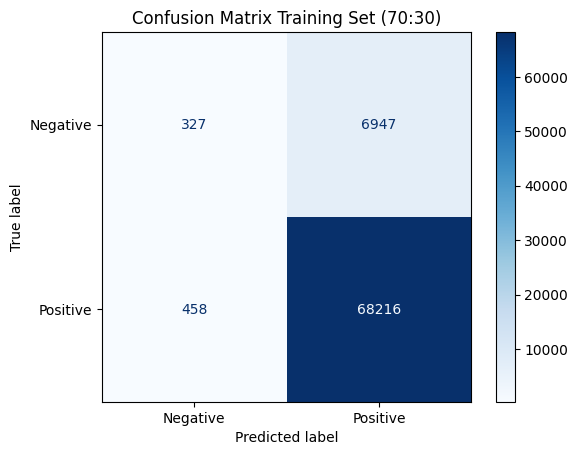

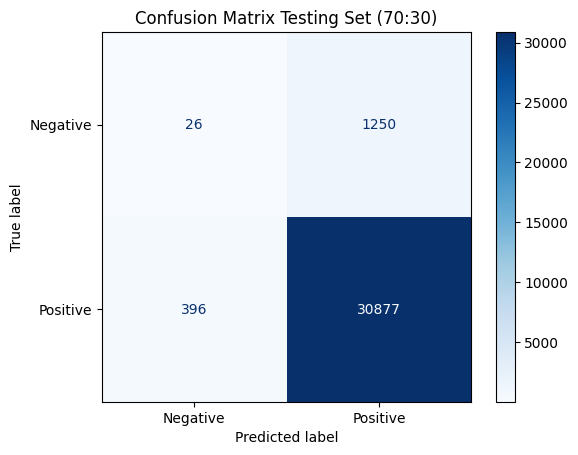


Jumlah True Negatives (TN) (rasio 70:30): 26
Jumlah True Positives (TP) (rasio 70:30): 30877
Jumlah False Negatives (FN) (rasio 70:30): 396
Jumlah False Positives (FP) (rasio 70:30): 1250

Jumlah True Negatives (TN) (rasio 80:19): 6
Jumlah True Positives (TP) (rasio 80:19): 20863
Jumlah False Negatives (FN) (rasio 80:19): 318
Jumlah False Positives (FP) (rasio 80:19): 512

Jumlah True Negatives (TN) (rasio 90:9): 3
Jumlah True Positives (TP) (rasio 90:9): 10334
Jumlah False Negatives (FN) (rasio 90:9): 190
Jumlah False Positives (FP) (rasio 90:9): 323
+---------+----------------+---------------+--------------+----------------+----------------+------------------------+----------------------+-----------+
| Rasio   |   Jumlah Train |   Jumlah Test | Split Data   |   True Positif |   True Negatif |   Jumlah Data Prediksi |   Jumlah Data Aktual |   Akurasi |
+=========+================+===============+==============+================+================+========================+===============

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Contoh data teks dari dataset Anda (gunakan kolom yang sesuai dengan data Anda)
text_data = dataset_filtered['lemmatized_result'].tolist()

# Inisialisasi CountVectorizer dengan konfigurasi default atau sesuai kebutuhan
vectorizer = CountVectorizer()

# Fit dan transform teks menggunakan CountVectorizer
bow_representation = vectorizer.fit_transform(text_data)

# Menghitung jumlah data dalam setiap sentimen
jumlah_data_sentimen = dataset_filtered['sentimen_keseluruhan'].value_counts()

# Tabel jumlah data dalam setiap sentimen
print("Number of data points for each sentiment:")
jumlah_data_sentimen_df = pd.DataFrame(jumlah_data_sentimen).reset_index()
jumlah_data_sentimen_df.columns = ['Sentiment', 'Number of Data']
print(tabulate(jumlah_data_sentimen_df, headers='keys', tablefmt='grid'))
print()

# Menghitung jumlah data True untuk setiap aspek dan split data berdasarkan rasio
rasios = [0.7, 0.8, 0.9]
results = []

for rasio in rasios:
    # Reset indeks dataset_filtered
    dataset_filtered.reset_index(drop=True, inplace=True)

    # Split data secara keseluruhan
    train_data = dataset_filtered.sample(frac=rasio, random_state=1).reset_index(drop=True)
    test_data = dataset_filtered.drop(train_data.index).reset_index(drop=True)

    # Ambil indeks untuk train dan test set
    train_indices = train_data.index
    test_indices = test_data.index

    # Ambil bagian yang sesuai dari bow_representation menggunakan indeks
    X_train = bow_representation[train_indices]
    y_train = train_data['sentimen_keseluruhan']
    X_test = bow_representation[test_indices]
    y_test = test_data['sentimen_keseluruhan']

    # Membuat dan melatih model Naive Bayes
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)

    # Melakukan prediksi pada data uji
    y_train_pred = nb_model.predict(X_train)
    y_test_pred = nb_model.predict(X_test)

    # Menghitung akurasi
    train_accuracy = accuracy_score(y_train, y_train_pred) * 100
    test_accuracy = accuracy_score(y_test, y_test_pred) * 100

    # Confusion matrix untuk training set
    cm_train = confusion_matrix(y_train, y_train_pred)

    # Confusion matrix untuk testing set
    cm_test = confusion_matrix(y_test, y_test_pred)

    # Menampilkan confusion matrix untuk testing dan training 70:30
    if rasio == 0.7:
        # Plot confusion matrix untuk training set
        disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=nb_model.classes_)
        disp_train.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix Training Set (70:30)')
        plt.show()

        # Plot confusion matrix untuk testing set
        disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=nb_model.classes_)
        disp_test.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix Testing Set (70:30)')
        plt.show()

    # Menambahkan hasil ke dalam tabel results
    results.append([
        f"{int(rasio*100)}:{int((1-rasio)*100)}",
        len(train_data),
        len(test_data),
        "Train",
        cm_train[1, 1],  # True Positif Train (kelas positif)
        cm_train[0, 0],  # True Negatif Train (kelas negatif)
        cm_train[1, 1] + cm_train[0, 0],  # True Positif + True Negatif Train
        len(y_train_pred),
        train_accuracy,
    ])

    results.append([
        f"{int(rasio*100)}:{int((1-rasio)*100)}",
        len(train_data),
        len(test_data),
        "Test",
        cm_test[1, 1],  # True Positif Test (kelas positif)
        cm_test[0, 0],  # True Negatif Test (kelas negatif)
        cm_test[1, 1] + cm_test[0, 0],  # True Positif + True Negatif Test
        len(y_test_pred),
        test_accuracy,
    ])

    # Menampilkan jumlah TN, TP, FN, FP untuk testing set
    print(f'\nJumlah True Negatives (TN) (rasio {int(rasio*100)}:{int((1-rasio)*100)}): {cm_test[0, 0]}')
    print(f'Jumlah True Positives (TP) (rasio {int(rasio*100)}:{int((1-rasio)*100)}): {cm_test[1, 1]}')
    print(f'Jumlah False Negatives (FN) (rasio {int(rasio*100)}:{int((1-rasio)*100)}): {cm_test[1, 0]}')
    print(f'Jumlah False Positives (FP) (rasio {int(rasio*100)}:{int((1-rasio)*100)}): {cm_test[0, 1]}')

# Menampilkan hasil sesuai format yang diminta
print(tabulate(results, headers=["Rasio", "Jumlah Train", "Jumlah Test", "Split Data", "True Positif", "True Negatif", "Jumlah Data Prediksi", "Jumlah Data Aktual","Akurasi"], tablefmt='grid'))


In [ ]:
# Check for any out-of-range indices in train_indices or test_indices
max_index = dataset_filtered.index.max()

out_of_range_indices = [idx for idx in train_indices if idx > max_index] + [idx for idx in test_indices if idx > max_index]
if out_of_range_indices:
    print(f"Out of range indices found: {out_of_range_indices}")

# Further debugging to understand how indices are generated
# Print specific indices causing the issue
problematic_indices = [idx for idx in train_indices if idx == 135732] + [idx for idx in test_indices if idx == 135732]
if problematic_indices:
    print(f"Problematic indices found: {problematic_indices}")

# Print dataset statistics to ensure consistency
print(dataset_filtered.describe())

# Ensure dataset size matches expectations
print(f"Expected dataset size: {len(dataset_filtered)}")


Problematic indices found: [135732]
               score  thumbsUpCount                           date
count  108497.000000  108497.000000                         108497
mean        4.444906       2.279381  2024-01-25 08:24:34.298828544
min         1.000000       0.000000            2023-07-25 15:03:00
25%         4.000000       0.000000            2023-11-23 14:25:00
50%         5.000000       0.000000            2024-02-22 16:20:00
75%         5.000000       0.000000            2024-04-12 13:06:00
max         5.000000    1462.000000            2024-05-18 13:01:00
std         1.110419      27.837141                            NaN
Expected dataset size: 108497


Number of data points for each sentiment:
+----+-------------+------------------+
|    | Sentiment   |   Number of Data |
+====+=============+==================+
|  0 | Positive    |            98121 |
+----+-------------+------------------+
|  1 | Negative    |            10376 |
+----+-------------+------------------+



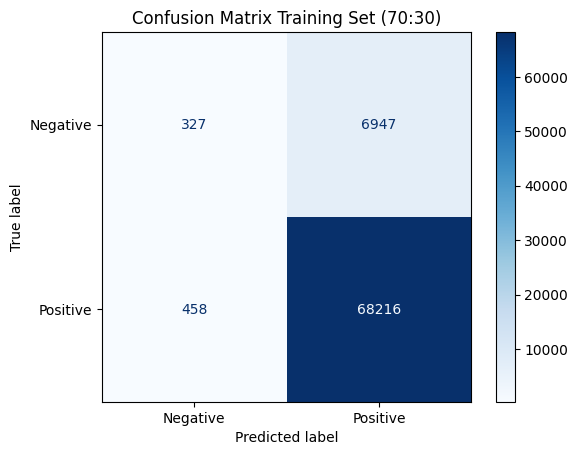

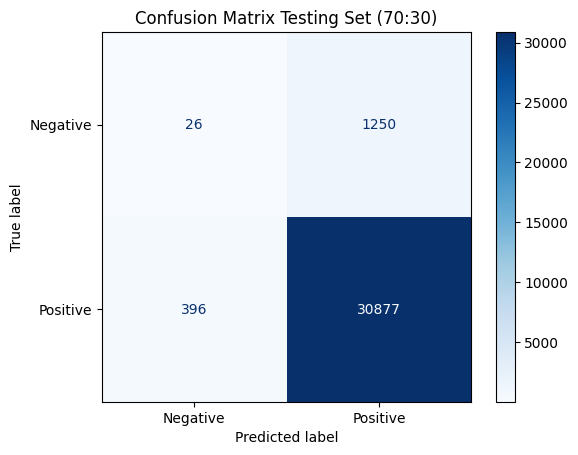


Jumlah True Negatives (TN) (rasio 70:30): 26
Jumlah True Positives (TP) (rasio 70:30): 30877
Jumlah False Negatives (FN) (rasio 70:30): 396
Jumlah False Positives (FP) (rasio 70:30): 1250

Hasil Perhitungan rasio 70:30 data test
+---------------+-----------+
| Metric        |     Value |
+===============+===========+
| Precision (P) | 0.961092  |
+---------------+-----------+
| Recall (P)    | 0.987337  |
+---------------+-----------+
| F score (P)   | 0.974038  |
+---------------+-----------+
| Precision (N) | 0.0616114 |
+---------------+-----------+
| Recall (N)    | 0.0203762 |
+---------------+-----------+
| F score (N)   | 0.0306243 |
+---------------+-----------+


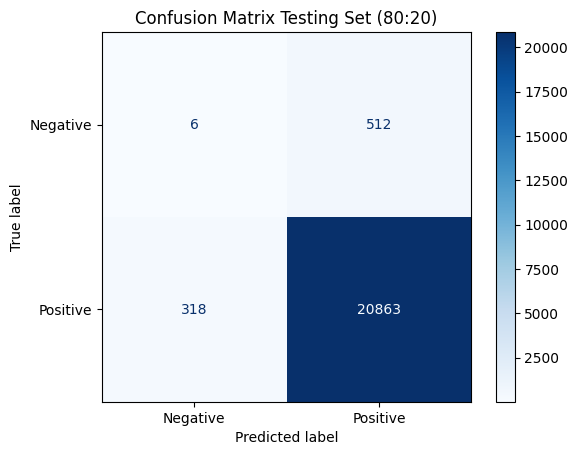


Jumlah True Negatives (TN) (rasio 80:19): 6
Jumlah True Positives (TP) (rasio 80:19): 20863
Jumlah False Negatives (FN) (rasio 80:19): 318
Jumlah False Positives (FP) (rasio 80:19): 512

Hasil Perhitungan rasio 80:19 data test
+---------------+-----------+
| Metric        |     Value |
+===============+===========+
| Precision (P) | 0.976047  |
+---------------+-----------+
| Recall (P)    | 0.984987  |
+---------------+-----------+
| F score (P)   | 0.980496  |
+---------------+-----------+
| Precision (N) | 0.0185185 |
+---------------+-----------+
| Recall (N)    | 0.011583  |
+---------------+-----------+
| F score (N)   | 0.0142518 |
+---------------+-----------+


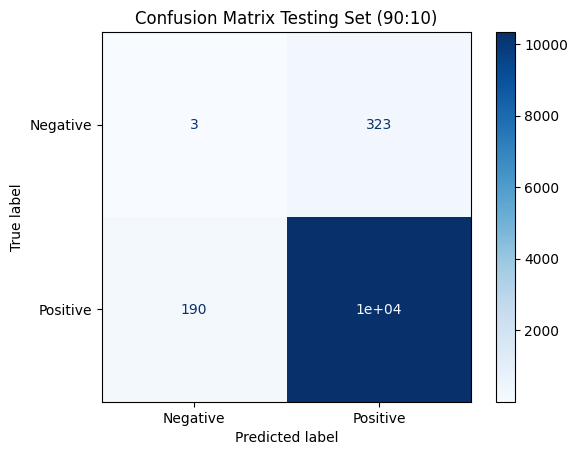


Jumlah True Negatives (TN) (rasio 90:9): 3
Jumlah True Positives (TP) (rasio 90:9): 10334
Jumlah False Negatives (FN) (rasio 90:9): 190
Jumlah False Positives (FP) (rasio 90:9): 323

Hasil Perhitungan rasio 90:9 data test
+---------------+------------+
| Metric        |      Value |
+===============+============+
| Precision (P) | 0.969691   |
+---------------+------------+
| Recall (P)    | 0.981946   |
+---------------+------------+
| F score (P)   | 0.97578    |
+---------------+------------+
| Precision (N) | 0.015544   |
+---------------+------------+
| Recall (N)    | 0.00920245 |
+---------------+------------+
| F score (N)   | 0.0115607  |
+---------------+------------+
+---------+----------------+---------------+--------------+----------------+----------------+------------------------+----------------------+-----------+
| Rasio   |   Jumlah Train |   Jumlah Test | Split Data   |   True Positif |   True Negatif |   Jumlah Data Prediksi |   Jumlah Data Aktual |   Akurasi |
+===

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Contoh data teks dari dataset Anda (gunakan kolom yang sesuai dengan data Anda)
text_data = dataset_filtered['lemmatized_result'].tolist()

# Inisialisasi CountVectorizer dengan konfigurasi default atau sesuai kebutuhan
vectorizer = CountVectorizer()

# Fit dan transform teks menggunakan CountVectorizer
bow_representation = vectorizer.fit_transform(text_data)

# Menghitung jumlah data dalam setiap sentimen
jumlah_data_sentimen = dataset_filtered['sentimen_keseluruhan'].value_counts()

# Tabel jumlah data dalam setiap sentimen
print("Number of data points for each sentiment:")
jumlah_data_sentimen_df = pd.DataFrame(jumlah_data_sentimen).reset_index()
jumlah_data_sentimen_df.columns = ['Sentiment', 'Number of Data']
print(tabulate(jumlah_data_sentimen_df, headers='keys', tablefmt='grid'))
print()

# Menghitung jumlah data True untuk setiap aspek dan split data berdasarkan rasio
rasios = [0.7, 0.8, 0.9]
results = []

for rasio in rasios:
    # Reset indeks dataset_filtered
    dataset_filtered.reset_index(drop=True, inplace=True)

    # Split data secara keseluruhan
    train_data = dataset_filtered.sample(frac=rasio, random_state=1).reset_index(drop=True)
    test_data = dataset_filtered.drop(train_data.index).reset_index(drop=True)

    # Ambil indeks untuk train dan test set
    train_indices = train_data.index
    test_indices = test_data.index

    # Ambil bagian yang sesuai dari bow_representation menggunakan indeks
    X_train = bow_representation[train_indices]
    y_train = train_data['sentimen_keseluruhan']
    X_test = bow_representation[test_indices]
    y_test = test_data['sentimen_keseluruhan']

    # Membuat dan melatih model Naive Bayes
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)

    # Melakukan prediksi pada data uji
    y_train_pred = nb_model.predict(X_train)
    y_test_pred = nb_model.predict(X_test)

    # Menghitung akurasi
    train_accuracy = accuracy_score(y_train, y_train_pred) * 100
    test_accuracy = accuracy_score(y_test, y_test_pred) * 100

    # Confusion matrix untuk training set
    cm_train = confusion_matrix(y_train, y_train_pred)

    # Confusion matrix untuk testing set
    cm_test = confusion_matrix(y_test, y_test_pred)

    # Menampilkan confusion matrix untuk training dan testing set
    if rasio == 0.7:
        # Plot confusion matrix untuk training set
        disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=nb_model.classes_)
        disp_train.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix Training Set (70:30)')
        plt.show()

        # Plot confusion matrix untuk testing set
        disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=nb_model.classes_)
        disp_test.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix Testing Set (70:30)')
        plt.show()

    elif rasio == 0.8:
        # Plot confusion matrix untuk testing set (80:20)
        disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=nb_model.classes_)
        disp_test.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix Testing Set (80:20)')
        plt.show()

    elif rasio == 0.9:
        # Plot confusion matrix untuk testing set (90:10)
        disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=nb_model.classes_)
        disp_test.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix Testing Set (90:10)')
        plt.show()

    # Menambahkan hasil ke dalam tabel results
    results.append([
        f"{int(rasio*100)}:{int((1-rasio)*100)}",
        len(train_data),
        len(test_data),
        "Train",
        cm_train[1, 1],  # True Positif Train (kelas positif)
        cm_train[0, 0],  # True Negatif Train (kelas negatif)
        cm_train[1, 1] + cm_train[0, 0],  # True Positif + True Negatif Train
        len(y_train_pred),
        train_accuracy,
    ])

    results.append([
        f"{int(rasio*100)}:{int((1-rasio)*100)}",
        len(train_data),
        len(test_data),
        "Test",
        cm_test[1, 1],  # True Positif Test (kelas positif)
        cm_test[0, 0],  # True Negatif Test (kelas negatif)
        cm_test[1, 1] + cm_test[0, 0],  # True Positif + True Negatif Test
        len(y_test_pred),
        test_accuracy,
    ])

    # Menampilkan jumlah TN, TP, FN, FP untuk testing set
    print(f'\nJumlah True Negatives (TN) (rasio {int(rasio*100)}:{int((1-rasio)*100)}): {cm_test[0, 0]}')
    print(f'Jumlah True Positives (TP) (rasio {int(rasio*100)}:{int((1-rasio)*100)}): {cm_test[1, 1]}')
    print(f'Jumlah False Negatives (FN) (rasio {int(rasio*100)}:{int((1-rasio)*100)}): {cm_test[1, 0]}')
    print(f'Jumlah False Positives (FP) (rasio {int(rasio*100)}:{int((1-rasio)*100)}): {cm_test[0, 1]}')

    # Menghitung precision, recall, dan F score untuk kedua kelas (positif dan negatif)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)

    # Membuat tabel untuk menampilkan precision, recall, dan F score
    metrics_table = [
        ["Precision (P)", precision[1]],  # Precision untuk kelas positif (P)
        ["Recall (P)", recall[1]],        # Recall untuk kelas positif (P)
        ["F score (P)", fscore[1]],       # F score untuk kelas positif (P)
        ["Precision (N)", precision[0]],  # Precision untuk kelas negatif (N)
        ["Recall (N)", recall[0]],        # Recall untuk kelas negatif (N)
        ["F score (N)", fscore[0]]        # F score untuk kelas negatif (N)
    ]

    print("\nHasil Perhitungan rasio {0}:{1} data test".format(int(rasio * 100), int((1 - rasio) * 100)))
    # Menampilkan tabel
    print(tabulate(metrics_table, headers=["Metric", "Value"], tablefmt='grid'))

# Menampilkan hasil sesuai format yang diminta
print(tabulate(results, headers=["Rasio", "Jumlah Train", "Jumlah Test", "Split Data", "True Positif", "True Negatif", "Jumlah Data Prediksi", "Jumlah Data Aktual", "Akurasi"], tablefmt='grid'))


Jumlah data dalam setiap sentimen:
+----+------------+---------------+
|    | Sentimen   |   Jumlah Data |
+====+============+===============+
|  0 | Positive   |         98121 |
+----+------------+---------------+
|  1 | Negative   |         10376 |
+----+------------+---------------+



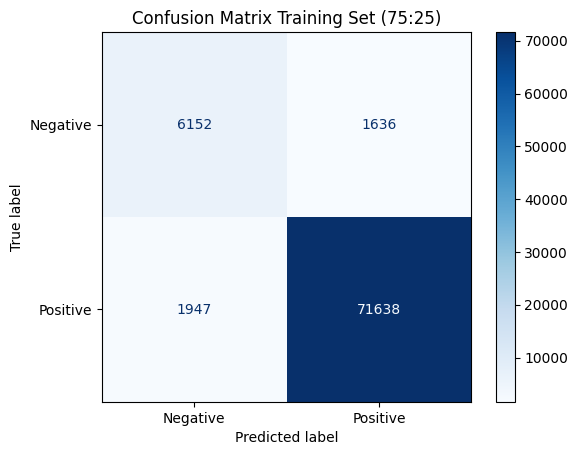

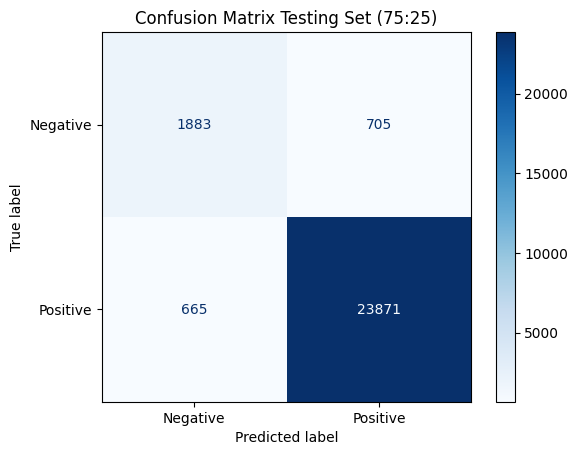


Jumlah True Negatives (TN) (rasio 75:25): 1883
Jumlah True Positives (TP) (rasio 75:25): 23871
Jumlah False Negatives (FN) (rasio 75:25): 665
Jumlah False Positives (FP) (rasio 75:25): 705

Hasil Perhitungan rasio 75:25 data test
+---------------+----------+
| Metric        |    Value |
+===============+==========+
| Precision (P) | 0.971313 |
+---------------+----------+
| Recall (P)    | 0.972897 |
+---------------+----------+
| F score (P)   | 0.972105 |
+---------------+----------+
| Precision (N) | 0.739011 |
+---------------+----------+
| Recall (N)    | 0.727589 |
+---------------+----------+
| F score (N)   | 0.733255 |
+---------------+----------+


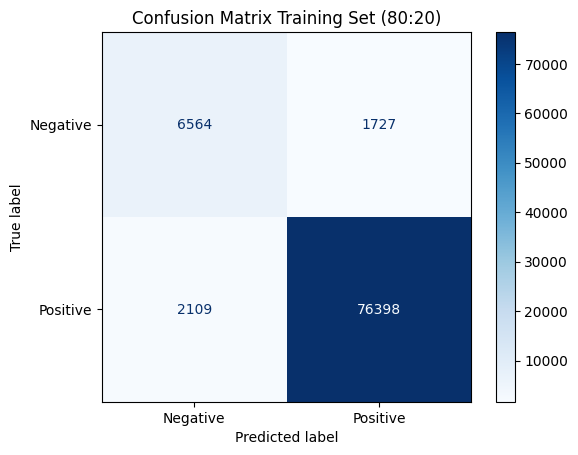

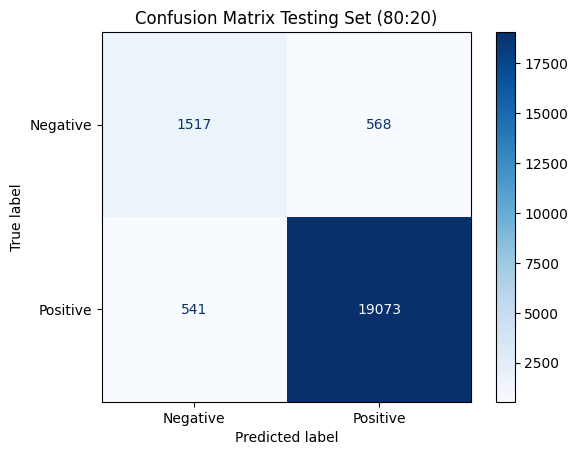


Jumlah True Negatives (TN) (rasio 80:19): 1517
Jumlah True Positives (TP) (rasio 80:19): 19073
Jumlah False Negatives (FN) (rasio 80:19): 541
Jumlah False Positives (FP) (rasio 80:19): 568

Hasil Perhitungan rasio 80:19 data test
+---------------+----------+
| Metric        |    Value |
+===============+==========+
| Precision (P) | 0.971081 |
+---------------+----------+
| Recall (P)    | 0.972418 |
+---------------+----------+
| F score (P)   | 0.971749 |
+---------------+----------+
| Precision (N) | 0.737123 |
+---------------+----------+
| Recall (N)    | 0.727578 |
+---------------+----------+
| F score (N)   | 0.73232  |
+---------------+----------+


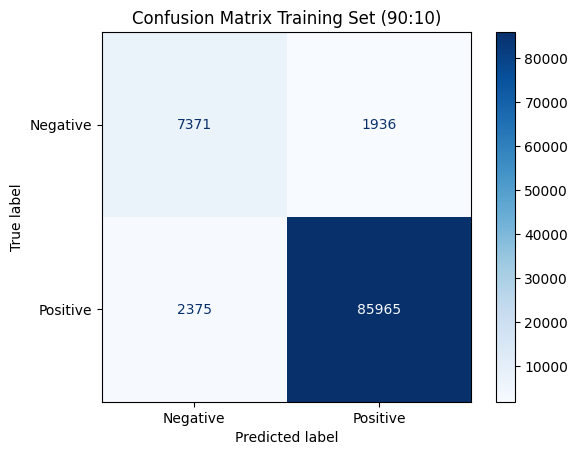

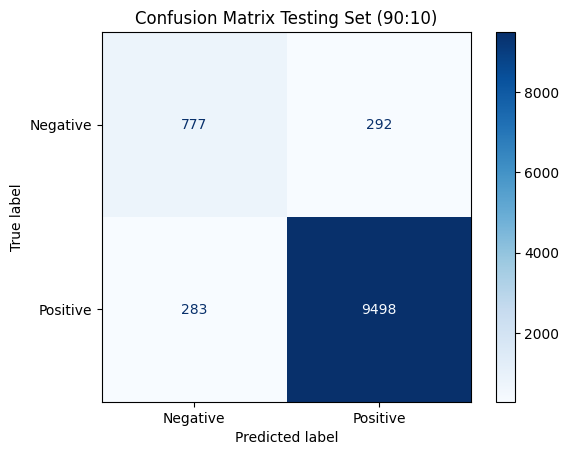


Jumlah True Negatives (TN) (rasio 90:9): 777
Jumlah True Positives (TP) (rasio 90:9): 9498
Jumlah False Negatives (FN) (rasio 90:9): 283
Jumlah False Positives (FP) (rasio 90:9): 292

Hasil Perhitungan rasio 90:9 data test
+---------------+----------+
| Metric        |    Value |
+===============+==========+
| Precision (P) | 0.970174 |
+---------------+----------+
| Recall (P)    | 0.971066 |
+---------------+----------+
| F score (P)   | 0.97062  |
+---------------+----------+
| Precision (N) | 0.733019 |
+---------------+----------+
| Recall (N)    | 0.726848 |
+---------------+----------+
| F score (N)   | 0.72992  |
+---------------+----------+
+---------+----------------+---------------+--------------+----------------+----------------+------------------------+----------------------+-----------+
| Rasio   |   Jumlah Train |   Jumlah Test | Split Data   |   True Positif |   True Negatif |   Jumlah Data Prediksi |   Jumlah Data Aktual |   Akurasi |
+=========+================+=====

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support
from tabulate import tabulate
import matplotlib.pyplot as plt

# Anggap dataset_filtered adalah DataFrame dengan kolom 'lemmatized_result' dan 'sentimen_keseluruhan'
# Misalnya:
# dataset_filtered = pd.read_csv('dataset.csv')

# Menghitung jumlah data dalam setiap sentimen
jumlah_data_sentimen = dataset_filtered['sentimen_keseluruhan'].value_counts()

# Tabel jumlah data dalam setiap sentimen
print("Jumlah data dalam setiap sentimen:")
jumlah_data_sentimen_df = pd.DataFrame(jumlah_data_sentimen).reset_index()
jumlah_data_sentimen_df.columns = ['Sentimen', 'Jumlah Data']
print(tabulate(jumlah_data_sentimen_df, headers='keys', tablefmt='grid'))
print()

# Menghitung jumlah data True untuk setiap aspek dan split data berdasarkan rasio
rasios = [0.75, 0.8, 0.9]  # Mengubah rasio menjadi 75:25, 80:20, 90:10
results = []

# Membuat vectorizer di luar loop agar tidak membuat ulang setiap kali
vectorizer = CountVectorizer()

for rasio in rasios:
    # Split data secara keseluruhan
    train_data = dataset_filtered.sample(frac=rasio, random_state=1)
    test_data = dataset_filtered.drop(train_data.index)

    # Menghitung fitur dengan CountVectorizer
    X_train = train_data['lemmatized_result'].tolist()
    y_train = train_data['sentimen_keseluruhan']
    X_test = test_data['lemmatized_result'].tolist()
    y_test = test_data['sentimen_keseluruhan']

    # Membuat dan melatih model Naive Bayes
    nb_model = MultinomialNB()
    nb_model.fit(vectorizer.fit_transform(X_train), y_train)

    # Melakukan prediksi pada data uji
    y_train_pred = nb_model.predict(vectorizer.transform(X_train))
    y_test_pred = nb_model.predict(vectorizer.transform(X_test))

    # Menghitung akurasi
    train_accuracy = accuracy_score(y_train, y_train_pred) * 100
    test_accuracy = accuracy_score(y_test, y_test_pred) * 100

    # Confusion matrix untuk training set
    cm_train = confusion_matrix(y_train, y_train_pred)

    # Confusion matrix untuk testing set
    cm_test = confusion_matrix(y_test, y_test_pred)

    # Menampilkan confusion matrix untuk testing dan training set
    if rasio == 0.75:
        # Plot confusion matrix untuk training set
        disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=nb_model.classes_)
        disp_train.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix Training Set (75:25)')
        plt.show()

        # Plot confusion matrix untuk testing set
        disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=nb_model.classes_)
        disp_test.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix Testing Set (75:25)')
        plt.show()

    elif rasio == 0.8:
        # Plot confusion matrix untuk training set (80:20)
        disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=nb_model.classes_)
        disp_train.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix Training Set (80:20)')
        plt.show()

        # Plot confusion matrix untuk testing set (80:20)
        disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=nb_model.classes_)
        disp_test.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix Testing Set (80:20)')
        plt.show()

    elif rasio == 0.9:
        # Plot confusion matrix untuk training set (90:10)
        disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=nb_model.classes_)
        disp_train.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix Training Set (90:10)')
        plt.show()

        # Plot confusion matrix untuk testing set (90:10)
        disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=nb_model.classes_)
        disp_test.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix Testing Set (90:10)')
        plt.show()

    # Menambahkan hasil ke dalam tabel results
    results.append([
        f"{int(rasio*100)}:{int((1-rasio)*100)}",
        len(train_data),
        len(test_data),
        "Train",
        cm_train[1, 1],  # True Positif Train (kelas positif)
        cm_train[0, 0],  # True Negatif Train (kelas negatif)
        cm_train[1, 1] + cm_train[0, 0],  # True Positif + True Negatif Train
        len(y_train_pred),
        train_accuracy,
    ])

    results.append([
        f"{int(rasio*100)}:{int((1-rasio)*100)}",
        len(train_data),
        len(test_data),
        "Test",
        cm_test[1, 1],  # True Positif Test (kelas positif)
        cm_test[0, 0],  # True Negatif Test (kelas negatif)
        cm_test[1, 1] + cm_test[0, 0],  # True Positif + True Negatif Test
        len(y_test_pred),
        test_accuracy,
    ])

    # Menampilkan jumlah TN, TP, FN, FP untuk testing set
    print(f'\nJumlah True Negatives (TN) (rasio {int(rasio*100)}:{int((1-rasio)*100)}): {cm_test[0, 0]}')
    print(f'Jumlah True Positives (TP) (rasio {int(rasio*100)}:{int((1-rasio)*100)}): {cm_test[1, 1]}')
    print(f'Jumlah False Negatives (FN) (rasio {int(rasio*100)}:{int((1-rasio)*100)}): {cm_test[1, 0]}')
    print(f'Jumlah False Positives (FP) (rasio {int(rasio*100)}:{int((1-rasio)*100)}): {cm_test[0, 1]}')

    # Menghitung precision, recall, dan F score untuk kedua kelas (positif dan negatif)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)

    # Membuat tabel untuk menampilkan precision, recall, dan F score
    metrics_table = [
        ["Precision (P)", precision[1]],  # Precision untuk kelas positif (P)
        ["Recall (P)", recall[1]],        # Recall untuk kelas positif (P)
        ["F score (P)", fscore[1]],       # F score untuk kelas positif (P)
        ["Precision (N)", precision[0]],  # Precision untuk kelas negatif (N)
        ["Recall (N)", recall[0]],        # Recall untuk kelas negatif (N)
        ["F score (N)", fscore[0]]        # F score untuk kelas negatif (N)
    ]

    print("\nHasil Perhitungan rasio {0}:{1} data test".format(int(rasio * 100), int((1 - rasio) * 100)))
    # Menampilkan tabel
    print(tabulate(metrics_table, headers=["Metric", "Value"], tablefmt='grid'))

# Menampilkan hasil sesuai format yang diminta
print(tabulate(results, headers=["Rasio", "Jumlah Train", "Jumlah Test", "Split Data", "True Positif", "True Negatif", "Jumlah Data Prediksi", "Jumlah Data Aktual", "Akurasi"], tablefmt='grid'))


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import KFold
from tabulate import tabulate
import matplotlib.pyplot as plt

# Anggap dataset_filtered adalah DataFrame dengan kolom 'lemmatized_result' dan 'sentimen_keseluruhan'
# Misalnya:
# dataset_filtered = pd.read_csv('dataset.csv')

# Menghitung jumlah data dalam setiap sentimen
jumlah_data_sentimen = dataset_filtered['sentimen_keseluruhan'].value_counts()

# Tabel jumlah data dalam setiap sentimen
print("Jumlah data dalam setiap sentimen:")
jumlah_data_sentimen_df = pd.DataFrame(jumlah_data_sentimen).reset_index()
jumlah_data_sentimen_df.columns = ['Sentimen', 'Jumlah Data']
print(tabulate(jumlah_data_sentimen_df, headers='keys', tablefmt='grid'))
print()

# Menghitung jumlah data True untuk setiap aspek dan split data berdasarkan rasio
rasios = [0.75, 0.8, 0.9]  # Mengubah rasio menjadi 75:25, 80:20, 90:10
results = []

# Membuat vectorizer di luar loop agar tidak membuat ulang setiap kali
vectorizer = CountVectorizer()

# Definisikan jumlah lipatan untuk K-Fold Cross Validation sesuai rasio yang diinginkan
k_folds = {0.75: 4, 0.8: 5, 0.9: 10}

for rasio in rasios:
    # Split data secara keseluruhan
    train_data = dataset_filtered.sample(frac=rasio, random_state=1)
    test_data = dataset_filtered.drop(train_data.index)

    # Menghitung fitur dengan CountVectorizer
    X_train = train_data['lemmatized_result'].tolist()
    y_train = train_data['sentimen_keseluruhan']
    X_test = test_data['lemmatized_result'].tolist()
    y_test = test_data['sentimen_keseluruhan']

    # Inisialisasi KFold dengan jumlah lipatan yang sesuai
    num_folds = k_folds[rasio]
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=1)

    # Membuat dan melatih model Naive Bayes untuk setiap lipatan
    fold_results = []
    fold_number = 1
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = [X_train[i] for i in train_index], [X_train[i] for i in val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Fit CountVectorizer dan transformasi data train
        X_train_transformed = vectorizer.fit_transform(X_train_fold)

        # Membuat dan melatih model Naive Bayes
        nb_model = MultinomialNB()
        nb_model.fit(X_train_transformed, y_train_fold)

        # Melakukan prediksi pada data validasi
        y_val_pred = nb_model.predict(vectorizer.transform(X_val_fold))

        # Menghitung akurasi untuk data validasi
        val_accuracy = accuracy_score(y_val_fold, y_val_pred) * 100

        # Menyimpan hasil lipatan ini
        fold_results.append(val_accuracy)
        print(f"Fold {fold_number} Accuracy: {val_accuracy:.2f}%")
        fold_number += 1

    # Rata-rata akurasi dari semua lipatan
    avg_val_accuracy = sum(fold_results) / len(fold_results)

    # Mencetak hasil rasio
    print(f"\nEvaluasi menggunakan K-Fold Cross Validation (Rasio {int(rasio*100)}:{int((1-rasio)*100)})")
    print(f"Rata-rata akurasi validasi silang: {avg_val_accuracy:.2f}%")

    # Menambahkan hasil ke dalam tabel results
    results.append([
        f"{int(rasio*100)}:{int((1-rasio)*100)}",
        len(train_data),
        len(test_data),
        "K-Fold CV",
        avg_val_accuracy,
    ])

# Menampilkan hasil sesuai format yang diminta
print(tabulate(results, headers=["Rasio", "Jumlah Train", "Jumlah Test", "Split Data", "Avg Cross-Val Accuracy"], tablefmt='grid'))


Jumlah data dalam setiap sentimen:
+----+------------+---------------+
|    | Sentimen   |   Jumlah Data |
+====+============+===============+
|  0 | Positive   |         98121 |
+----+------------+---------------+
|  1 | Negative   |         10376 |
+----+------------+---------------+

Fold 1 Accuracy: 95.07%
Fold 2 Accuracy: 94.80%
Fold 3 Accuracy: 94.93%
Fold 4 Accuracy: 95.16%

Evaluasi menggunakan K-Fold Cross Validation (Rasio 75:25)
Rata-rata akurasi validasi silang: 94.99%
Fold 1 Accuracy: 95.14%
Fold 2 Accuracy: 94.95%
Fold 3 Accuracy: 94.99%
Fold 4 Accuracy: 95.01%
Fold 5 Accuracy: 95.02%

Evaluasi menggunakan K-Fold Cross Validation (Rasio 80:19)
Rata-rata akurasi validasi silang: 95.02%
Fold 1 Accuracy: 94.97%
Fold 2 Accuracy: 95.63%
Fold 3 Accuracy: 95.20%
Fold 4 Accuracy: 94.92%
Fold 5 Accuracy: 95.02%
Fold 6 Accuracy: 94.99%
Fold 7 Accuracy: 94.98%
Fold 8 Accuracy: 95.04%
Fold 9 Accuracy: 95.04%
Fold 10 Accuracy: 95.29%

Evaluasi menggunakan K-Fold Cross Validation (Rasi


Jumlah data positif dan negatif untuk aspek Functionality_contains:
Positif: 14320
Negatif: 1997
Total: 16317


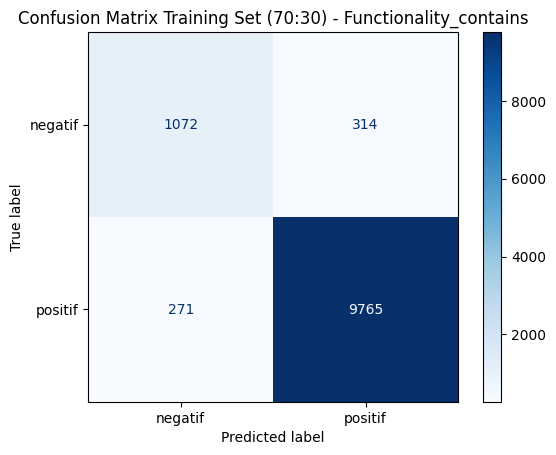

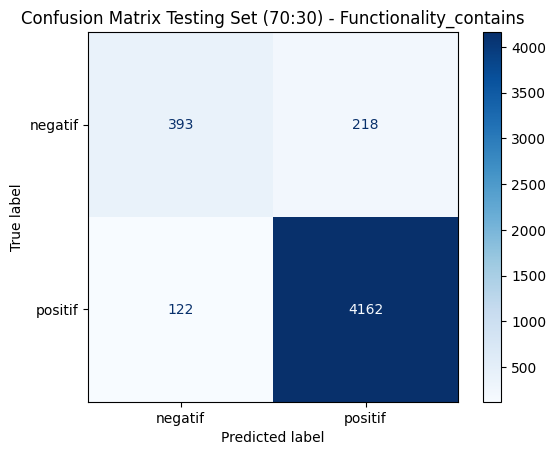


Confusion Matrix Results (TP, TN, FP, FN) for Functionality_contains:
True Positive: 4162
True Negative: 393
False Positive: 218
False Negative: 122

Jumlah data positif dan negatif untuk aspek Feature & Accessibility_contains:
Positif: 5092
Negatif: 1320
Total: 6412


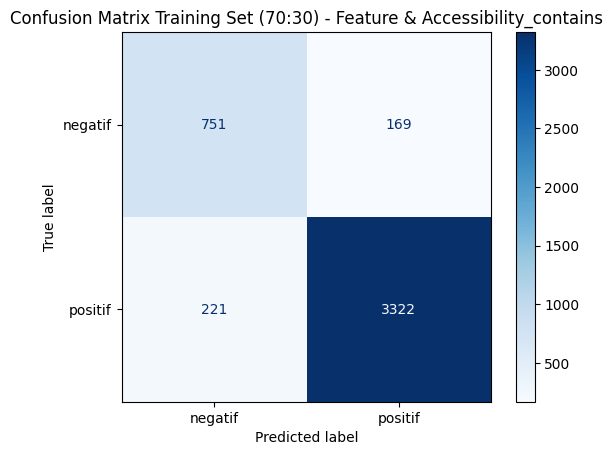

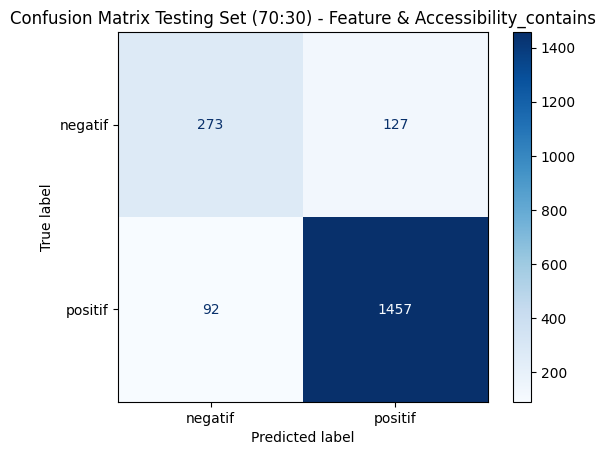


Confusion Matrix Results (TP, TN, FP, FN) for Feature & Accessibility_contains:
True Positive: 1457
True Negative: 273
False Positive: 127
False Negative: 92

Jumlah data positif dan negatif untuk aspek User Experience_contains:
Positif: 9637
Negatif: 399
Total: 10036


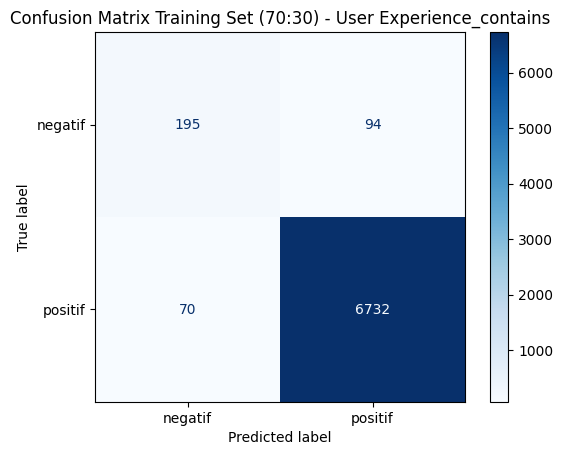

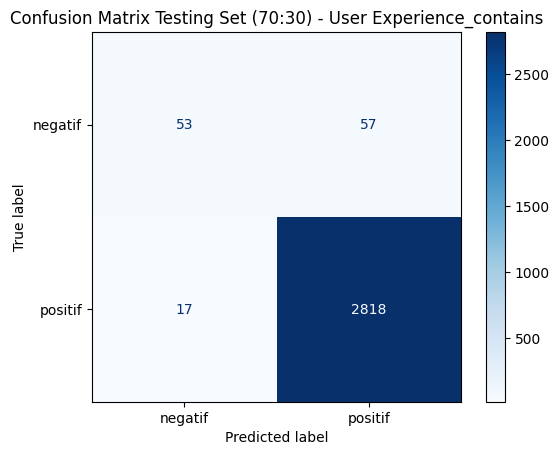


Confusion Matrix Results (TP, TN, FP, FN) for User Experience_contains:
True Positive: 2818
True Negative: 53
False Positive: 57
False Negative: 17

Jumlah data positif dan negatif untuk aspek Education Tool_contains:
Positif: 8959
Negatif: 1974
Total: 10933


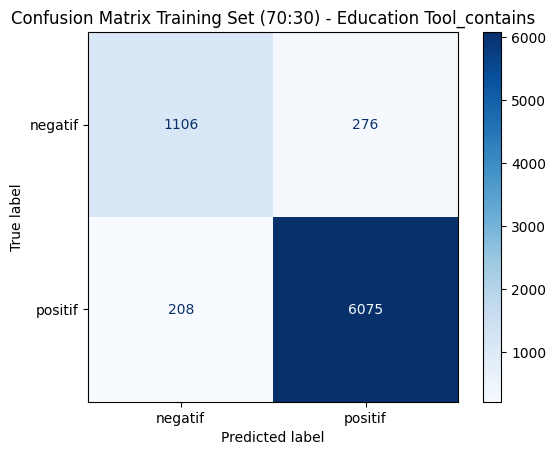

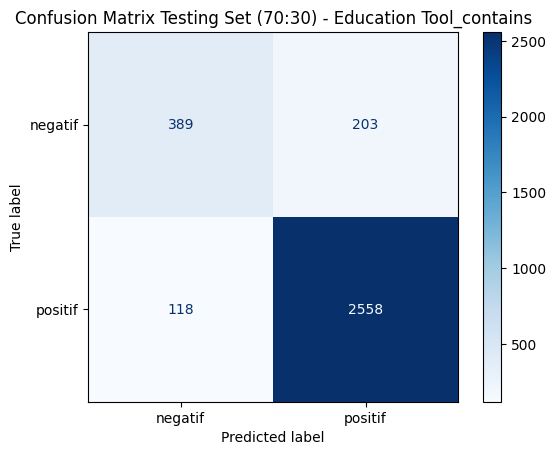


Confusion Matrix Results (TP, TN, FP, FN) for Education Tool_contains:
True Positive: 2558
True Negative: 389
False Positive: 203
False Negative: 118
+----------------------------------+----------------+---------------+--------------+----------------+----------------+------------------------+----------------------+-----------+
| Aspek                            |   Jumlah Train |   Jumlah Test | Split Data   |   True Positif |   True Negatif |   Jumlah Data Prediksi |   Jumlah Data Aktual |   Akurasi |
+==================================+================+===============+==============+================+================+========================+======================+===========+
| Functionality_contains           |          11422 |          4895 | Train        |           9765 |           1072 |                  10837 |                11422 |   94.8783 |
+----------------------------------+----------------+---------------+--------------+----------------+----------------+---------------

In [ ]:
# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score, confusion_matrix
# from tabulate import tabulate

# # Data initialization and processing
# positif_functionality = dataset_filtered[(dataset_filtered['sentimen_keseluruhan'] == 'positif') & (dataset_filtered['Functionality_contains'] == True)].shape[0]
# negatif_functionality = dataset_filtered[(dataset_filtered['sentimen_keseluruhan'] == 'negatif') & (dataset_filtered['Functionality_contains'] == True)].shape[0]

# positif_feature_accessibility = dataset_filtered[(dataset_filtered['sentimen_keseluruhan'] == 'positif') & (dataset_filtered['Feature & Accessibility_contains'] == True)].shape[0]
# negatif_feature_accessibility = dataset_filtered[(dataset_filtered['sentimen_keseluruhan'] == 'negatif') & (dataset_filtered['Feature & Accessibility_contains'] == True)].shape[0]

# positif_user_experience = dataset_filtered[(dataset_filtered['sentimen_keseluruhan'] == 'positif') & (dataset_filtered['User Experience_contains'] == True)].shape[0]
# negatif_user_experience = dataset_filtered[(dataset_filtered['sentimen_keseluruhan'] == 'negatif') & (dataset_filtered['User Experience_contains'] == True)].shape[0]

# positif_education_tool = dataset_filtered[(dataset_filtered['sentimen_keseluruhan'] == 'positif') & (dataset_filtered['Education Tool_contains'] == True)].shape[0]
# negatif_education_tool = dataset_filtered[(dataset_filtered['sentimen_keseluruhan'] == 'negatif') & (dataset_filtered['Education Tool_contains'] == True)].shape[0]

# aspek_columns = ['Functionality_contains', 'Feature & Accessibility_contains', 'User Experience_contains', 'Education Tool_contains']
# results = []

# # Initialize CountVectorizer
# vectorizer = CountVectorizer()

# # Iterate through each aspect
# for aspek in aspek_columns:
#     positif_count = dataset_filtered[(dataset_filtered['sentimen_keseluruhan'] == 'positif') & (dataset_filtered[aspek] == True)].shape[0]
#     negatif_count = dataset_filtered[(dataset_filtered['sentimen_keseluruhan'] == 'negatif') & (dataset_filtered[aspek] == True)].shape[0]
#     total_count = positif_count + negatif_count

#     print(f"\nJumlah data positif dan negatif untuk aspek {aspek}:")
#     print(f"Positif: {positif_count}")
#     print(f"Negatif: {negatif_count}")
#     print(f"Total: {total_count}")

#     # Split data into training and testing sets based on the ratio for each aspect
#     rasio = 0.7  # Ratio for splitting data

#     jumlah_true_train_aspek = sum(dataset_filtered[aspek].sample(frac=rasio, random_state=1))
#     jumlah_true_test_aspek = sum(dataset_filtered[aspek]) - jumlah_true_train_aspek

#     train_aspek = dataset_filtered[dataset_filtered[aspek]].sample(n=int(jumlah_true_train_aspek), random_state=1)
#     test_aspek = dataset_filtered[dataset_filtered[aspek] & (~dataset_filtered.index.isin(train_aspek.index))]

#     X_train_aspek = train_aspek['lemmatized_result'].tolist()
#     y_train_aspek = train_aspek['sentimen_keseluruhan']
#     X_test_aspek = test_aspek['lemmatized_result'].tolist()
#     y_test_aspek = test_aspek['sentimen_keseluruhan']

#     # Initialize CountVectorizer for this aspect inside the loop
#     vectorizer_aspek = CountVectorizer()

#     # Fit CountVectorizer on training data for this aspect
#     X_train_aspek_transformed = vectorizer_aspek.fit_transform(X_train_aspek)

#     # Transform both train and test data using the fitted vectorizer for this aspect
#     X_test_aspek_transformed = vectorizer_aspek.transform(X_test_aspek)

#     # Create and train Naive Bayes model for this aspect
#     nb_model_aspek = MultinomialNB()
#     nb_model_aspek.fit(X_train_aspek_transformed, y_train_aspek)

#     # Predict on training and testing data
#     y_train_aspek_pred = nb_model_aspek.predict(X_train_aspek_transformed)
#     y_test_aspek_pred = nb_model_aspek.predict(X_test_aspek_transformed)

#     # Calculate accuracy for training and testing data
#     train_aspek_accuracy = accuracy_score(y_train_aspek, y_train_aspek_pred) * 100
#     test_aspek_accuracy = accuracy_score(y_test_aspek, y_test_aspek_pred) * 100

#     # Confusion matrix for training and testing data
#     cm_train_aspek = confusion_matrix(y_train_aspek, y_train_aspek_pred)
#     cm_test_aspek = confusion_matrix(y_test_aspek, y_test_aspek_pred)

#     # Calculate TP, TN, FP, FN from confusion matrix for testing data
#     tp_aspek = cm_test_aspek[1, 1]
#     tn_aspek = cm_test_aspek[0, 0]
#     fp_aspek = cm_test_aspek[0, 1]
#     fn_aspek = cm_test_aspek[1, 0]

#     # Append results for training data
#     results.append([
#         aspek,
#         len(train_aspek),
#         len(test_aspek),
#         "Train",
#         cm_train_aspek[1, 1],  # True Positives Train (positive class)
#         cm_train_aspek[0, 0],  # True Negatives Train (negative class)
#         cm_train_aspek[1, 1] + cm_train_aspek[0, 0],
#         len(y_train_aspek_pred),
#         train_aspek_accuracy,
#     ])

#     # Append results for testing data
#     results.append([
#         aspek,
#         len(train_aspek),
#         len(test_aspek),
#         "Test",
#         cm_test_aspek[1, 1],  # True Positives Test (positive class)
#         cm_test_aspek[0, 0],  # True Negatives Test (negative class)
#         cm_test_aspek[1, 1] + cm_test_aspek[0, 0],
#         len(y_test_aspek_pred),
#         test_aspek_accuracy,
#     ])

#     # Display confusion matrices for testing and training 70:30 split
#     if rasio == 0.7:
#         plot_confusion_matrix(cm_train_aspek, nb_model_aspek.classes_, f'Confusion Matrix Training Set (70:30) - {aspek}')
#         plot_confusion_matrix(cm_test_aspek, nb_model_aspek.classes_, f'Confusion Matrix Testing Set (70:30) - {aspek}')

#     # Display TP, TN, FP, FN for the current aspect
#     print(f"\nConfusion Matrix Results (TP, TN, FP, FN) for {aspek}:")
#     print(f"True Positive: {tp_aspek}")
#     print(f"True Negative: {tn_aspek}")
#     print(f"False Positive: {fp_aspek}")
#     print(f"False Negative: {fn_aspek}")

# # Display results as requested format
# print(tabulate(results, headers=["Aspek", "Jumlah Train", "Jumlah Test", "Split Data", "True Positif", "True Negatif", "Jumlah Data Prediksi", "Jumlah Data Aktual", "Akurasi"], tablefmt='grid'))


#Algoritma Naive Bayes Berdasarkan Aspek

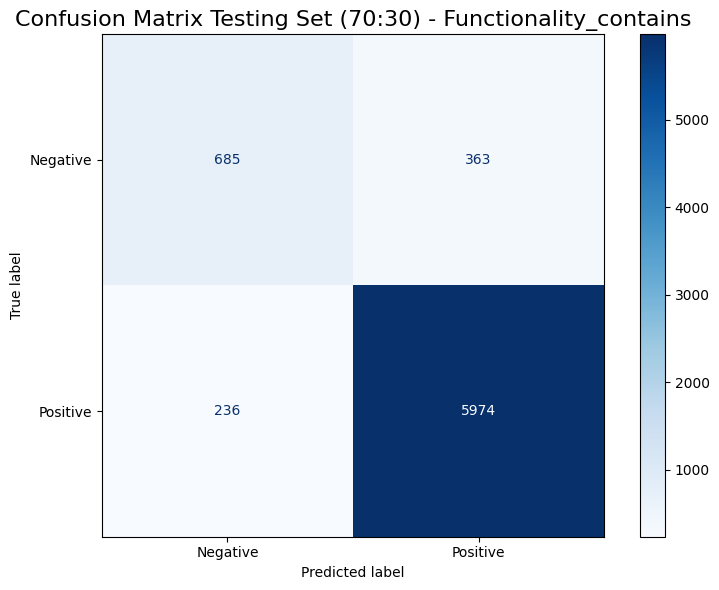

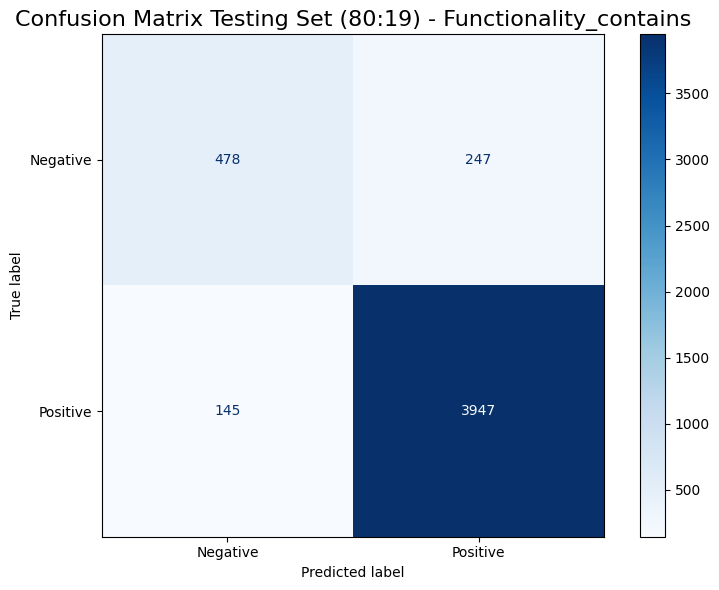

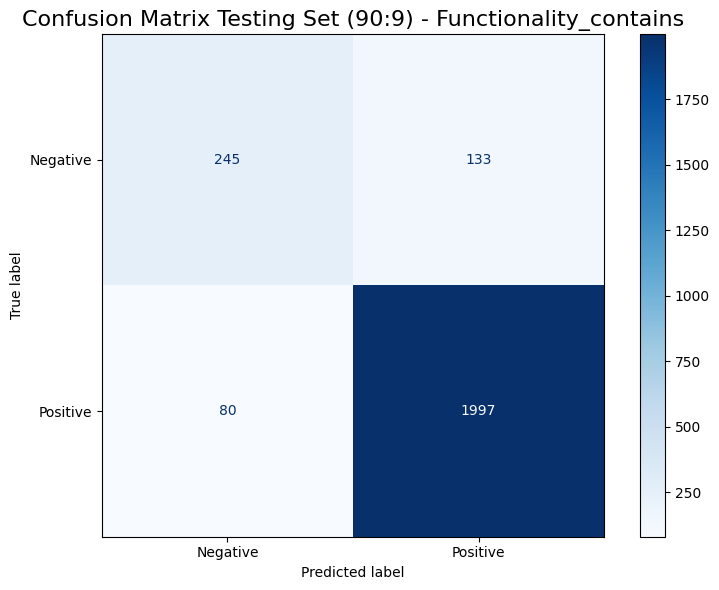

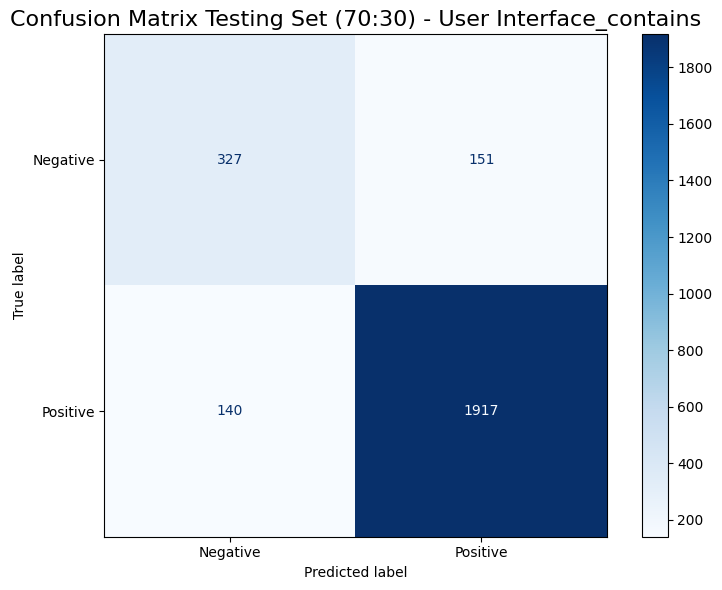

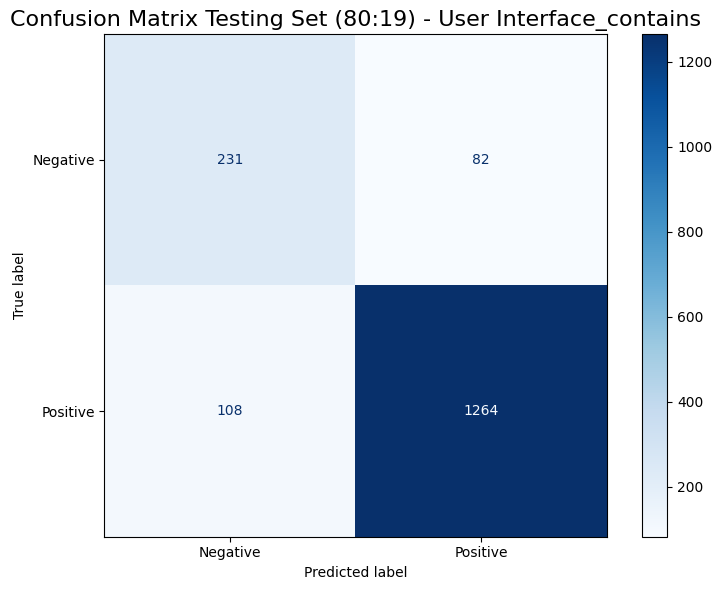

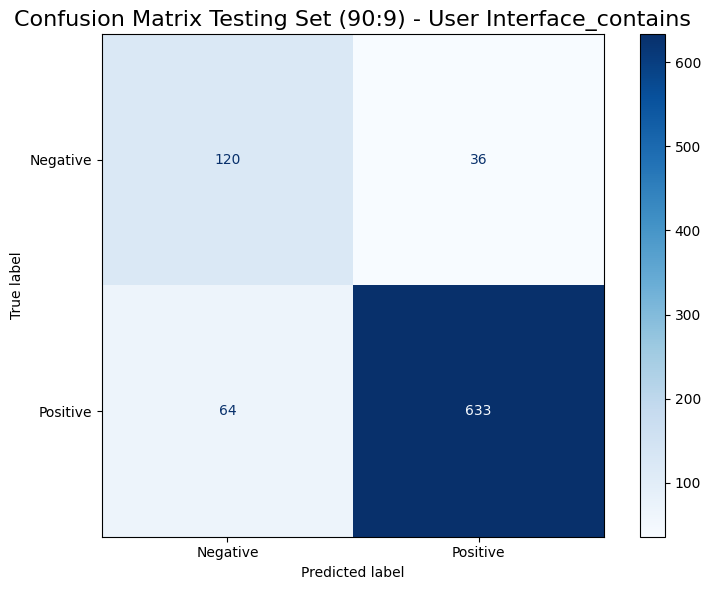

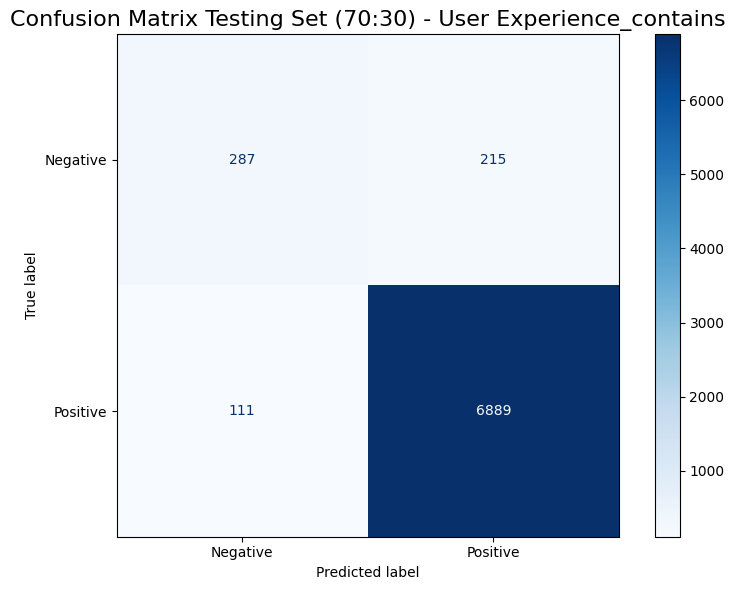

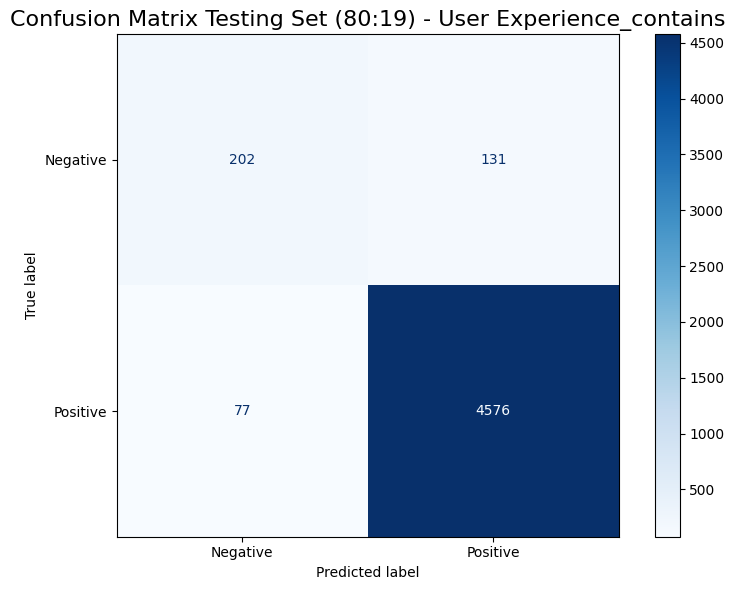

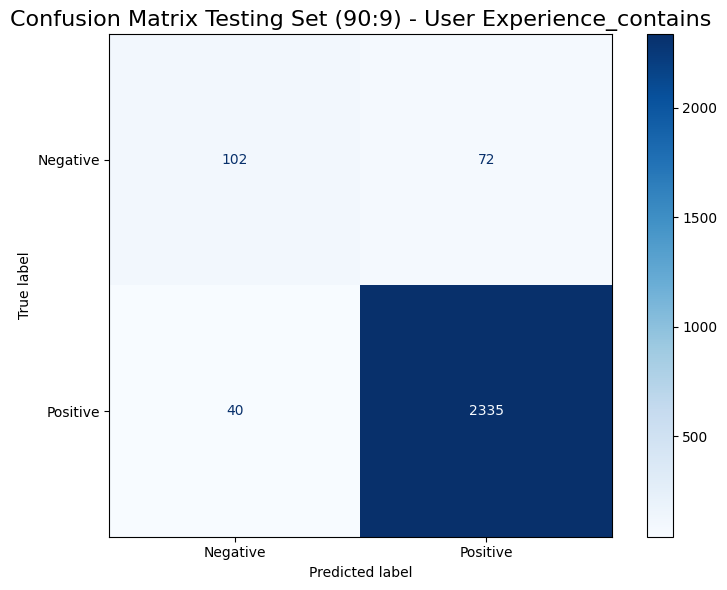

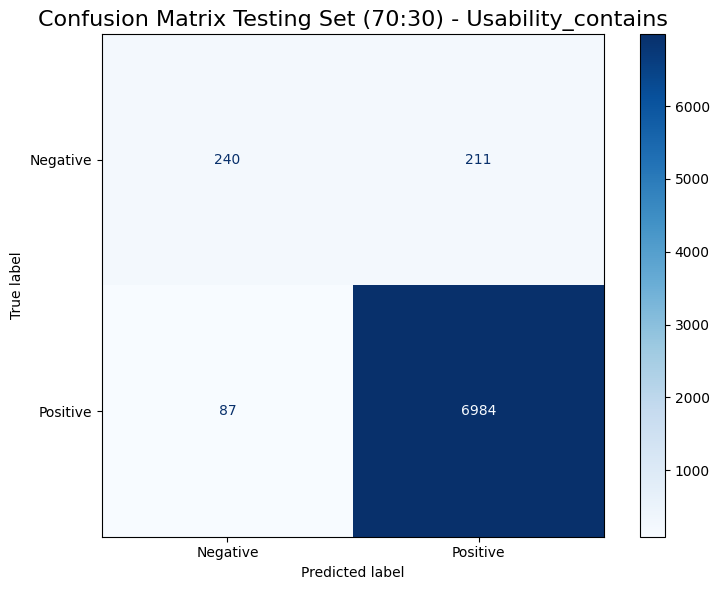

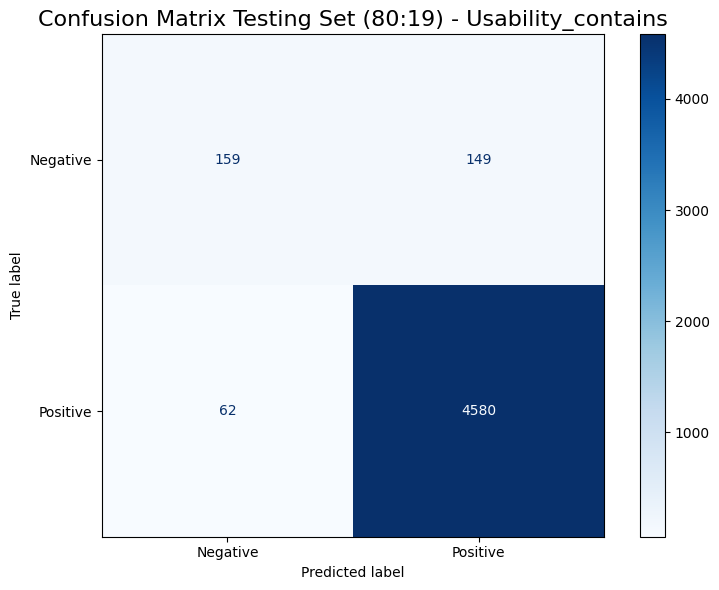

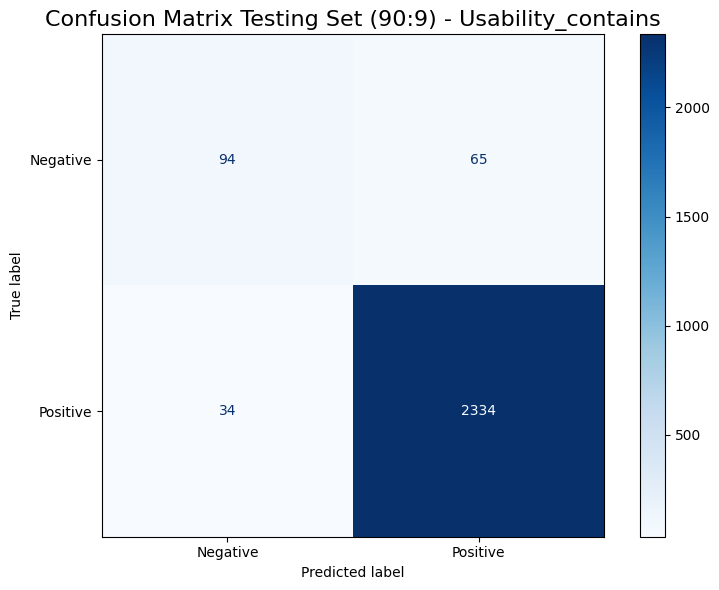

+-------+---------+---------+--------------+----------------+----------------+------------------------+----------------------+-----------+
|       |   Rasio |   Aspek | Split Data   |   True Positif |   True Negatif |   Jumlah Data Prediksi |   Jumlah Data Aktual |   Akurasi |
+=======+=========+=========+==============+================+================+========================+======================+===========+
| 70:30 |   97647 |   10850 | Train        |          85965 |           7371 |                  93336 |                97647 |   95.5851 |
+-------+---------+---------+--------------+----------------+----------------+------------------------+----------------------+-----------+
| 70:30 |   97647 |   10850 | Test         |           9498 |            777 |                  10275 |                10850 |   94.7005 |
+-------+---------+---------+--------------+----------------+----------------+------------------------+----------------------+-----------+
| 80:19 |   97647 |   10850

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Data initialization and processing
aspek_columns = ['Functionality_contains', 'User Interface_contains', 'User Experience_contains', 'Usability_contains']
results = []
all_confusion_matrices = []

# Initialize confusion matrix plot function with ConfusionMatrixDisplay
def plot_confusion_matrix(cm, classes, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figsize as needed
    disp.plot(ax=ax, cmap='Blues', xticks_rotation='horizontal')
    ax.set_title(title, fontsize=16)
    plt.tight_layout()  # Ensures labels are not cut off
    plt.show()

# Iterate through each aspect
for aspek in aspek_columns:
    # Initialize lists to store results for different ratios
    ratio_results = []
    cm_ratios = []

    for rasio in [0.7, 0.8, 0.9]:
        # Split data into training and testing sets based on the ratio for each aspect
        jumlah_true_train_aspek = sum(dataset_filtered[aspek].sample(frac=rasio, random_state=1))
        jumlah_true_test_aspek = sum(dataset_filtered[aspek]) - jumlah_true_train_aspek

        train_aspek = dataset_filtered[dataset_filtered[aspek]].sample(n=int(jumlah_true_train_aspek), random_state=1)
        test_aspek = dataset_filtered[dataset_filtered[aspek] & (~dataset_filtered.index.isin(train_aspek.index))]

        X_train_aspek = train_aspek['lemmatized_result'].tolist()
        y_train_aspek = train_aspek['sentimen_keseluruhan']
        X_test_aspek = test_aspek['lemmatized_result'].tolist()
        y_test_aspek = test_aspek['sentimen_keseluruhan']

        # Initialize CountVectorizer for this aspect inside the loop
        vectorizer_aspek = CountVectorizer()

        # Fit CountVectorizer on training data for this aspect
        X_train_aspek_transformed = vectorizer_aspek.fit_transform(X_train_aspek)

        # Transform both train and test data using the fitted vectorizer for this aspect
        X_test_aspek_transformed = vectorizer_aspek.transform(X_test_aspek)

        # Create and train Naive Bayes model for this aspect
        nb_model_aspek = MultinomialNB()
        nb_model_aspek.fit(X_train_aspek_transformed, y_train_aspek)

        # Predict on training and testing data
        y_train_aspek_pred = nb_model_aspek.predict(X_train_aspek_transformed)
        y_test_aspek_pred = nb_model_aspek.predict(X_test_aspek_transformed)

        # Calculate accuracy for training and testing data
        train_aspek_accuracy = accuracy_score(y_train_aspek, y_train_aspek_pred) * 100
        test_aspek_accuracy = accuracy_score(y_test_aspek, y_test_aspek_pred) * 100

        # Confusion matrix for training and testing data
        cm_train_aspek = confusion_matrix(y_train_aspek, y_train_aspek_pred)
        cm_test_aspek = confusion_matrix(y_test_aspek, y_test_aspek_pred)

        # Store confusion matrices for different ratios
        cm_ratios.append((f'{int(rasio*100)}:{int((1-rasio)*100)}', cm_test_aspek, nb_model_aspek.classes_))

        # Menambahkan hasil ke dalam tabel results
        results.append([
            f"{int(rasio*100)}:{int((1-rasio)*100)}",
            len(train_data),
            len(test_data),
            "Train",
            cm_train[1, 1],  # True Positif Train (kelas positif)
            cm_train[0, 0],  # True Negatif Train (kelas negatif)
            cm_train[1, 1] + cm_train[0, 0],  # True Positif + True Negatif Train
            len(y_train_pred),
            train_accuracy,
        ])

        results.append([
            f"{int(rasio*100)}:{int((1-rasio)*100)}",
            len(train_data),
            len(test_data),
            "Test",
            cm_test[1, 1],  # True Positif Test (kelas positif)
            cm_test[0, 0],  # True Negatif Test (kelas negatif)
            cm_test[1, 1] + cm_test[0, 0],  # True Positif + True Negatif Test
            len(y_test_pred),
            test_accuracy,
        ])

    # Append confusion matrices for all ratios for current aspect
    all_confusion_matrices.extend(cm_ratios)

    # Display results for all ratios for current aspect
    for ratio, cm, classes in cm_ratios:
        plot_confusion_matrix(cm, classes, f'Confusion Matrix Testing Set ({ratio}) - {aspek}')

    # Append results for all ratios for current aspect
    results.extend(ratio_results)

# Display results in table format
headers = ["Rasio", "Aspek", "Split Data", "True Positif", "True Negatif", "Jumlah Data Prediksi", "Jumlah Data Aktual", "Akurasi"]
print(tabulate(results, headers=headers, tablefmt='grid'))

# Show all confusion matrices
plt.show()

In [ ]:
display (dataset_filtered)

reviewId            userName  \
0       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
1       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
2       7e78cd3b-677d-4025-917e-3e41e0f3c819       Brandon Blaul   
5       7ac5889c-3447-48ed-8189-61027d055827      Corey Menscher   
6       7ac5889c-3447-48ed-8189-61027d055827      Corey Menscher   
...                                      ...                 ...   
135728  3924e0bd-74c8-4e62-965b-5cdaf3708812         Bahati Juma   
135729  15a0a0de-24aa-413f-bba1-40c5ef6eb632       Rongopai Kira   
135730  9578fb55-d1c2-4c6e-ad33-9b923702a197        Rajesh Kumar   
135731  5f558d73-0c1c-4f65-bd5e-adfb543e9aea       Supriya Medda   
135732  07254231-02e5-4d9e-8077-e89500605e31  Shailesh kumar Nag   

                                                  content  score  \
0       amazing and unbelievably functional,,, I just ...      4   
1       amazing and unbelievably functional,,, I just ...      4   
2       amazing and unbelievably functional,,, I just ...      4   
5       The app's widget functionality is a little bro...      4   
6       The app's widget functionality is a little bro...      4   
...                                                   ...    ...   
135728                                            awesome      5   
135729                                            Awesome      5   
135730                                          Excellent      5   
135731                                            Awesome      5   
135732                                               nice      5   

        thumbsUpCount reviewCreatedVersion                at  appVersion  \
0                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
1                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
2                   6           1.2024.131   5/16/2024 23:34  1.2024.131   
5                  10           1.2024.131   5/15/2024 22:51  1.2024.131   
6                  10           1.2024.131   5/15/2024 22:51  1.2024.131   
...               ...                  ...               ...         ...   
135728              0           1.2023.341  12/25/2023 18:40  1.2023.341   
135729              0           1.2023.341   12/16/2023 8:06  1.2023.341   
135730              0           1.2023.341  12/20/2023 17:04  1.2023.341   
135731              0           1.2023.341  12/18/2023 12:38  1.2023.341   
135732              0           1.2023.341   12/26/2023 9:22  1.2023.341   

                                        after_casefolding  \
0       amazing and unbelievably functional,,, i just ...   
1       amazing and unbelievably functional,,, i just ...   
2       amazing and unbelievably functional,,, i just ...   
5       the app's widget functionality is a little bro...   
6       the app's widget functionality is a little bro...   
...                                                   ...   
135728                                            awesome   
135729                                            awesome   
135730                                          excellent   
135731                                            awesome   
135732                                               nice   

                                      after_splitsentence  ...  \
0       amazing and unbelievably functional,,, i just ...  ...   
1       also, i was really hoping that with this new r...  ...   
2       considering i have zero idea what all extra fu...  ...   
5            however, take you to their respective modes.  ...   
6       there doesn't seem to be a way to submit feedb...  ...   
...                                                   ...  ...   
135728                                            awesome  ...   
135729                                            awesome  ...   
135730                                          excellent  ...   
135731                                            awesome  ...   
135732                        

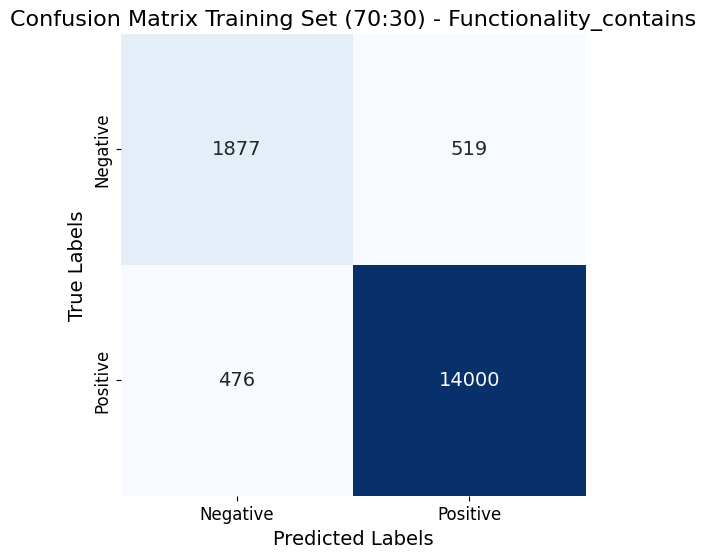


Jumlah True Negatives (TN): 685
Jumlah True Positives (TP): 5974
Jumlah False Negatives (FN): 236
Jumlah False Positives (FP): 363


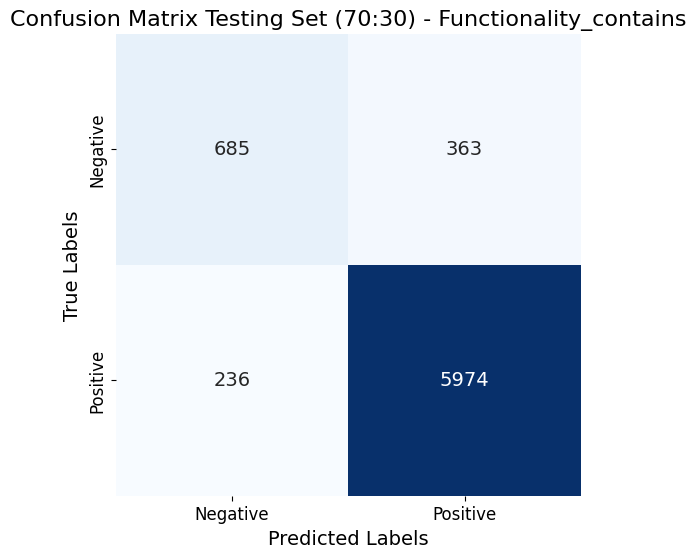

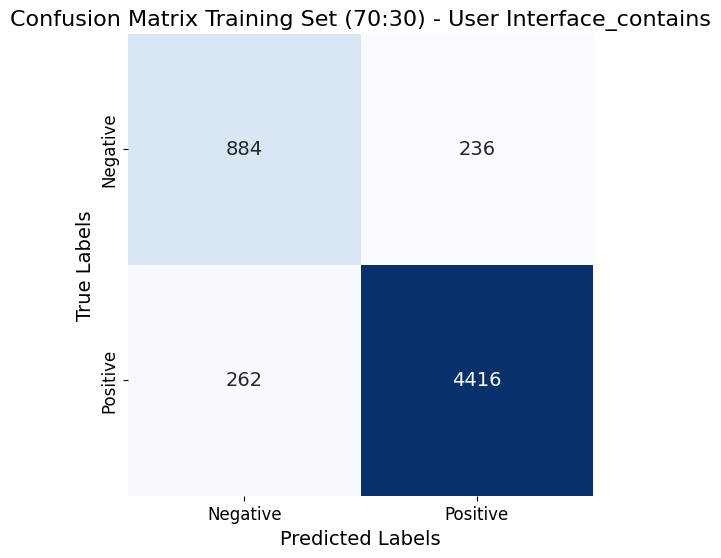


Jumlah True Negatives (TN): 327
Jumlah True Positives (TP): 1917
Jumlah False Negatives (FN): 140
Jumlah False Positives (FP): 151


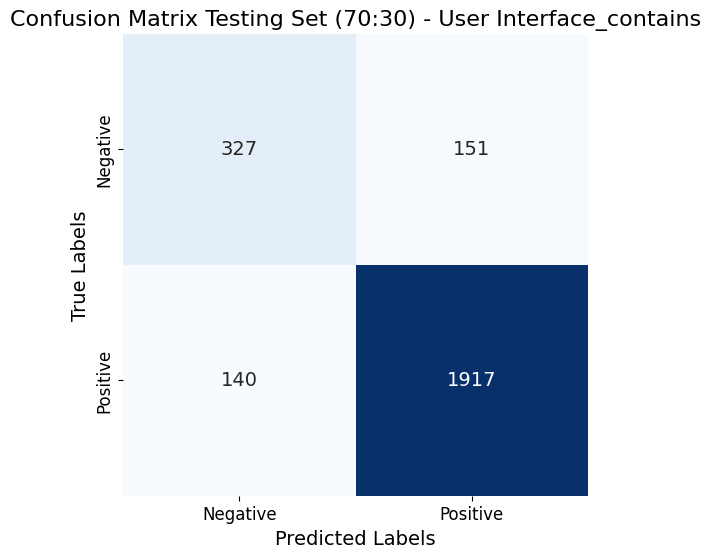

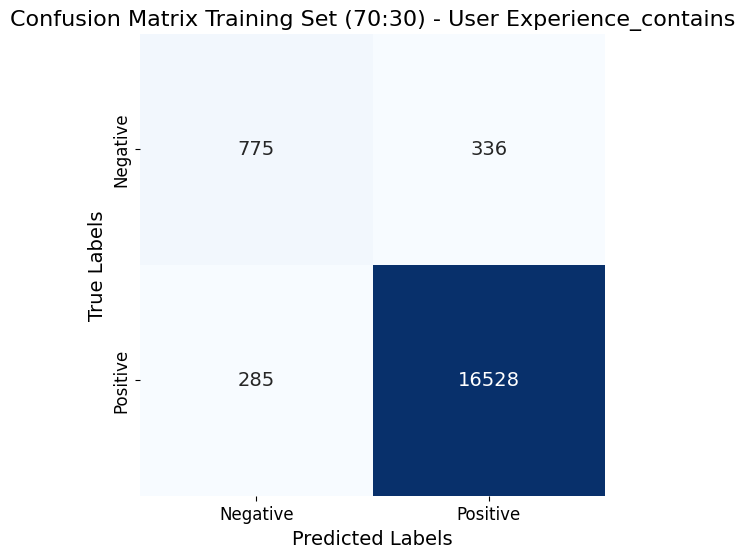


Jumlah True Negatives (TN): 287
Jumlah True Positives (TP): 6889
Jumlah False Negatives (FN): 111
Jumlah False Positives (FP): 215


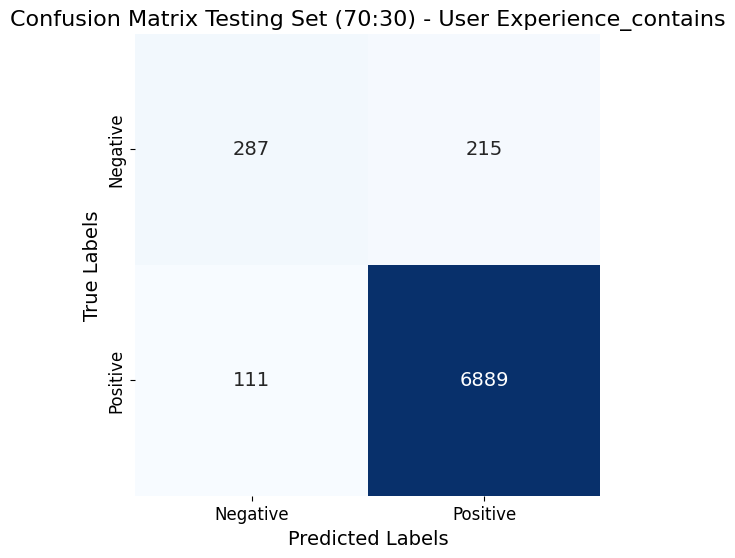

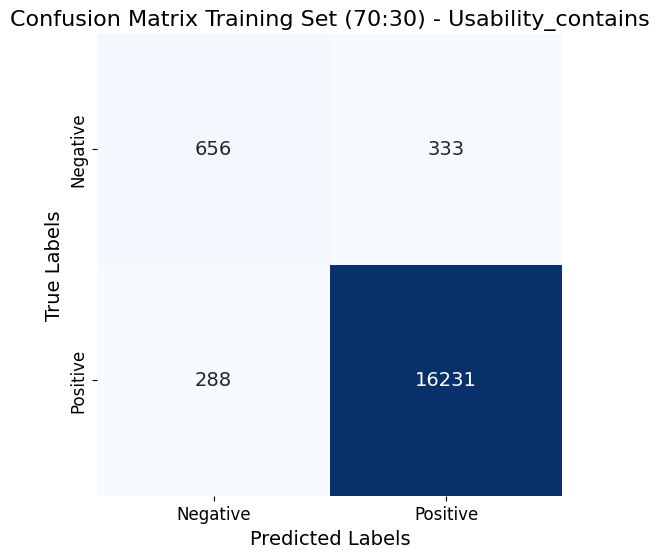


Jumlah True Negatives (TN): 240
Jumlah True Positives (TP): 6984
Jumlah False Negatives (FN): 87
Jumlah False Positives (FP): 211


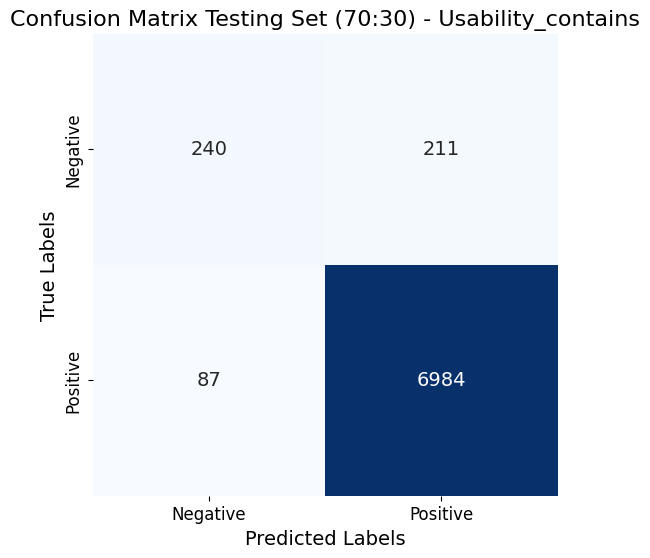

+--------------------------+----------------+---------------+--------------+----------------+----------------+------------------------+----------------------+-----------+
| Aspek                    |   Jumlah Train |   Jumlah Test | Split Data   |   True Positif |   True Negatif |   Jumlah Data Prediksi |   Jumlah Data Aktual |   Akurasi |
+==========================+================+===============+==============+================+================+========================+======================+===========+
| Functionality_contains   |          16872 |          7258 | Train        |          14000 |           1877 |                  15877 |                16872 |   94.1027 |
+--------------------------+----------------+---------------+--------------+----------------+----------------+------------------------+----------------------+-----------+
| Functionality_contains   |          16872 |          7258 | Test         |           5974 |            685 |                   6659 |          

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize confusion matrix plot function
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={"size": 14}, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Data initialization and processing
aspek_columns = ['Functionality_contains', 'User Interface_contains', 'User Experience_contains', 'Usability_contains']
results = []
table1_data = []

# Iterate through each aspect
for aspek in aspek_columns:
    # Split data into training and testing sets based on the ratio for each aspect
    rasio = 0.7  # Ratio for splitting data

    jumlah_true_train_aspek = sum(dataset_filtered[aspek].sample(frac=rasio, random_state=1))
    jumlah_true_test_aspek = sum(dataset_filtered[aspek]) - jumlah_true_train_aspek

    train_aspek = dataset_filtered[dataset_filtered[aspek]].sample(n=int(jumlah_true_train_aspek), random_state=1)
    test_aspek = dataset_filtered[dataset_filtered[aspek] & (~dataset_filtered.index.isin(train_aspek.index))]

    X_train_aspek = train_aspek['lemmatized_result'].tolist()
    y_train_aspek = train_aspek['sentimen_keseluruhan']
    X_test_aspek = test_aspek['lemmatized_result'].tolist()
    y_test_aspek = test_aspek['sentimen_keseluruhan']

    # Initialize CountVectorizer for this aspect inside the loop
    vectorizer_aspek = CountVectorizer()

    # Fit CountVectorizer on training data for this aspect
    X_train_aspek_transformed = vectorizer_aspek.fit_transform(X_train_aspek)

    # Transform both train and test data using the fitted vectorizer for this aspect
    X_test_aspek_transformed = vectorizer_aspek.transform(X_test_aspek)

    # Create and train Naive Bayes model for this aspect
    nb_model_aspek = MultinomialNB()
    nb_model_aspek.fit(X_train_aspek_transformed, y_train_aspek)

    # Predict on training and testing data
    y_train_aspek_pred = nb_model_aspek.predict(X_train_aspek_transformed)
    y_test_aspek_pred = nb_model_aspek.predict(X_test_aspek_transformed)

    # Calculate accuracy for training and testing data
    train_aspek_accuracy = accuracy_score(y_train_aspek, y_train_aspek_pred) * 100
    test_aspek_accuracy = accuracy_score(y_test_aspek, y_test_aspek_pred) * 100

    # Confusion matrix for training and testing data
    cm_train_aspek = confusion_matrix(y_train_aspek, y_train_aspek_pred)
    cm_test_aspek = confusion_matrix(y_test_aspek, y_test_aspek_pred)

    # Display confusion matrices for testing and training 70:30 split
    if rasio == 0.7:
        plot_confusion_matrix(cm_train_aspek, nb_model_aspek.classes_, f'Confusion Matrix Training Set (70:30) - {aspek}')
        print(f'\nJumlah True Negatives (TN): {cm_test_aspek[0, 0]}')
        print(f'Jumlah True Positives (TP): {cm_test_aspek[1, 1]}')
        print(f'Jumlah False Negatives (FN): {cm_test_aspek[1, 0]}')
        print(f'Jumlah False Positives (FP): {cm_test_aspek[0, 1]}')
        plot_confusion_matrix(cm_test_aspek, nb_model_aspek.classes_, f'Confusion Matrix Testing Set (70:30) - {aspek}')

    # Calculate precision, recall, and F-score for both classes
    precision_pos = precision_score(y_test_aspek, y_test_aspek_pred, pos_label='Positive')
    precision_neg = precision_score(y_test_aspek, y_test_aspek_pred, pos_label='Negative')

    recall_pos = recall_score(y_test_aspek, y_test_aspek_pred, pos_label='Positive')
    recall_neg = recall_score(y_test_aspek, y_test_aspek_pred, pos_label='Negative')

    f_score_pos = f1_score(y_test_aspek, y_test_aspek_pred, pos_label='Positive')
    f_score_neg = f1_score(y_test_aspek, y_test_aspek_pred, pos_label='Negative')

    # Append results for table 1
    results.append([
        aspek,
        len(train_aspek),
        len(test_aspek),
        "Train",
        cm_train_aspek[1, 1],  # True Positives Train (positive class)
        cm_train_aspek[0, 0],  # True Negatives Train (negative class)
        cm_train_aspek[1, 1] + cm_train_aspek[0, 0],
        len(y_train_aspek_pred),
        train_aspek_accuracy,
    ])

    results.append([
        aspek,
        len(train_aspek),
        len(test_aspek),
        "Test",
        cm_test_aspek[1, 1],  # True Positives Test (positive class)
        cm_test_aspek[0, 0],  # True Negatives Test (negative class)
        cm_test_aspek[1, 1] + cm_test_aspek[0, 0],
        len(y_test_aspek_pred),
        test_aspek_accuracy,
    ])

    # Append results for table 2
    table1_data.append([
        aspek,
        test_aspek_accuracy,
        f_score_pos,
        f_score_neg,
        precision_pos,
        precision_neg,
        recall_pos,
        recall_neg
    ])

# Display results for table 1
print(tabulate(results, headers=["Aspek", "Jumlah Train", "Jumlah Test", "Split Data", "True Positif", "True Negatif", "Jumlah Data Prediksi", "Jumlah Data Aktual", "Akurasi"], tablefmt='grid'))

# Display results for table 2
headers_table2 = ["Aspek", "Akurasi", "F score +", "F score -", "Precision +", "Precision -", "Recall +", "Recall -"]
print(tabulate(table1_data, headers=headers_table2, tablefmt='grid'))

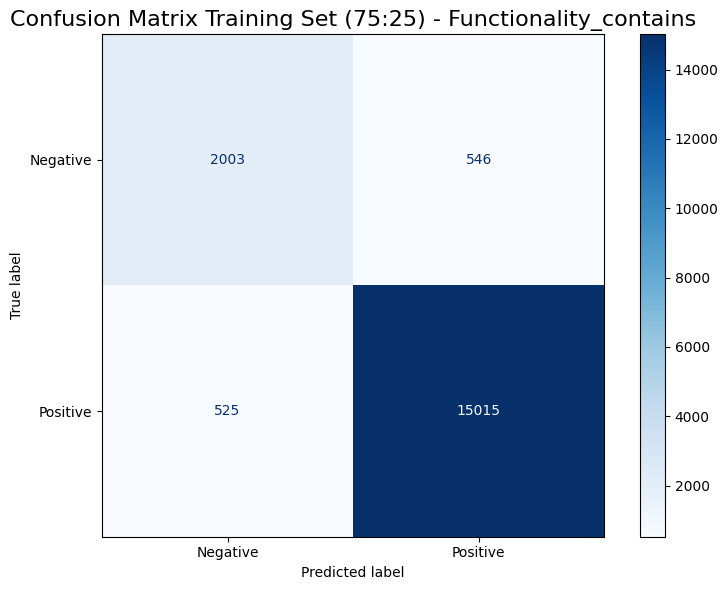

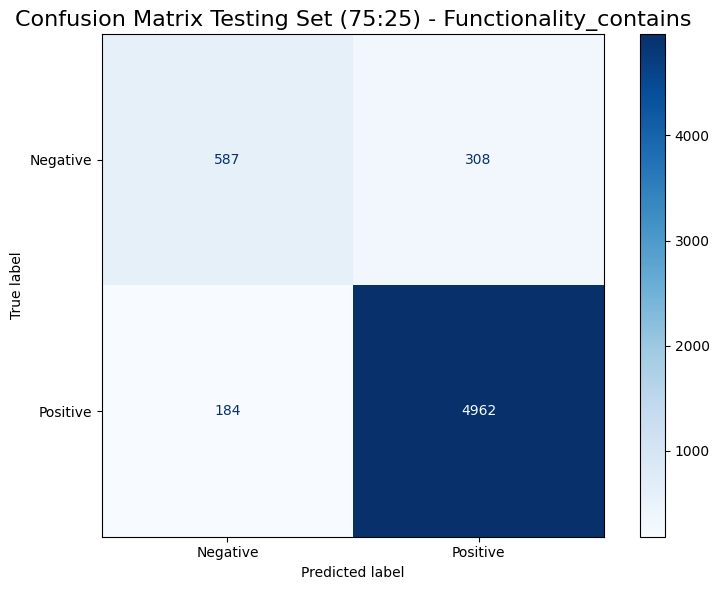

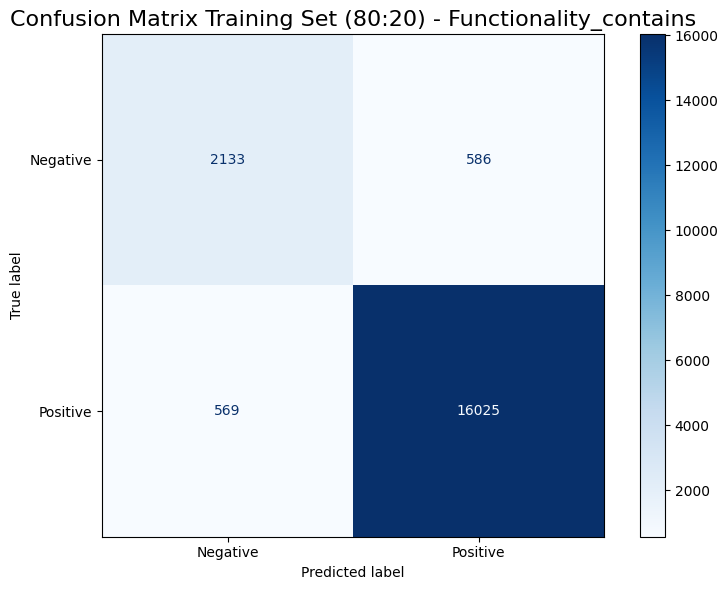

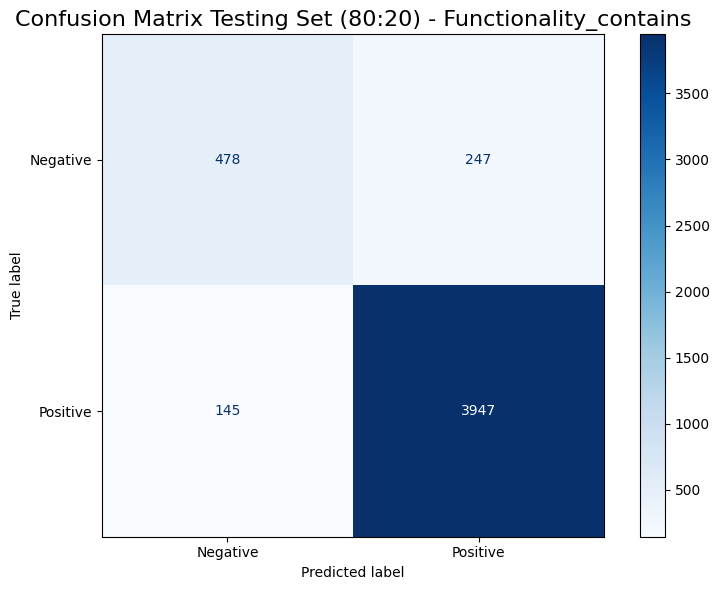

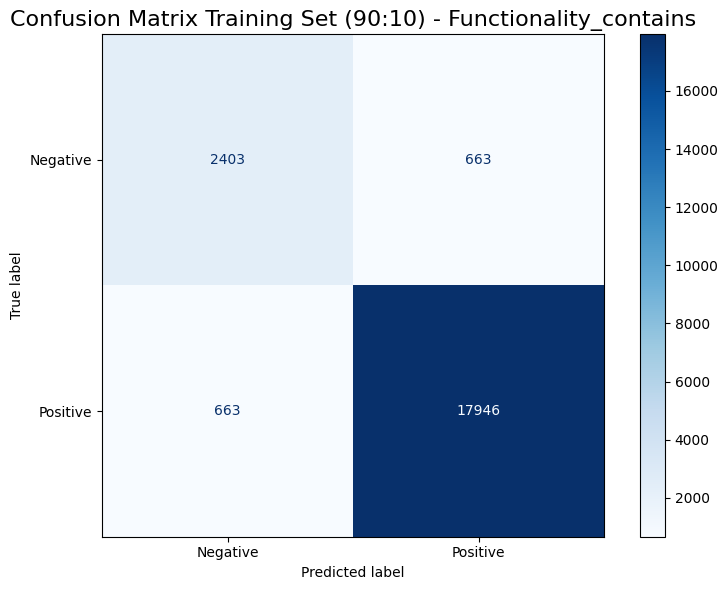

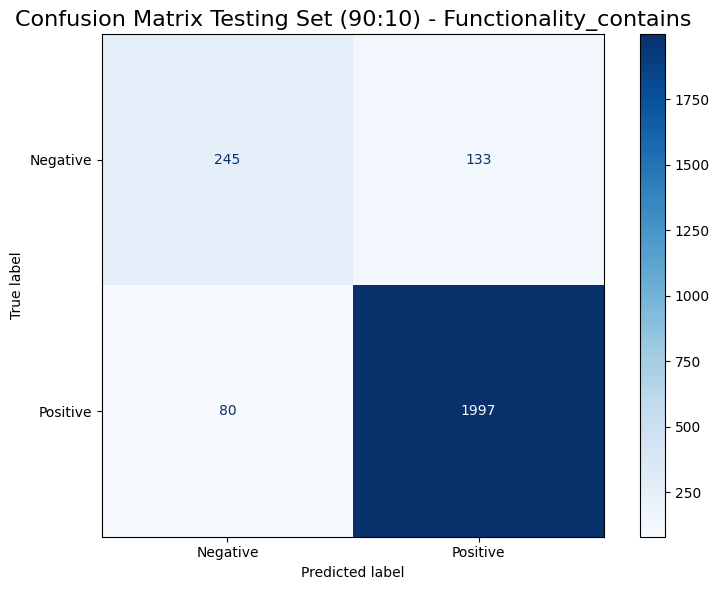

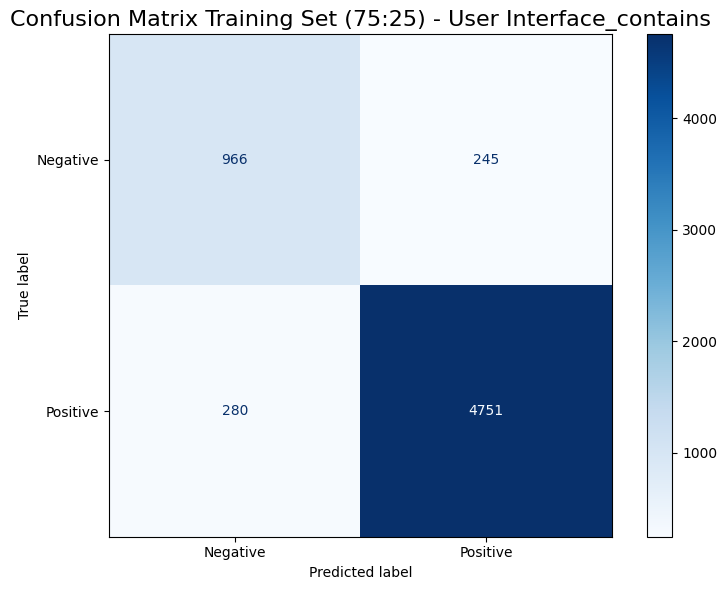

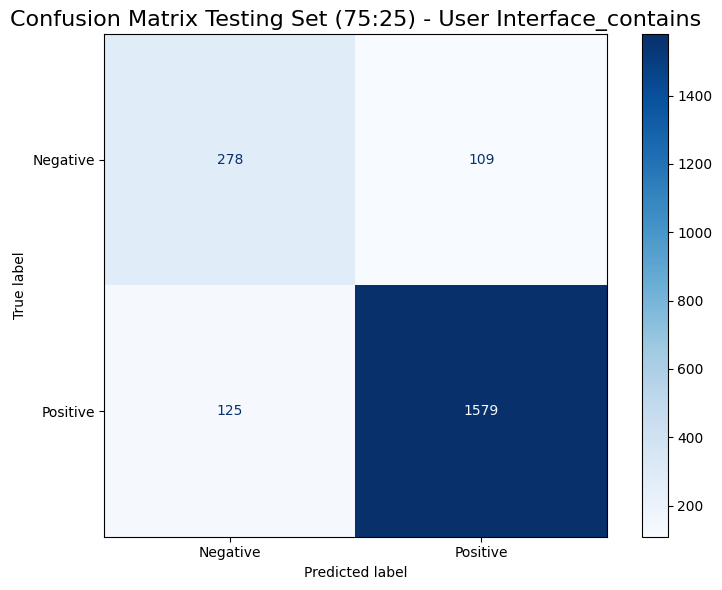

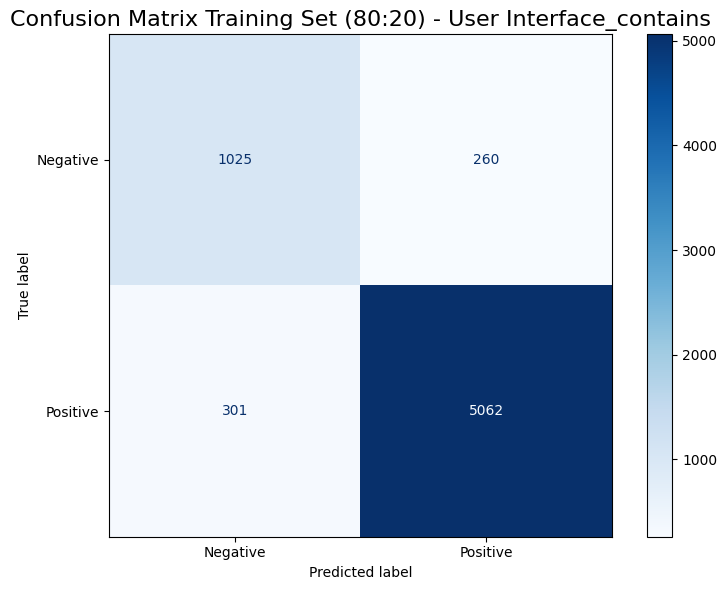

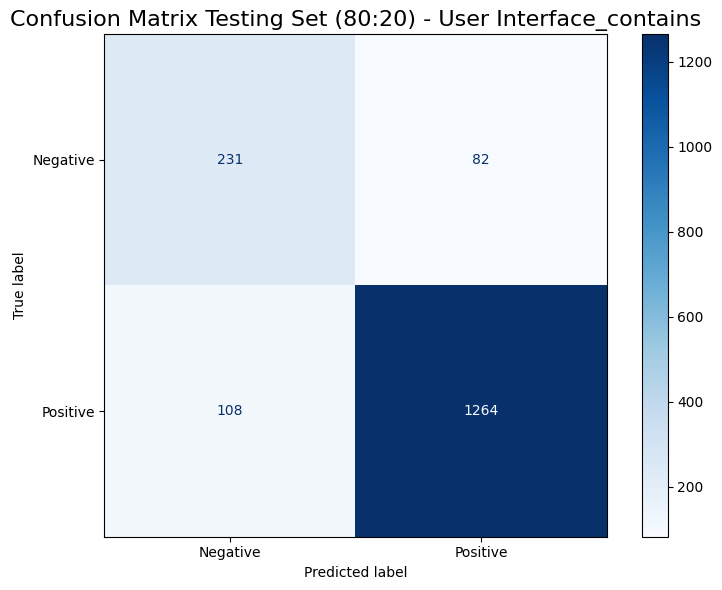

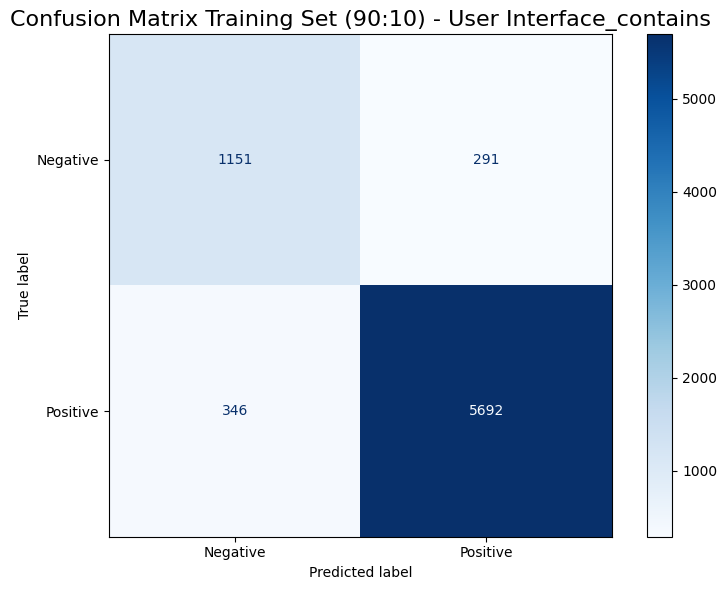

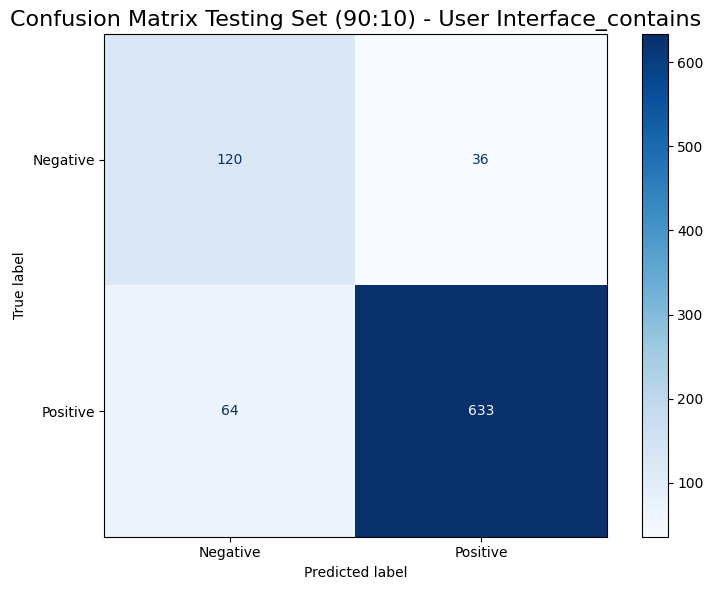

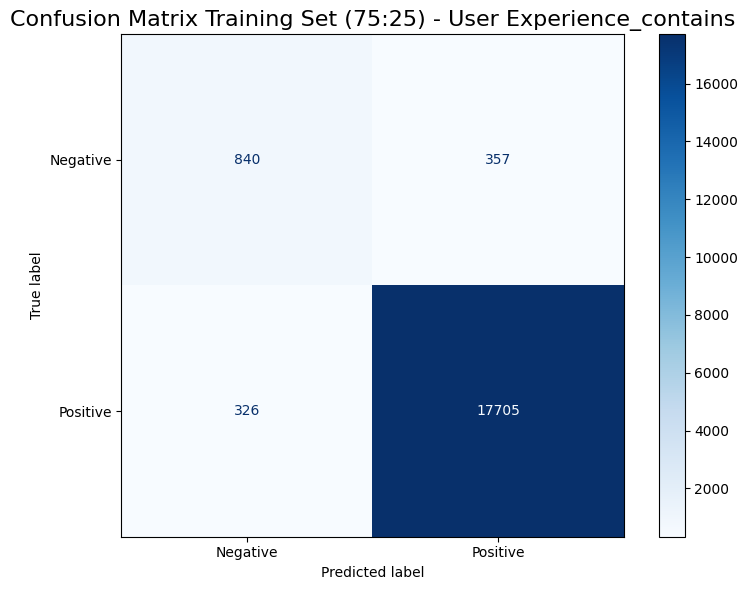

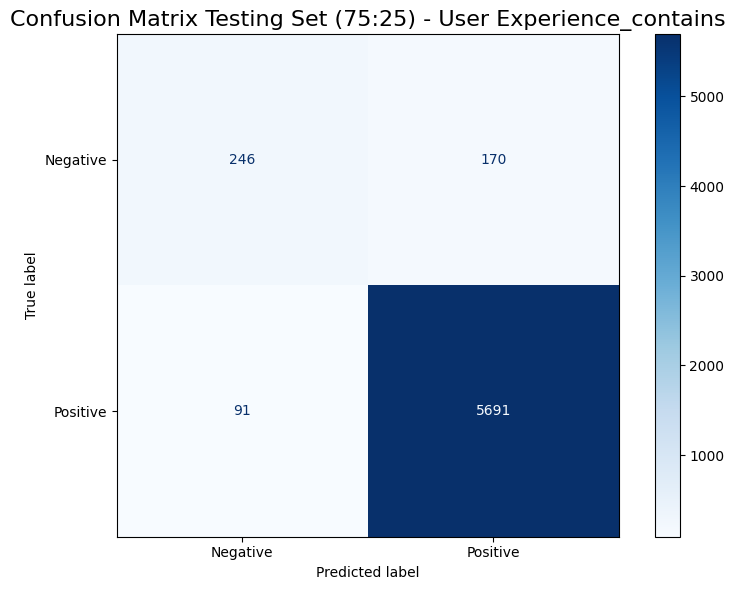

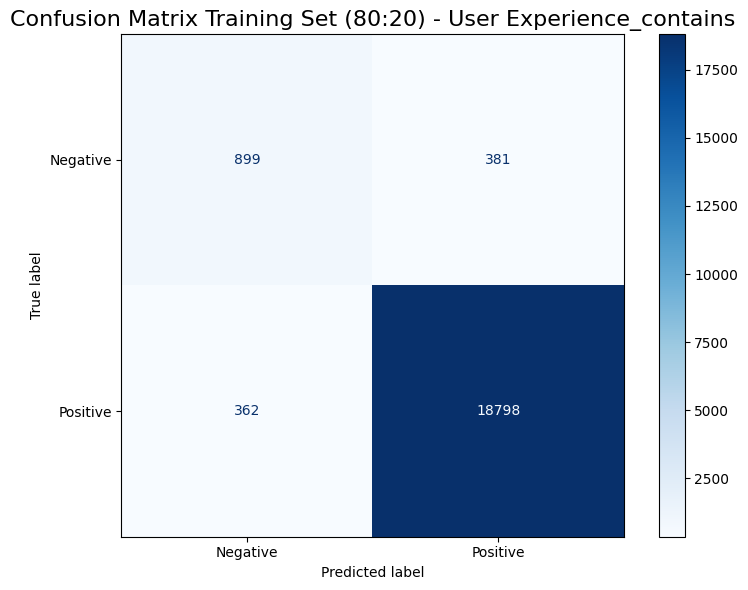

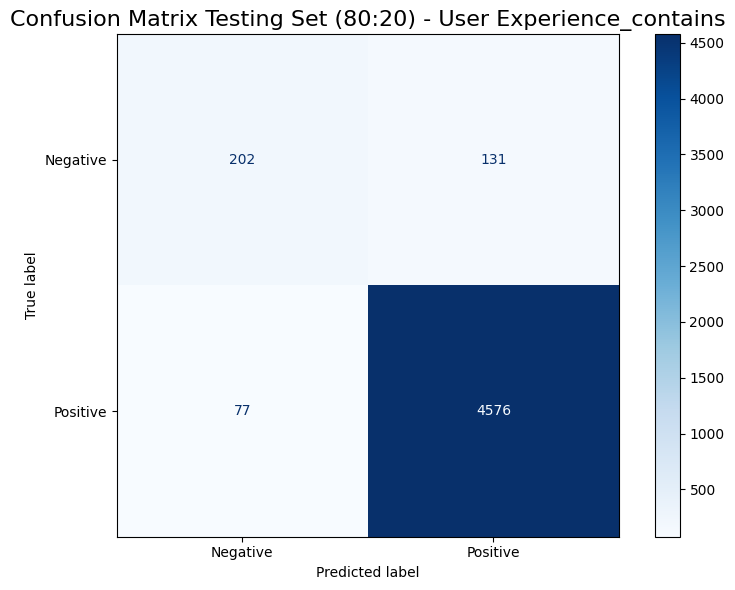

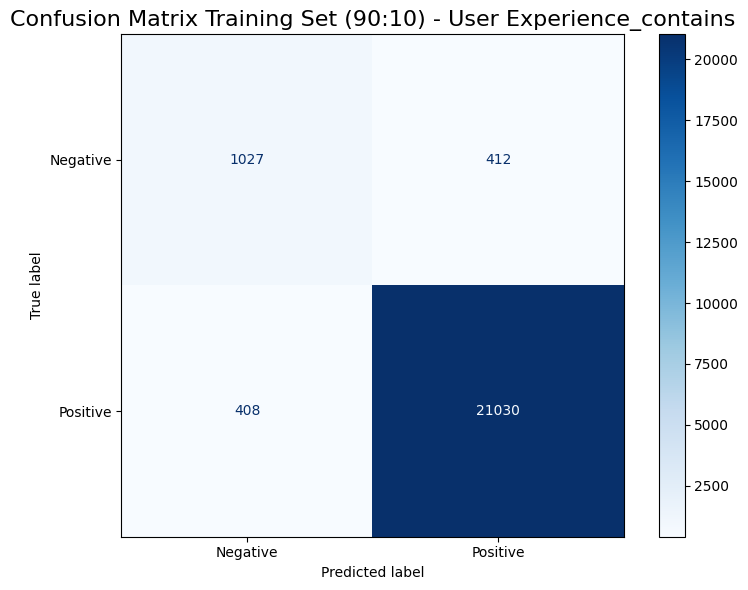

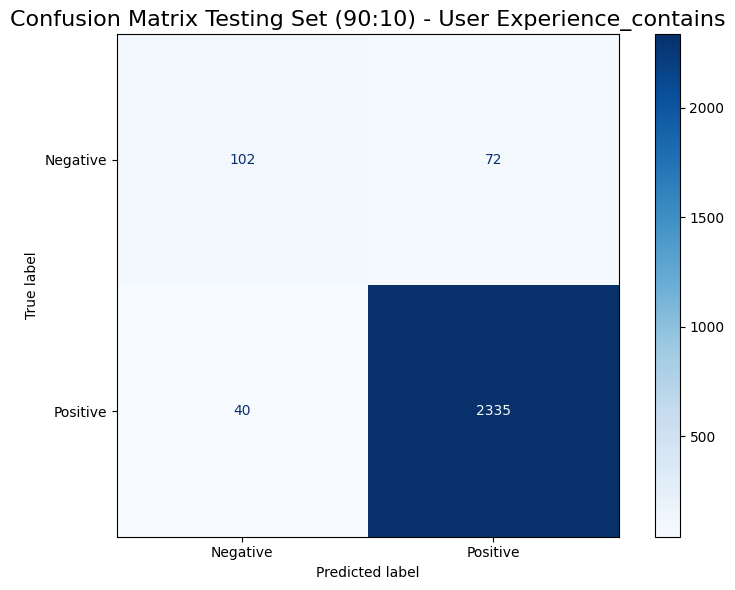

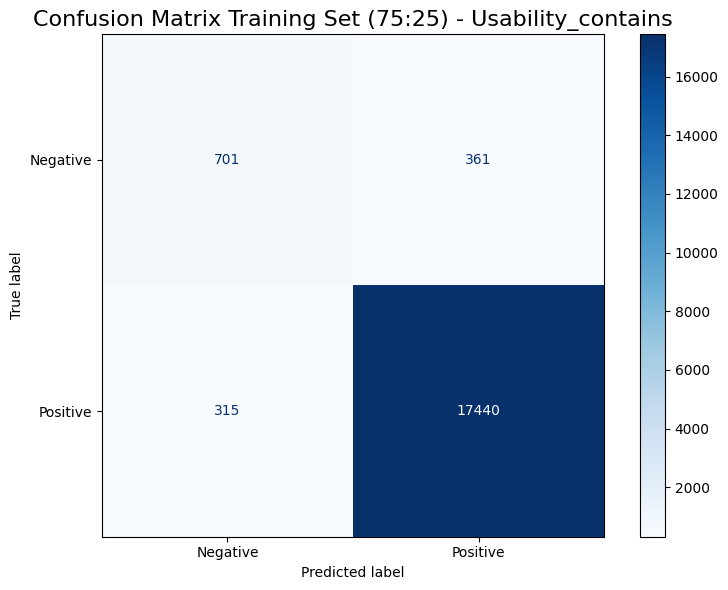

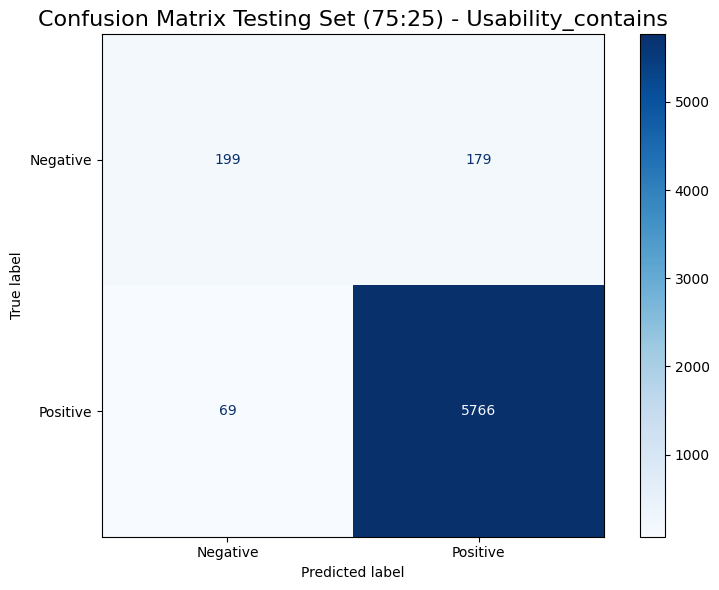

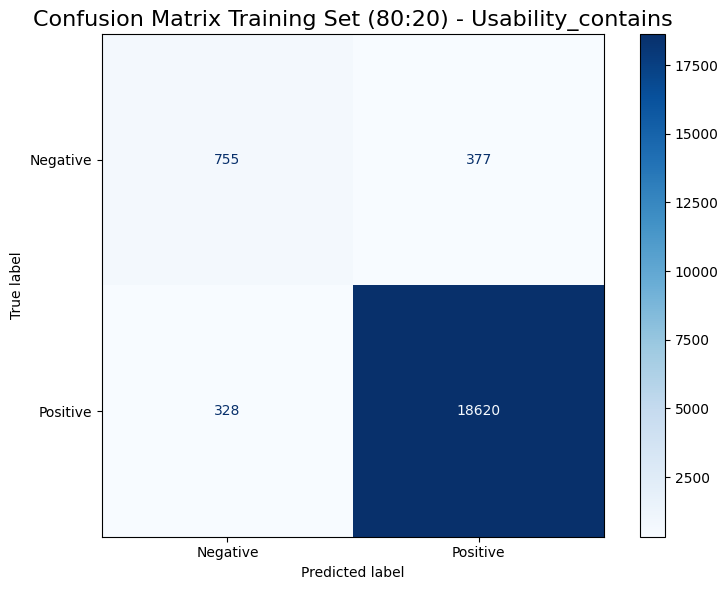

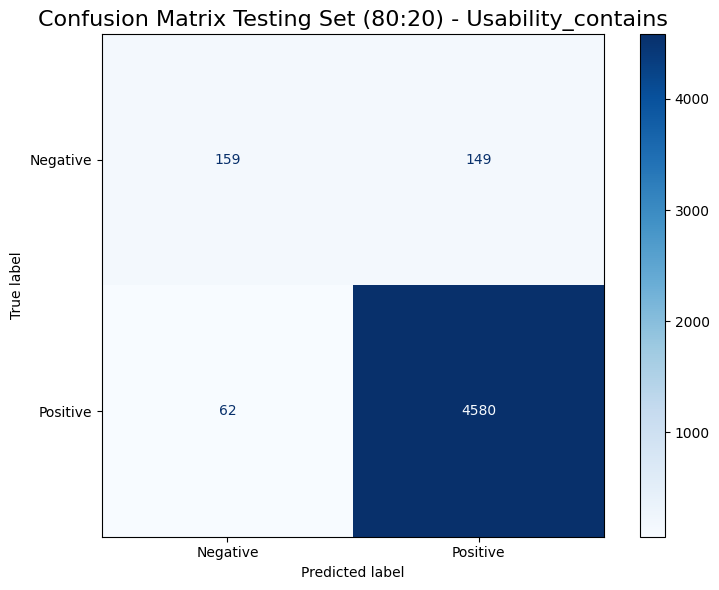

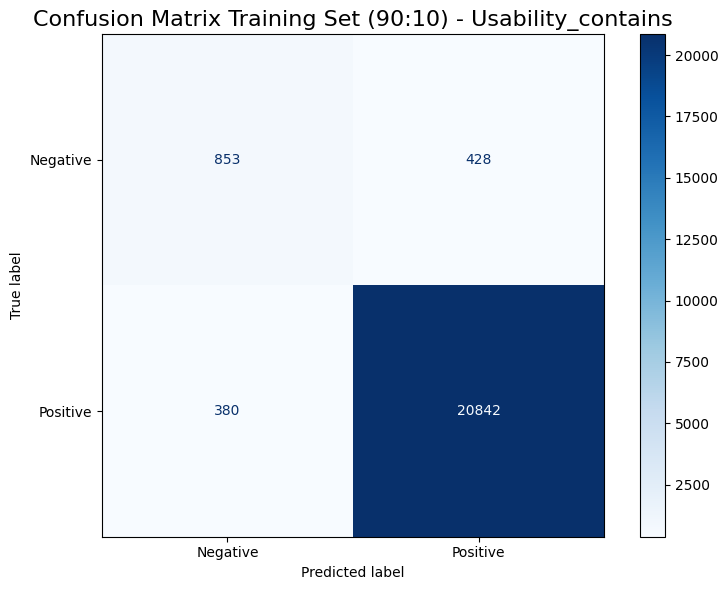

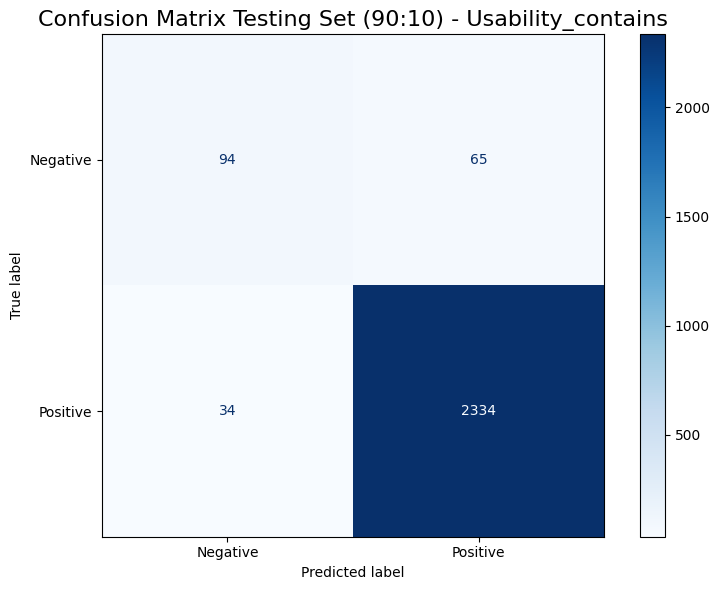

+---------+--------------------------+--------------+----------------+----------------+------------------------+----------------------+-----------+
| Rasio   | Aspek                    | Split Data   |   True Positif |   True Negatif |   Jumlah Data Prediksi |   Jumlah Data Aktual |   Akurasi |
+=========+==========================+==============+================+================+========================+======================+===========+
| 75:25   | Functionality_contains   | Train        |          15015 |           2003 |                  17018 |                18089 |   94.0793 |
+---------+--------------------------+--------------+----------------+----------------+------------------------+----------------------+-----------+
| 75:25   | Functionality_contains   | Test         |           4962 |            587 |                   5549 |                 6041 |   91.8557 |
+---------+--------------------------+--------------+----------------+----------------+------------------------+

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize confusion matrix plot function with ConfusionMatrixDisplay
def plot_confusion_matrix(cm, classes, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figsize as needed
    disp.plot(ax=ax, cmap='Blues', xticks_rotation='horizontal')
    ax.set_title(title, fontsize=16)
    plt.tight_layout()  # Ensures labels are not cut off
    plt.show()

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Data initialization and processing
aspek_columns = ['Functionality_contains', 'User Interface_contains', 'User Experience_contains', 'Usability_contains']
results = []
table1_data = []

# Iterate through each aspect
for aspek in aspek_columns:
    # Split data into training and testing sets based on the ratio for each aspect
    rasios = [0.75, 0.8, 0.9]  # Ratios for splitting data

    for rasio in rasios:
        jumlah_true_train_aspek = sum(dataset_filtered[aspek].sample(frac=rasio, random_state=1))
        jumlah_true_test_aspek = sum(dataset_filtered[aspek]) - jumlah_true_train_aspek

        train_aspek = dataset_filtered[dataset_filtered[aspek]].sample(n=int(jumlah_true_train_aspek), random_state=1)
        test_aspek = dataset_filtered[dataset_filtered[aspek] & (~dataset_filtered.index.isin(train_aspek.index))]

        X_train_aspek = train_aspek['lemmatized_result'].tolist()
        y_train_aspek = train_aspek['sentimen_keseluruhan']
        X_test_aspek = test_aspek['lemmatized_result'].tolist()
        y_test_aspek = test_aspek['sentimen_keseluruhan']

        # Initialize CountVectorizer for this aspect inside the loop
        vectorizer_aspek = CountVectorizer()

        # Fit CountVectorizer on training data for this aspect
        X_train_aspek_transformed = vectorizer_aspek.fit_transform(X_train_aspek)

        # Transform both train and test data using the fitted vectorizer for this aspect
        X_test_aspek_transformed = vectorizer_aspek.transform(X_test_aspek)

        # Create and train Naive Bayes model for this aspect
        nb_model_aspek = MultinomialNB()
        nb_model_aspek.fit(X_train_aspek_transformed, y_train_aspek)

        # Predict on training and testing data
        y_train_aspek_pred = nb_model_aspek.predict(X_train_aspek_transformed)
        y_test_aspek_pred = nb_model_aspek.predict(X_test_aspek_transformed)

        # Calculate accuracy for training and testing data
        train_aspek_accuracy = accuracy_score(y_train_aspek, y_train_aspek_pred) * 100
        test_aspek_accuracy = accuracy_score(y_test_aspek, y_test_aspek_pred) * 100

        # Confusion matrix for training and testing data
        cm_train_aspek = confusion_matrix(y_train_aspek, y_train_aspek_pred)
        cm_test_aspek = confusion_matrix(y_test_aspek, y_test_aspek_pred)

        # Display confusion matrices for testing and training split
        if rasio == 0.75:
            plot_confusion_matrix(cm_train_aspek, nb_model_aspek.classes_, f'Confusion Matrix Training Set (75:25) - {aspek}')
            plot_confusion_matrix(cm_test_aspek, nb_model_aspek.classes_, f'Confusion Matrix Testing Set (75:25) - {aspek}')

        elif rasio == 0.8:
            plot_confusion_matrix(cm_train_aspek, nb_model_aspek.classes_, f'Confusion Matrix Training Set (80:20) - {aspek}')
            plot_confusion_matrix(cm_test_aspek, nb_model_aspek.classes_, f'Confusion Matrix Testing Set (80:20) - {aspek}')

        elif rasio == 0.9:
            plot_confusion_matrix(cm_train_aspek, nb_model_aspek.classes_, f'Confusion Matrix Training Set (90:10) - {aspek}')
            plot_confusion_matrix(cm_test_aspek, nb_model_aspek.classes_, f'Confusion Matrix Testing Set (90:10) - {aspek}')

        # Calculate precision, recall, and F-score for both classes
        precision_pos = precision_score(y_test_aspek, y_test_aspek_pred, pos_label='Positive')
        precision_neg = precision_score(y_test_aspek, y_test_aspek_pred, pos_label='Negative')

        recall_pos = recall_score(y_test_aspek, y_test_aspek_pred, pos_label='Positive')
        recall_neg = recall_score(y_test_aspek, y_test_aspek_pred, pos_label='Negative')

        f_score_pos = f1_score(y_test_aspek, y_test_aspek_pred, pos_label='Positive')
        f_score_neg = f1_score(y_test_aspek, y_test_aspek_pred, pos_label='Negative')

        # Append results for table 1
        results.append([
            f"{int(rasio*100)}:{int((1-rasio)*100)}",
            aspek,
            "Train",
            cm_train_aspek[1, 1],  # True Positives Train (positive class)
            cm_train_aspek[0, 0],  # True Negatives Train (negative class)
            cm_train_aspek[1, 1] + cm_train_aspek[0, 0],
            len(y_train_aspek_pred),
            train_aspek_accuracy,
        ])

        results.append([
            f"{int(rasio*100)}:{int((1-rasio)*100)}",
            aspek,
            "Test",
            cm_test_aspek[1, 1],  # True Positives Test (positive class)
            cm_test_aspek[0, 0],  # True Negatives Test (negative class)
            cm_test_aspek[1, 1] + cm_test_aspek[0, 0],
            len(y_test_aspek_pred),
            test_aspek_accuracy,
        ])

        # Append results for table 2
        table1_data.append([
            f"{int(rasio*100)}:{int((1-rasio)*100)}",
            aspek,
            test_aspek_accuracy,
            f_score_pos,
            f_score_neg,
            precision_pos,
            precision_neg,
            recall_pos,
            recall_neg
        ])

# Display results for table 1
headers_table1 = ["Rasio", "Aspek", "Split Data", "True Positif", "True Negatif", "Jumlah Data Prediksi","Jumlah Data Aktual","Akurasi"]
print(tabulate(results, headers=headers_table1, tablefmt='grid'))

# Display results for table 2
headers_table2 = ["Rasio", "Aspek", "Akurasi", "F score +", "F score -", "Precision +", "Precision -", "Recall +", "Recall -"]
print(tabulate(table1_data, headers=headers_table2, tablefmt='grid'))



Aspect: Functionality_contains, Ratio: 75:25
Avg Accuracy: 92.16%
Avg Precision (Positive): 0.95
Avg Precision (Negative): 0.74
Avg Recall (Positive): 0.96
Avg Recall (Negative): 0.69
Avg F1-score (Positive): 0.95
Avg F1-score (Negative): 0.71


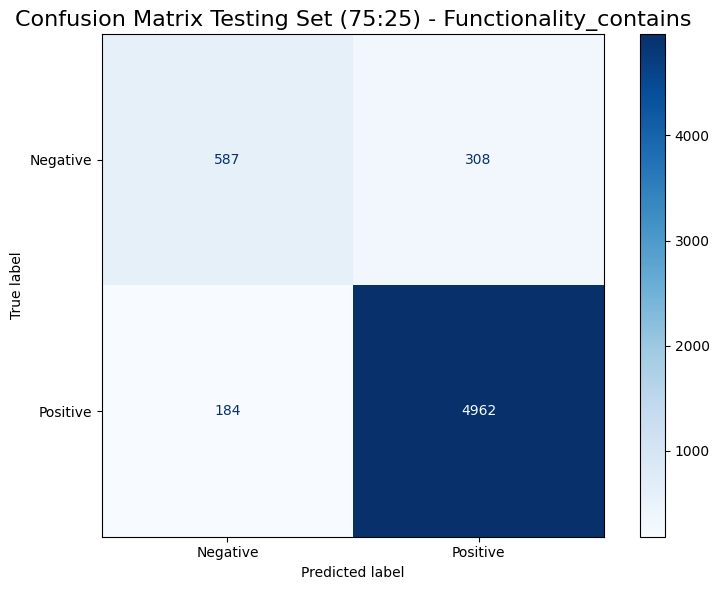


Aspect: Functionality_contains, Ratio: 80:19
Avg Accuracy: 92.11%
Avg Precision (Positive): 0.95
Avg Precision (Negative): 0.73
Avg Recall (Positive): 0.96
Avg Recall (Negative): 0.70
Avg F1-score (Positive): 0.95
Avg F1-score (Negative): 0.71


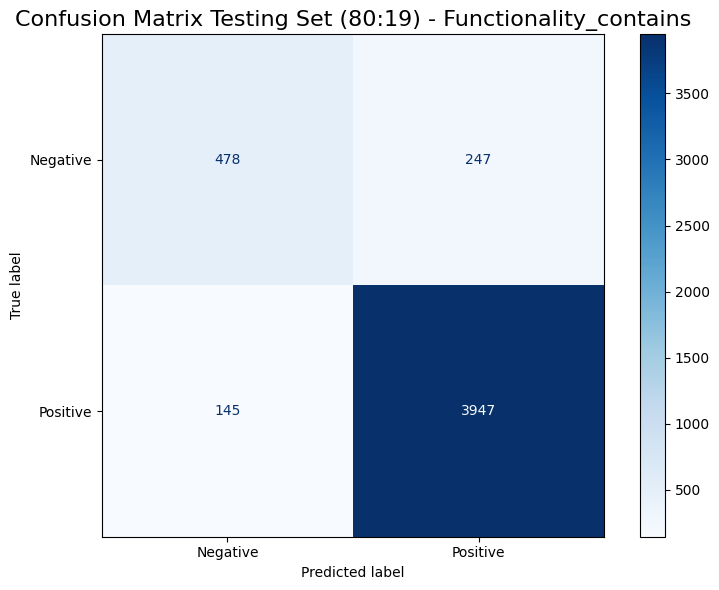


Aspect: Functionality_contains, Ratio: 90:9
Avg Accuracy: 92.26%
Avg Precision (Positive): 0.95
Avg Precision (Negative): 0.73
Avg Recall (Positive): 0.96
Avg Recall (Negative): 0.72
Avg F1-score (Positive): 0.95
Avg F1-score (Negative): 0.73


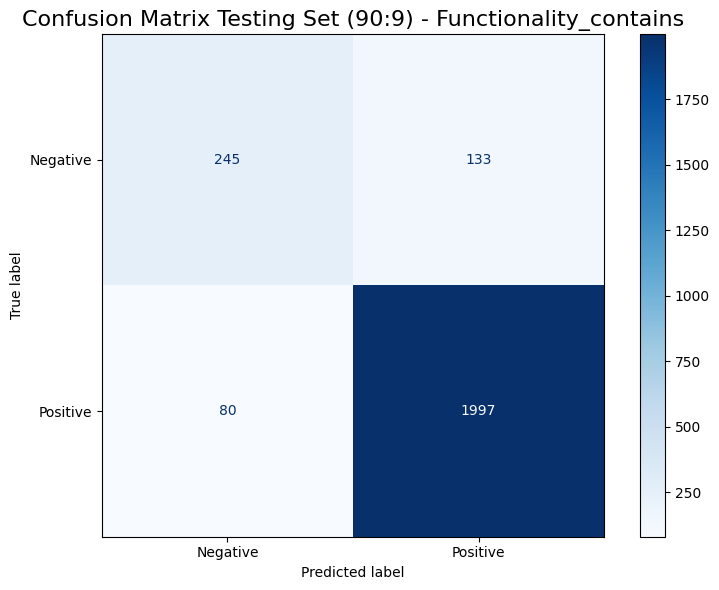


Aspect: User Interface_contains, Ratio: 75:25
Avg Accuracy: 87.60%
Avg Precision (Positive): 0.92
Avg Precision (Negative): 0.69
Avg Recall (Positive): 0.93
Avg Recall (Negative): 0.66
Avg F1-score (Positive): 0.92
Avg F1-score (Negative): 0.67


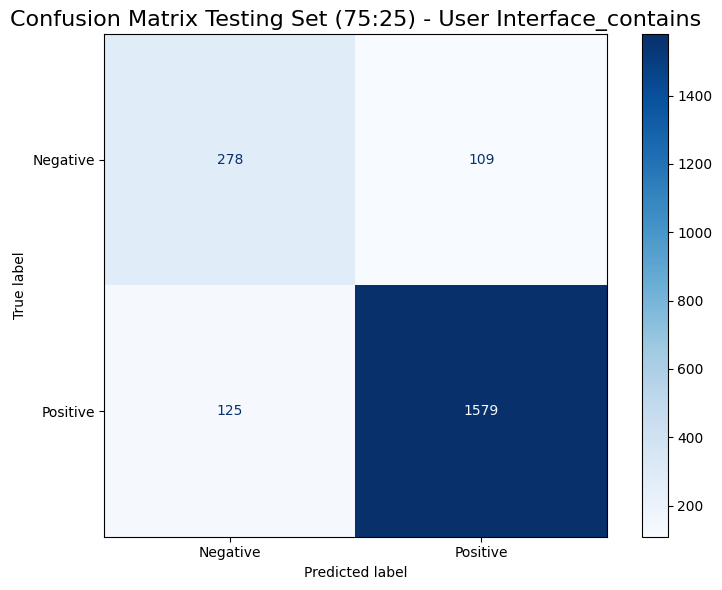


Aspect: User Interface_contains, Ratio: 80:19
Avg Accuracy: 88.15%
Avg Precision (Positive): 0.92
Avg Precision (Negative): 0.70
Avg Recall (Positive): 0.93
Avg Recall (Negative): 0.68
Avg F1-score (Positive): 0.93
Avg F1-score (Negative): 0.69


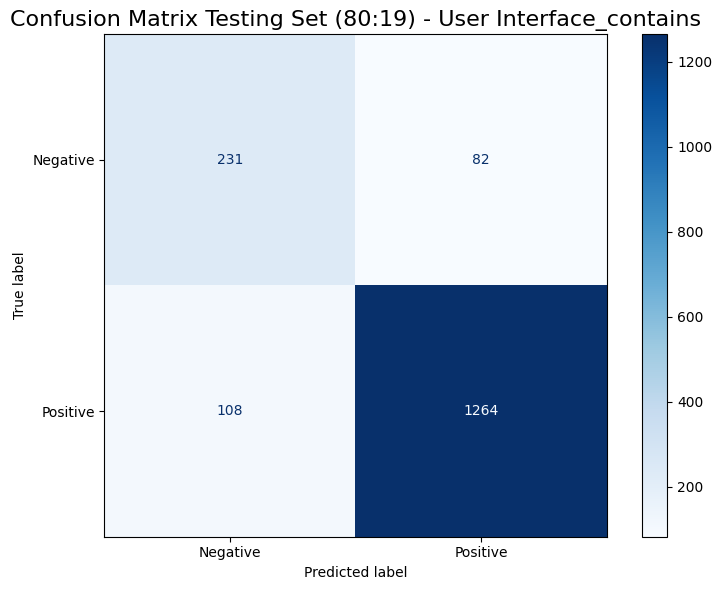


Aspect: User Interface_contains, Ratio: 90:9
Avg Accuracy: 88.49%
Avg Precision (Positive): 0.93
Avg Precision (Negative): 0.70
Avg Recall (Positive): 0.93
Avg Recall (Negative): 0.71
Avg F1-score (Positive): 0.93
Avg F1-score (Negative): 0.70


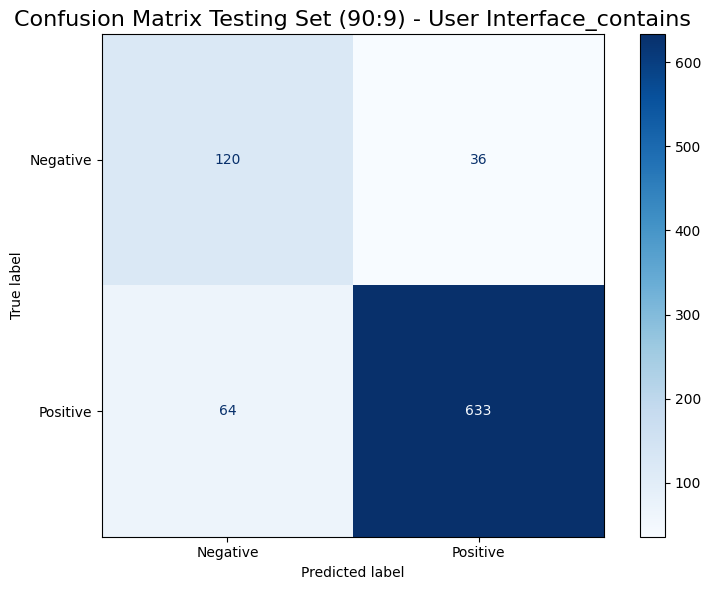


Aspect: User Experience_contains, Ratio: 75:25
Avg Accuracy: 95.19%
Avg Precision (Positive): 0.97
Avg Precision (Negative): 0.63
Avg Recall (Positive): 0.98
Avg Recall (Negative): 0.54
Avg F1-score (Positive): 0.97
Avg F1-score (Negative): 0.58


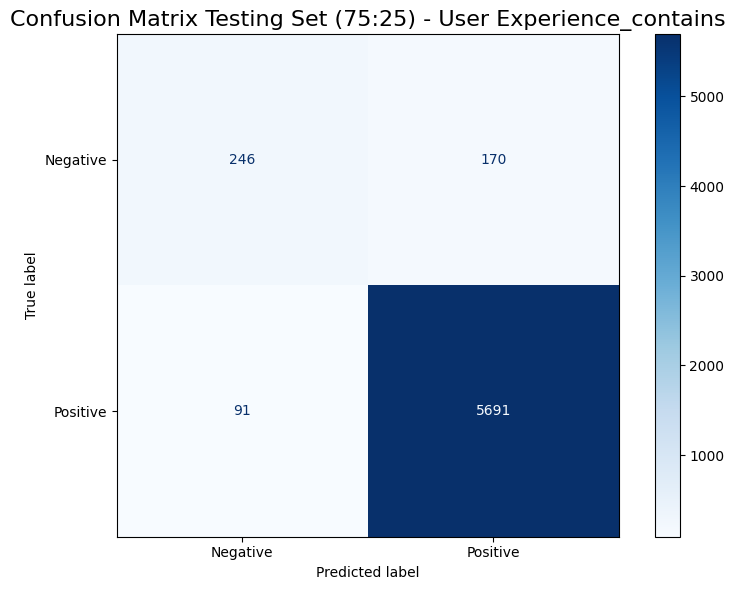


Aspect: User Experience_contains, Ratio: 80:19
Avg Accuracy: 95.22%
Avg Precision (Positive): 0.97
Avg Precision (Negative): 0.63
Avg Recall (Positive): 0.98
Avg Recall (Negative): 0.58
Avg F1-score (Positive): 0.97
Avg F1-score (Negative): 0.60


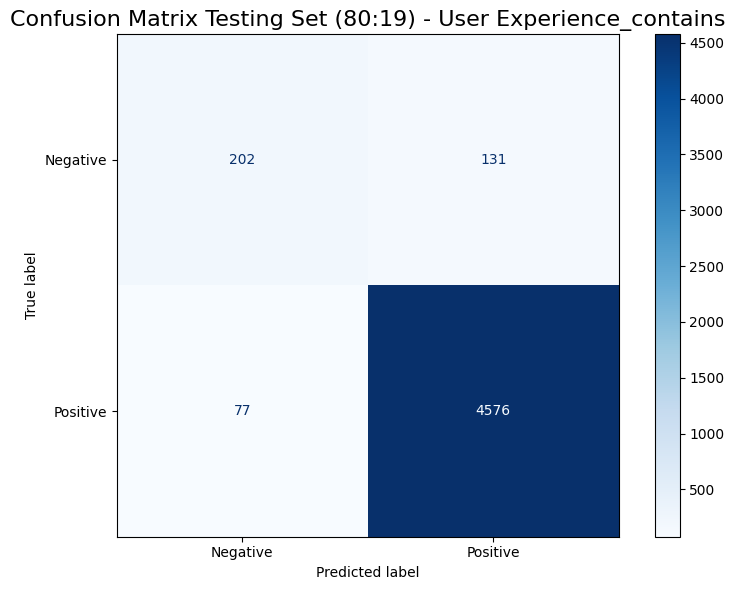


Aspect: User Experience_contains, Ratio: 90:9
Avg Accuracy: 95.25%
Avg Precision (Positive): 0.97
Avg Precision (Negative): 0.62
Avg Recall (Positive): 0.98
Avg Recall (Negative): 0.62
Avg F1-score (Positive): 0.97
Avg F1-score (Negative): 0.62


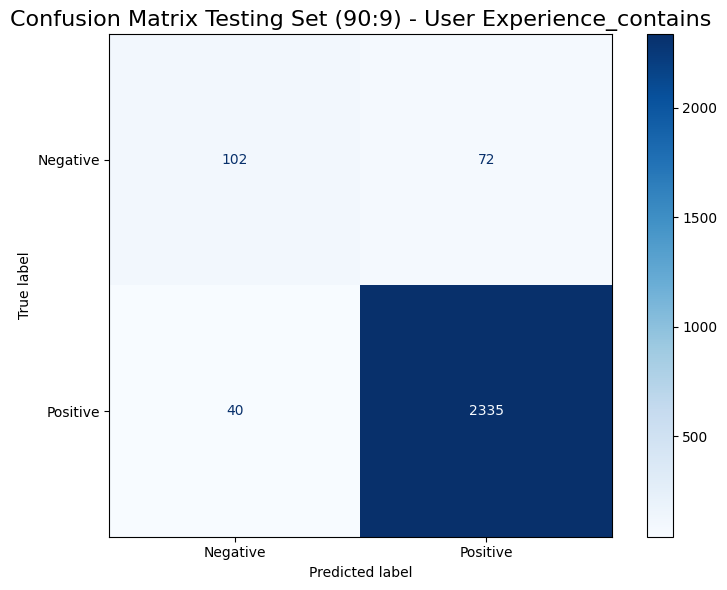


Aspect: Usability_contains, Ratio: 75:25
Avg Accuracy: 95.28%
Avg Precision (Positive): 0.97
Avg Precision (Negative): 0.59
Avg Recall (Positive): 0.98
Avg Recall (Negative): 0.53
Avg F1-score (Positive): 0.98
Avg F1-score (Negative): 0.56


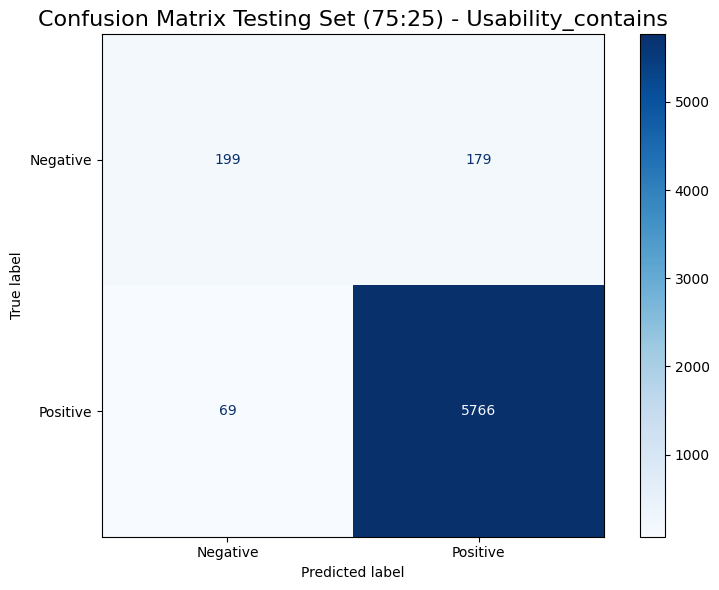


Aspect: Usability_contains, Ratio: 80:19
Avg Accuracy: 95.32%
Avg Precision (Positive): 0.97
Avg Precision (Negative): 0.59
Avg Recall (Positive): 0.98
Avg Recall (Negative): 0.55
Avg F1-score (Positive): 0.98
Avg F1-score (Negative): 0.57


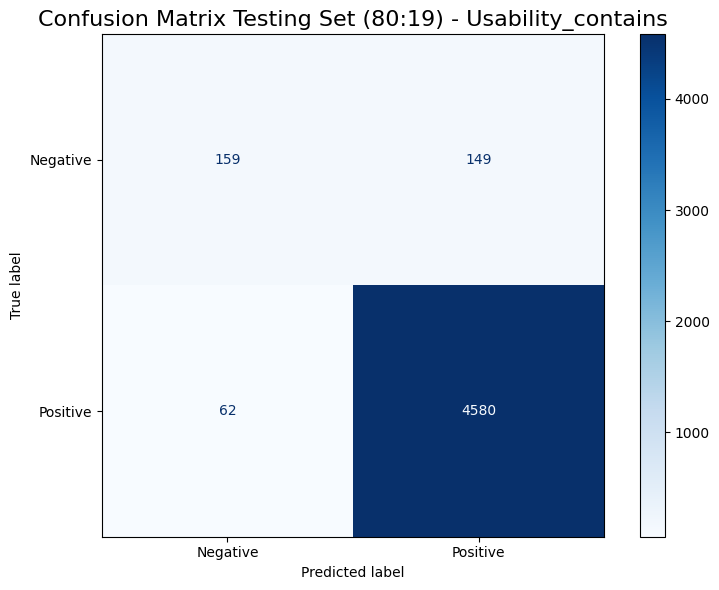


Aspect: Usability_contains, Ratio: 90:9
Avg Accuracy: 95.45%
Avg Precision (Positive): 0.97
Avg Precision (Negative): 0.61
Avg Recall (Positive): 0.98
Avg Recall (Negative): 0.58
Avg F1-score (Positive): 0.98
Avg F1-score (Negative): 0.59


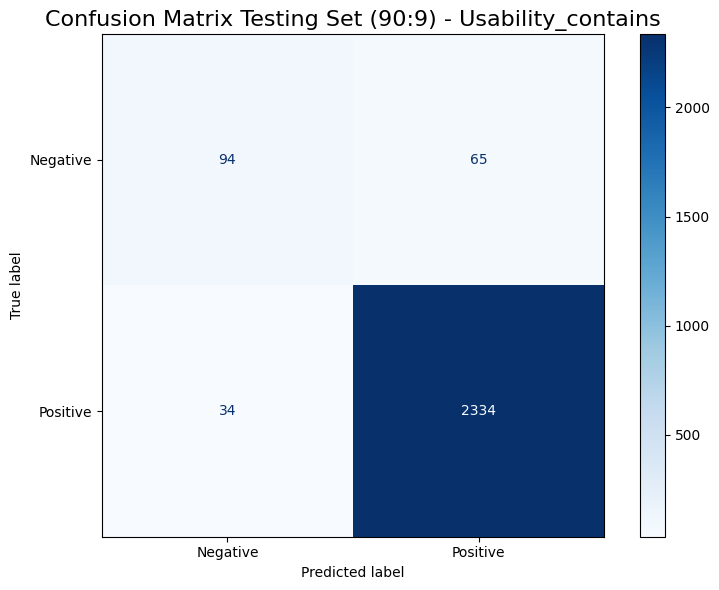

+---------+--------------------------+--------------+----------------+----------------+------------------------+----------------------+-----------+
| Rasio   | Aspek                    | Split Data   |   True Positif |   True Negatif |   Jumlah Data Prediksi |   Jumlah Data Aktual |   Akurasi |
+=========+==========================+==============+================+================+========================+======================+===========+
| 75:25   | Functionality_contains   | Train        |          20842 |            853 |                  21695 |                22503 |   96.4094 |
+---------+--------------------------+--------------+----------------+----------------+------------------------+----------------------+-----------+
| 75:25   | Functionality_contains   | Test         |           4962 |            587 |                   5549 |                 6041 |   96.0823 |
+---------+--------------------------+--------------+----------------+----------------+------------------------+

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, f1_score
from sklearn.model_selection import KFold
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize confusion matrix plot function with ConfusionMatrixDisplay
def plot_confusion_matrix(cm, classes, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figsize as needed
    disp.plot(ax=ax, cmap='Blues', xticks_rotation='horizontal')
    ax.set_title(title, fontsize=16)
    plt.tight_layout()  # Ensures labels are not cut off
    plt.show()

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Data initialization and processing
aspek_columns = ['Functionality_contains', 'User Interface_contains', 'User Experience_contains', 'Usability_contains']
results = []
table1_data = []

# Iterate through each aspect
for aspek in aspek_columns:
    # Split data into training and testing sets based on the ratio for each aspect
    rasios = [0.75, 0.8, 0.9]  # Ratios for splitting data

    for rasio in rasios:
        jumlah_true_train_aspek = sum(dataset_filtered[aspek].sample(frac=rasio, random_state=1))
        jumlah_true_test_aspek = sum(dataset_filtered[aspek]) - jumlah_true_train_aspek

        train_aspek = dataset_filtered[dataset_filtered[aspek]].sample(n=int(jumlah_true_train_aspek), random_state=1)
        test_aspek = dataset_filtered[dataset_filtered[aspek] & (~dataset_filtered.index.isin(train_aspek.index))]

        X_train_aspek = train_aspek['lemmatized_result'].tolist()
        y_train_aspek = train_aspek['sentimen_keseluruhan']
        X_test_aspek = test_aspek['lemmatized_result'].tolist()
        y_test_aspek = test_aspek['sentimen_keseluruhan']

        # Initialize CountVectorizer for this aspect inside the loop
        vectorizer_aspek = CountVectorizer()

        # Fit CountVectorizer on training data for this aspect
        X_train_aspek_transformed = vectorizer_aspek.fit_transform(X_train_aspek)

        # Transform both train and test data using the fitted vectorizer for this aspect
        X_test_aspek_transformed = vectorizer_aspek.transform(X_test_aspek)

        # Initialize KFold with appropriate number of folds for this ratio
        num_folds = 4 if rasio == 0.75 else 5 if rasio == 0.8 else 10
        kf = KFold(n_splits=num_folds, shuffle=True, random_state=1)

        # Arrays to store results across folds
        fold_accuracies = []
        fold_f1_scores_pos = []
        fold_f1_scores_neg = []
        fold_precision_pos = []
        fold_precision_neg = []
        fold_recall_pos = []
        fold_recall_neg = []

        # Perform K-Fold Cross Validation
        for train_index, val_index in kf.split(X_train_aspek_transformed):
            X_train_fold, X_val_fold = X_train_aspek_transformed[train_index], X_train_aspek_transformed[val_index]
            y_train_fold, y_val_fold = y_train_aspek.iloc[train_index], y_train_aspek.iloc[val_index]

            # Create and train Naive Bayes model for this fold
            nb_model_aspek = MultinomialNB()
            nb_model_aspek.fit(X_train_fold, y_train_fold)

            # Predict on validation data
            y_val_pred = nb_model_aspek.predict(X_val_fold)

            # Calculate metrics for this fold
            fold_accuracy = accuracy_score(y_val_fold, y_val_pred) * 100
            fold_accuracies.append(fold_accuracy)

            # Precision, Recall, F-score for each class (Positive and Negative)
            precision, recall, f1, _ = precision_recall_fscore_support(y_val_fold, y_val_pred, average=None, labels=['Positive', 'Negative'])
            fold_precision_pos.append(precision[0])
            fold_precision_neg.append(precision[1])
            fold_recall_pos.append(recall[0])
            fold_recall_neg.append(recall[1])
            fold_f1_scores_pos.append(f1[0])
            fold_f1_scores_neg.append(f1[1])

        # Average metrics across folds
        avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
        avg_precision_pos = sum(fold_precision_pos) / len(fold_precision_pos)
        avg_precision_neg = sum(fold_precision_neg) / len(fold_precision_neg)
        avg_recall_pos = sum(fold_recall_pos) / len(fold_recall_pos)
        avg_recall_neg = sum(fold_recall_neg) / len(fold_recall_neg)
        avg_f1_score_pos = sum(fold_f1_scores_pos) / len(fold_f1_scores_pos)
        avg_f1_score_neg = sum(fold_f1_scores_neg) / len(fold_f1_scores_neg)

        # Print average metrics for the aspect and ratio
        print(f"\nAspect: {aspek}, Ratio: {int(rasio*100)}:{int((1-rasio)*100)}")
        print(f"Avg Accuracy: {avg_accuracy:.2f}%")
        print(f"Avg Precision (Positive): {avg_precision_pos:.2f}")
        print(f"Avg Precision (Negative): {avg_precision_neg:.2f}")
        print(f"Avg Recall (Positive): {avg_recall_pos:.2f}")
        print(f"Avg Recall (Negative): {avg_recall_neg:.2f}")
        print(f"Avg F1-score (Positive): {avg_f1_score_pos:.2f}")
        print(f"Avg F1-score (Negative): {avg_f1_score_neg:.2f}")

        # Calculate metrics for test set
        nb_model_aspek.fit(X_train_aspek_transformed, y_train_aspek)
        y_test_aspek_pred = nb_model_aspek.predict(X_test_aspek_transformed)

        test_accuracy = accuracy_score(y_test_aspek, y_test_aspek_pred) * 100
        precision_pos = precision_score(y_test_aspek, y_test_aspek_pred, pos_label='Positive')
        precision_neg = precision_score(y_test_aspek, y_test_aspek_pred, pos_label='Negative')
        recall_pos = recall_score(y_test_aspek, y_test_aspek_pred, pos_label='Positive')
        recall_neg = recall_score(y_test_aspek, y_test_aspek_pred, pos_label='Negative')
        f1_score_pos_test = f1_score(y_test_aspek, y_test_aspek_pred, pos_label='Positive')
        f1_score_neg_test = f1_score(y_test_aspek, y_test_aspek_pred, pos_label='Negative')

        # Confusion matrix for testing data
        cm_test_aspek = confusion_matrix(y_test_aspek, y_test_aspek_pred)

        # Display confusion matrices for testing split
        plot_confusion_matrix(cm_test_aspek, nb_model_aspek.classes_, f'Confusion Matrix Testing Set ({int(rasio*100)}:{int((1-rasio)*100)}) - {aspek}')

        # Append results for table 1
        results.append([
            f"{int(rasio*100)}:{int((1-rasio)*100)}",
            aspek,
            "Train",
            cm_train_aspek[1, 1],  # True Positives Train (positive class)
            cm_train_aspek[0, 0],  # True Negatives Train (negative class)
            cm_train_aspek[1, 1] + cm_train_aspek[0, 0],
            len(y_train_aspek_pred),
            train_aspek_accuracy,
        ])

        results.append([
            f"{int(rasio*100)}:{int((1-rasio)*100)}",
            aspek,
            "Test",
            cm_test_aspek[1, 1],  # True Positives Test (positive class)
            cm_test_aspek[0, 0],  # True Negatives Test (negative class)
            cm_test_aspek[1, 1] + cm_test_aspek[0, 0],
            len(y_test_aspek_pred),
            test_aspek_accuracy,
        ])

        # Append results for table 2
        table1_data.append([
            f"{int(rasio*100)}:{int((1-rasio)*100)}",
            aspek,
            test_aspek_accuracy,
            f1_score_pos_test,
            f1_score_neg_test,
            precision_pos,
            precision_neg,
            recall_pos,
            recall_neg
        ])

# Display results for table 1
headers_table1 = ["Rasio", "Aspek", "Split Data", "True Positif", "True Negatif", "Jumlah Data Prediksi","Jumlah Data Aktual","Akurasi"]
print(tabulate(results, headers=headers_table1, tablefmt='grid'))

# Display results for table 2
headers_table2 = ["Rasio", "Aspek", "Akurasi", "F score +", "F score -", "Precision +", "Precision -", "Recall +", "Recall -"]
print(tabulate(table1_data, headers=headers_table2, tablefmt='grid'))
